#Lineare Regression

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Daten_kodiert_fuer_modelle_dummycodierung_V6.csv')

In [ ]:
df #Datensatz nochmal anschauen

character  \
0     Oh Joon-woo, Kim Yoo-bin, Sang-chul, Elena Kim...   
1                            Narrator, Self, Self, Self   
2     Ditto, Ayu, Darma, Mili, Dila, Rifnu, Aca, Iqb...   
3     Ditto, Ayu, Ayu's Mother, Ditto's Mother, Ditt...   
4     Dani Barnes, Cameron Drake, Alexa Medina, Fred...   
...                                                 ...   
3945  Doujima Daisuke (voice), Milo (voice), Chang L...   
3946  Jonathan Larson, Susan Wilson, Michael, Karess...   
3947  Segundo, María, Rossi de la Vega, Carla, Pili,...   
3948  Titi, Peju, Emeka, Beauty, Tony, Sheriff, Simo...   
3949  Chen Xin-Tian (Candy), Lin Jia-Qi, Jian Da-Che...   

                                            description  runtime  imdb_votes  \
0     As a grisly virus rampages a city, a lone man ...     98.0     38313.0   
1     One single Anne Frank moves us more than the c...     92.0      1548.0   
2     Pining for his high school crush for years, a ...    102.0       714.0   
3     As Ayu and Ditto finally transition from best ...    104.0       311.0   
4     When nerdy high schooler Dani finally attracts...     99.0      6357.0   
...                                                 ...      ...         ...   
3945  An isolated city. An unknown enemy. An uncerta...     23.0       612.0   
3946  On the cusp of his 30th birthday, Jonathon Lar...    121.0     98370.0   
3947  When her estranged mother suddenly dies, a wom...     81.0       404.0   
3948  In Lagos, Nigeria, young, naive Nigerian journ...    106.0       791.0   
3949  When a wardrobe malfunction goes viral, a bubb...     24.0        22.0   

                             title  animation  comedy  crime  documentation  \
0                           #Alive          0       0      0              0   
1     #AnneFrank. Parallel Stories          0       0      0              0   
2                #FriendButMarried          0       0      0              0   
3              #FriendButMarried 2          0       0      0              0   
4                     #realityhigh          0       1      0              0   
...                            ...        ...     ...    ...            ...   
3945                     revisions          1       0      0              0   
3946           tick, tick... BOOM!          0       0      0              0   
3947                ¡Ay, mi madre!          0       1      0              0   
3948                       Òlòtūré          0       0      0              0   
3949                      糖糖Online          0       0      0              0   

      drama  ...  Adil_Hussain  Nobunaga_Shimazaki  Manisha_Koirala  \
0         0  ...             0                   0                0   
1         1  ...             0                   0                0   
2         0  ...             0                   0                0   
3         1  ...             0                   0                0   
4         0  ...             0                   0                0   
...     ...  ...           ...                 ...              ...   
3945      0  ...             0                   1                0   
3946      1  ...             0                   0                0   
3947      0  ...             0                   0                0   
3948      1  ...             0                   0                0   
3949      1  ...             0                   0                0   

      Ashleigh_Ball  Aoi_Yuki  Koji_Yusa  Tomokazu_Sugita  Graham_Chapman  \
0                 0         0          0                0               0   
1                 0         0          0                0               0   
2                 0         0          0                0               0   
3                 0         0          0                0               0   
4                 0         0          0                0               0   
...             ...       ...        ...              ...             ...   
3945              0         0      

In [ ]:
df = df.dropna(axis=0)

In [ ]:
X = df.iloc[::,2:-1] #Unabhängige und abhängige Variable identifizieren
y = df.iloc[::,-1]
X = X.drop(columns=['title'])
print(X)
print(y)

      runtime  imdb_votes  animation  comedy  crime  documentation  drama  \
0        98.0     38313.0          0       0      0              0      0   
1        92.0      1548.0          0       0      0              0      1   
2       102.0       714.0          0       0      0              0      0   
3       104.0       311.0          0       0      0              0      1   
4        99.0      6357.0          0       1      0              0      0   
...       ...         ...        ...     ...    ...            ...    ...   
3945     23.0       612.0          1       0      0              0      0   
3946    121.0     98370.0          0       0      0              0      1   
3947     81.0       404.0          0       1      0              0      0   
3948    106.0       791.0          0       0      0              0      1   
3949     24.0        22.0          0       0      0              0      1   

      family  fantasy  history  ...  Sonam_Kapoor  Adil_Hussain  \
0       

Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Definition der evaluate function

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
  pred = reg.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))

##Lineares Modell: Ordinary Least Squares

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [ ]:
from sklearn.pipeline import make_pipeline

linear_scaled = make_pipeline(scaler, linear)

In [ ]:
linear_scaled.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
evaluate(linear_scaled, X_test, y_test)

R2: -5.390214213334225e+22
MAE: 12409113620.402885
MSE: 6.082450982645993e+22
RMSE: 246626255346.9519
MAPE: 1651836648.866746


R2 von -8 bedeutet Modell ist sehr schlecht.

###Hyperparamater Tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

# Definiere die Pipeline
pipeline = Pipeline([
    ('standardscaler', StandardScaler()),
    ('linearregression', LinearRegression())
])

# Definiere den Parameterraum für die lineare Regression
param_grid = {
    'linearregression__copy_X': [True, False],
    'linearregression__fit_intercept': [True, False],
    'linearregression__n_jobs': [-2,-1, 1, 2],  # Beispielwerte für 'n_jobs'
    'linearregression__positive': [True, False]
}

# Erstelle den RandomizedSearchCV Estimator
optimized_linear = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=100, n_jobs=-1, random_state=42, verbose=3)

# Führe das Hyperparameter-Tuning durch
optimized_linear.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('linearregression',
                                              LinearRegression())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'linearregression__copy_X': [True,
                                                                     False],
                                        'linearregression__fit_intercept': [True,
                                                                            False],
                                        'linearregression__n_jobs': [-2, -1, 1,
                                                                     2],
                                        'linearregression__positive': [True,
                                                                       False]},
                   random_state=42, verbose=3)

In [ ]:
optimized_linear.best_params_

{'linearregression__positive': True,
 'linearregression__n_jobs': -2,
 'linearregression__fit_intercept': True,
 'linearregression__copy_X': True}

In [ ]:
evaluate(optimized_linear, X_test, y_test) #1. lineares Modell ist ein bisschen besser geworden

R2: 0.20892683703079074
MAE: 0.7404287286641305
MSE: 0.8926665150976605
RMSE: 0.944810306409525
MAPE: 0.12294061283685571


R2 von 20,89% deutlich besser geworden, aber immer noch nicht sehr gut.

###Overfitting testen

In [ ]:
# get best linear model (after hyperparam tuning)
best_linear = optimized_linear.best_estimator_

# make predictions using the best linear model
predictions = best_linear.predict(X_test)

# calculate the deviance (error) for all examples in the test set
test_score = best_linear.score(X_test, y_test)

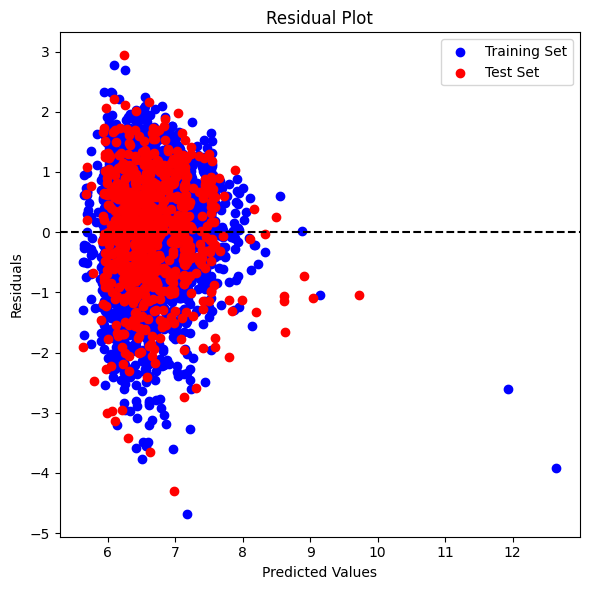

In [ ]:
# Trainingsvorhersagen
train_predictions = best_linear.predict(X_train)
# Testvorhersagen
test_predictions = best_linear.predict(X_test)

# Residuenberechnung
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

# Plot der Residuen
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.scatter(train_predictions, train_residuals, c='b', label='Training Set')
plt.scatter(test_predictions, test_residuals, c='r', label='Test Set')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper right')
fig.tight_layout()
plt.show()

Hier sieht man das unsere Testdaten nicht stark auf Ausreißer reagieren.

###Error Analysis

In [ ]:
predictions = optimized_linear.predict(X_test)
df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

In [ ]:
df_with_predictions['pred_diff'] = np.abs(df_with_predictions['target_variable'] - df_with_predictions.Prediction)

<Axes: ylabel='Frequency'>

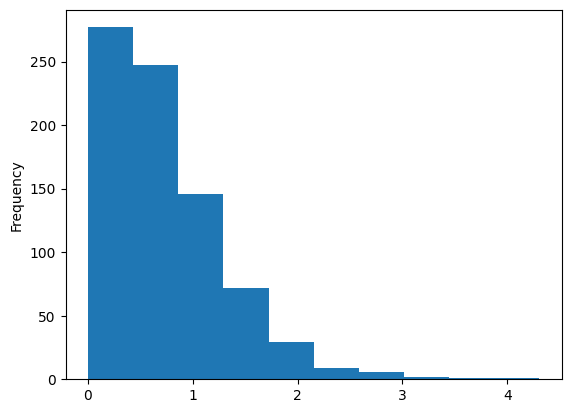

In [ ]:
df_with_predictions.pred_diff.plot(kind='hist')

<ipython-input-19-0db338ff5b2b>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell


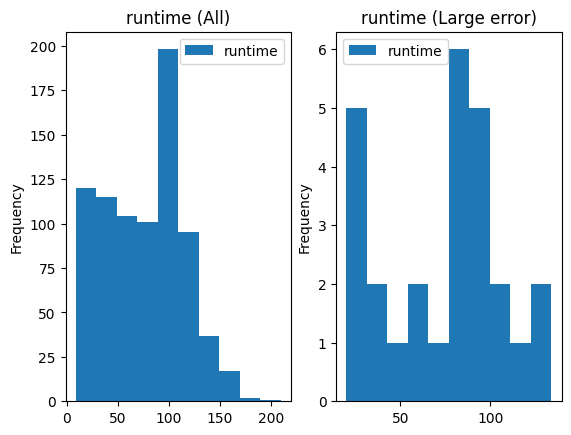

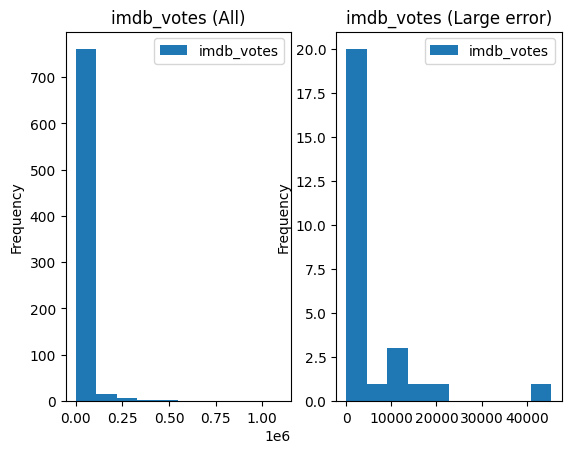

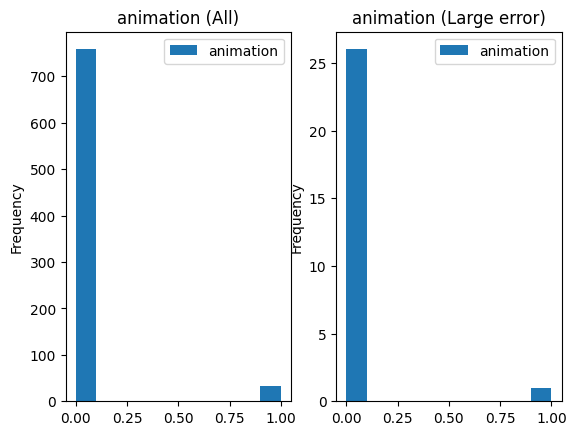

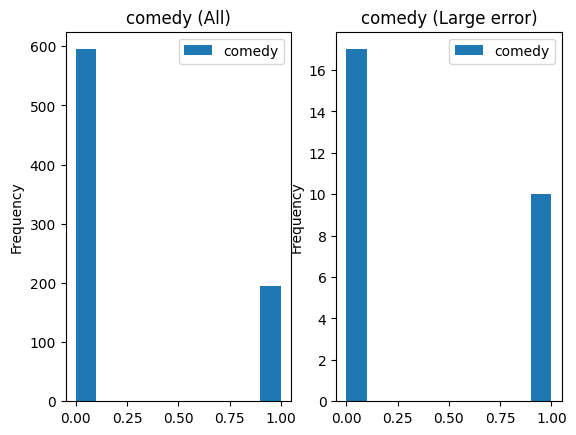

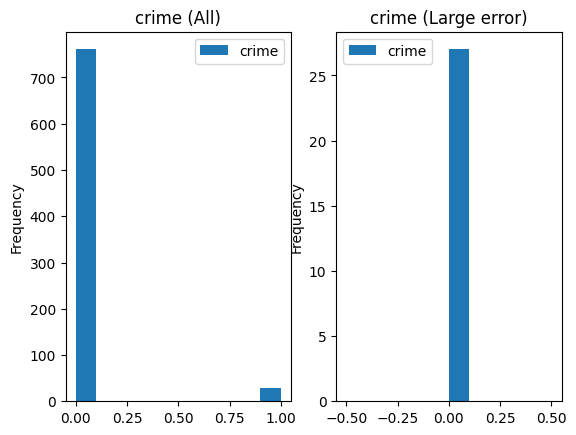

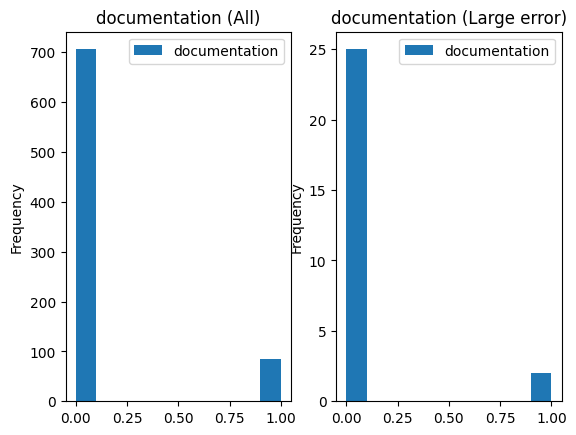

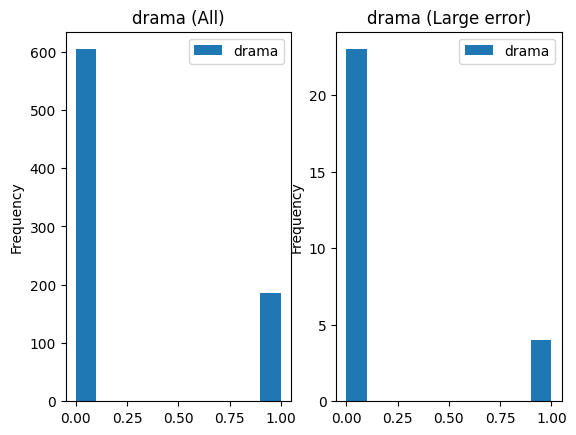

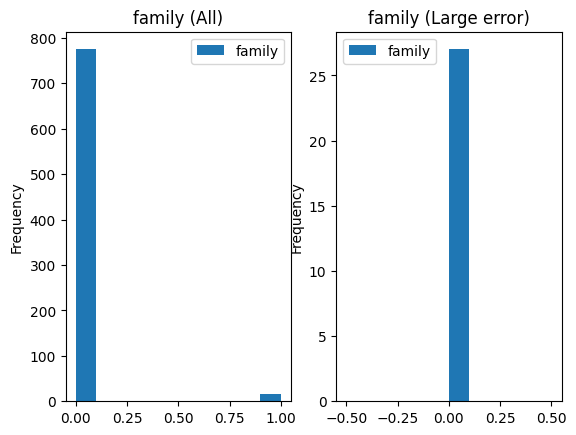

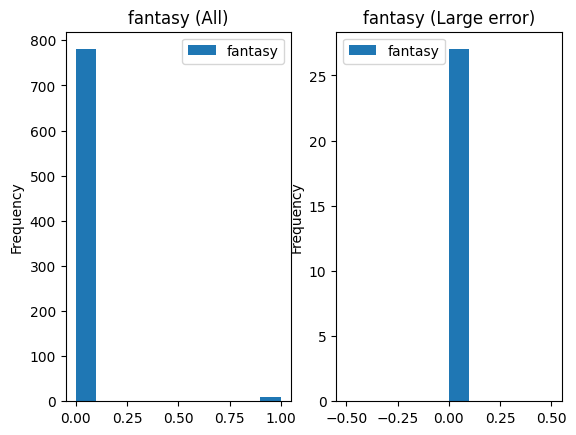

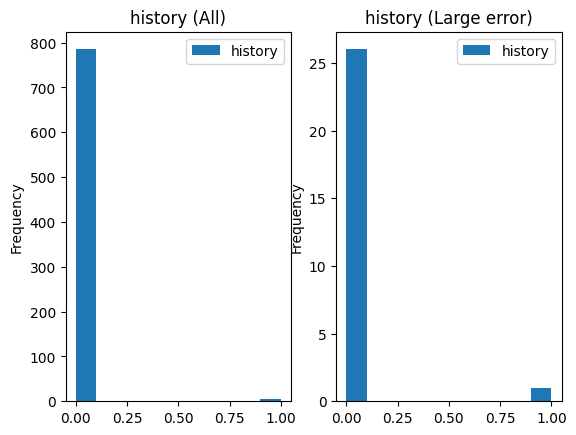

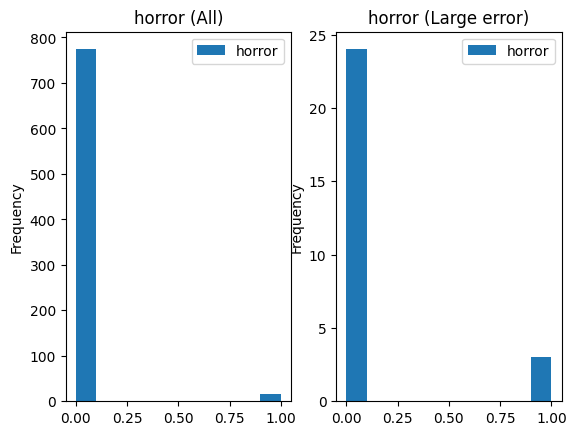

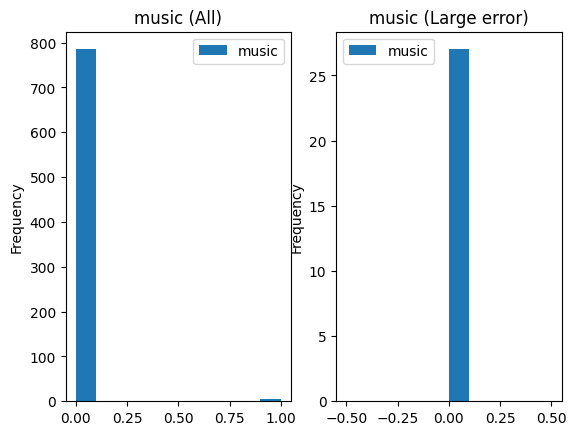

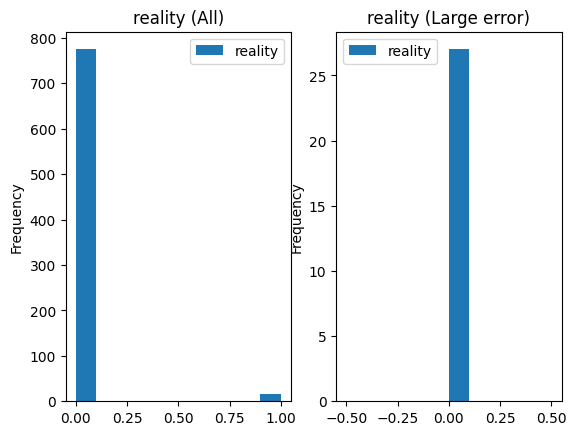

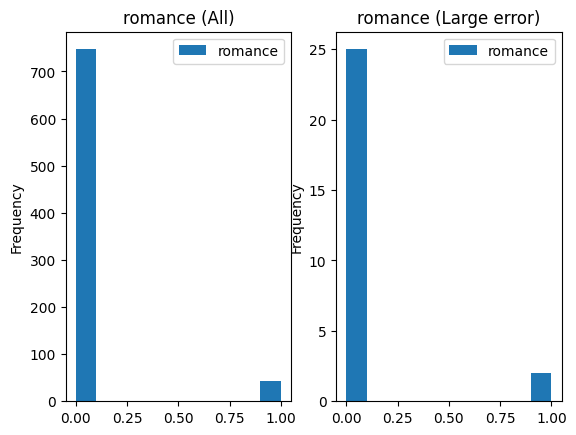

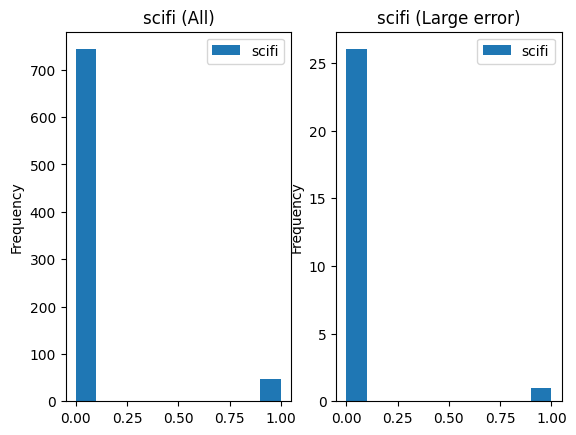

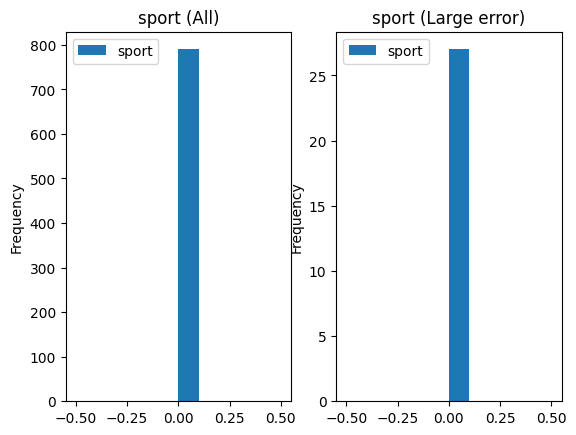

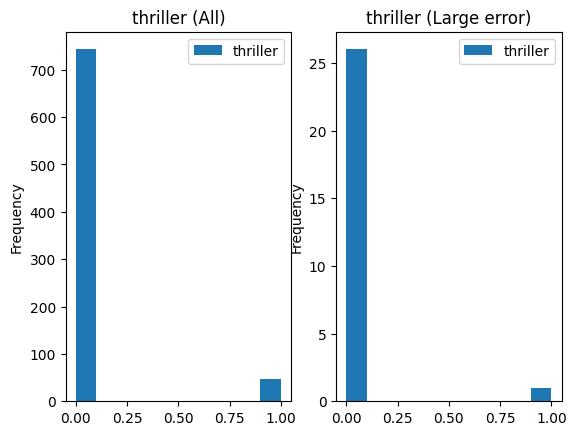

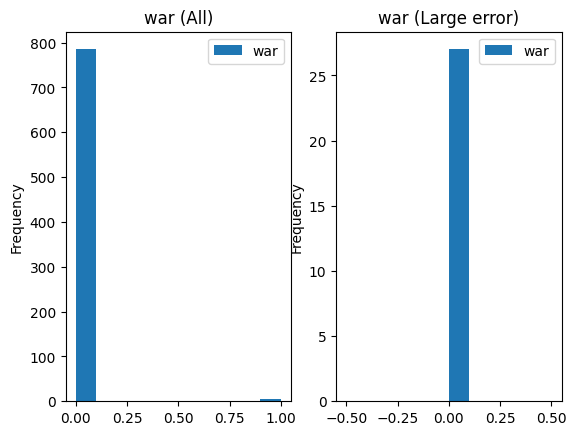

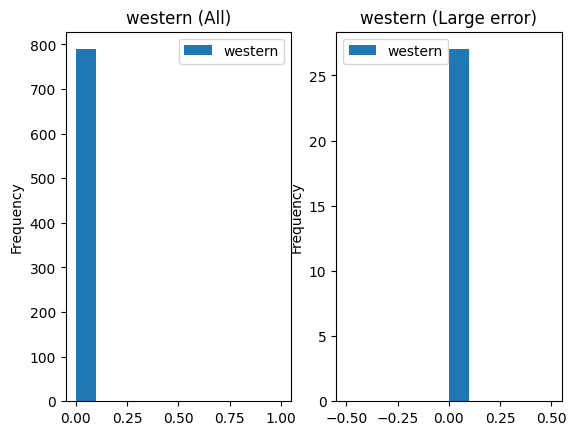

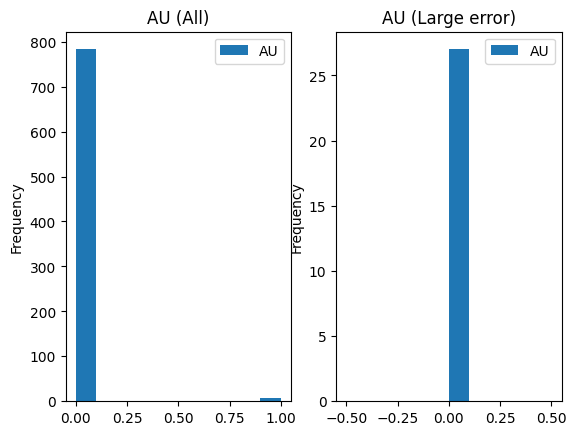

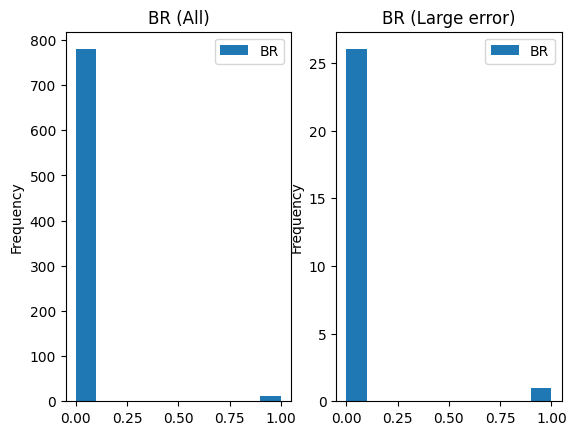

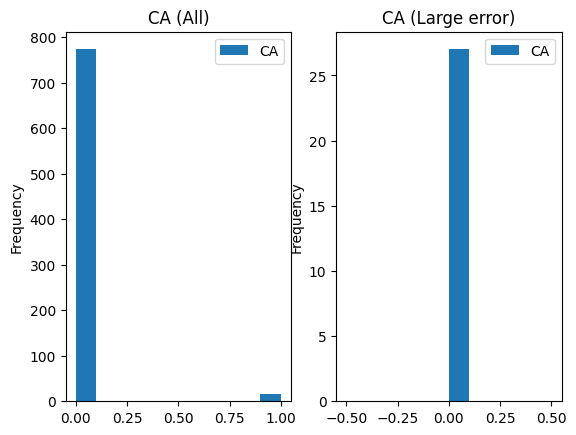

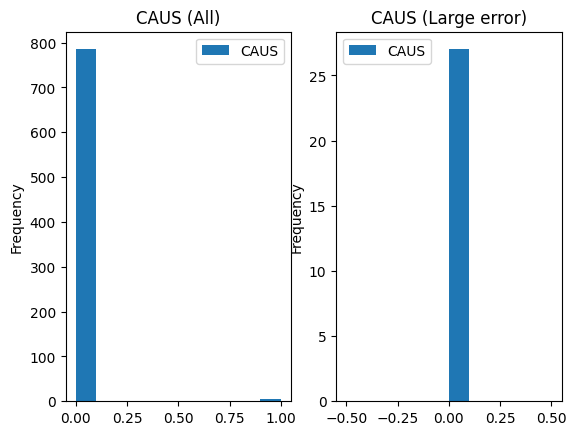

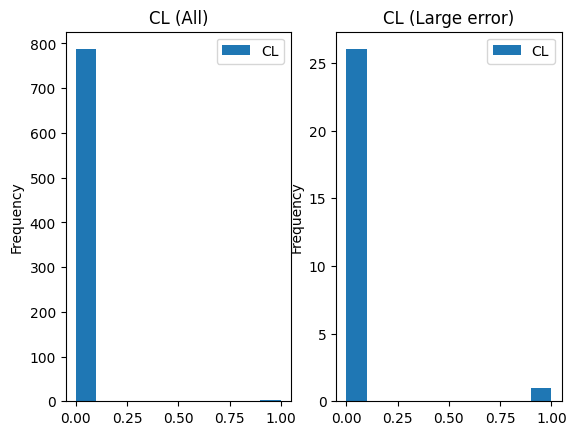

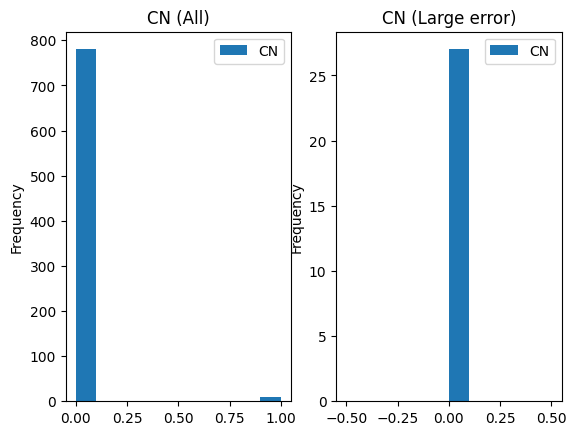

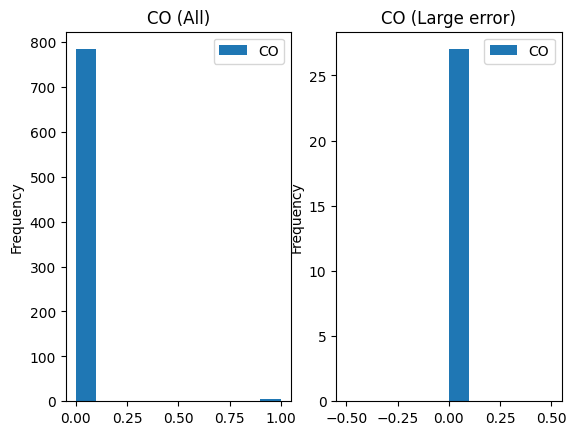

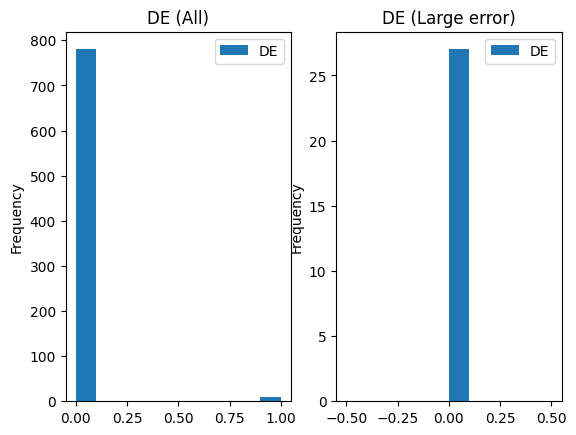

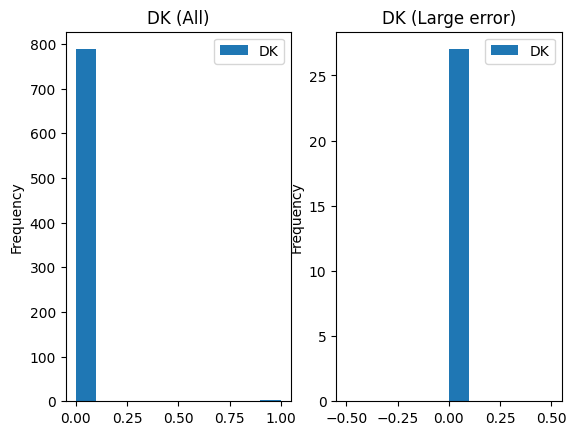

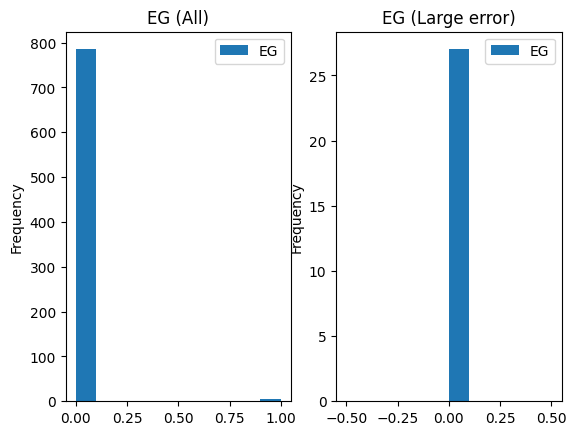

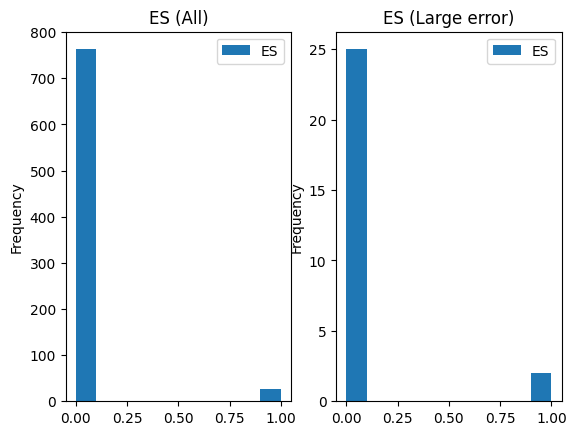

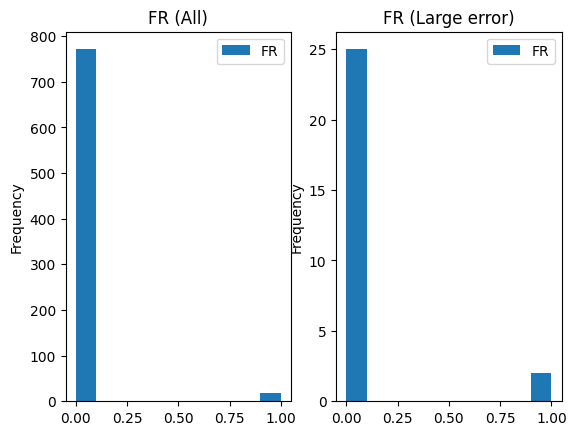

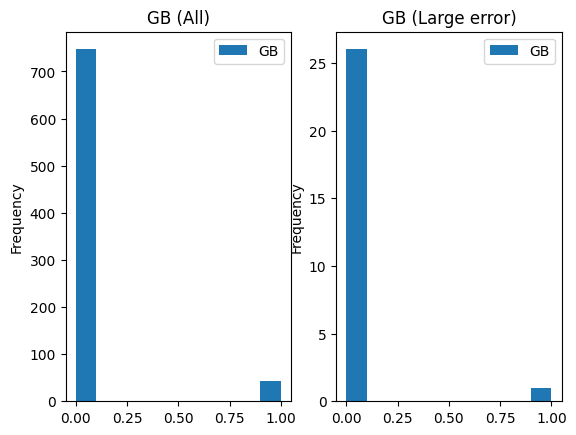

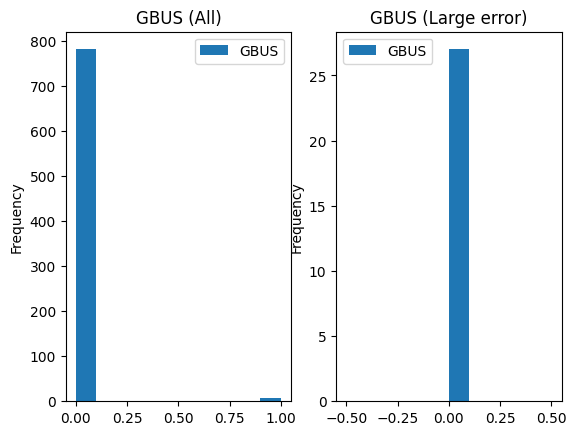

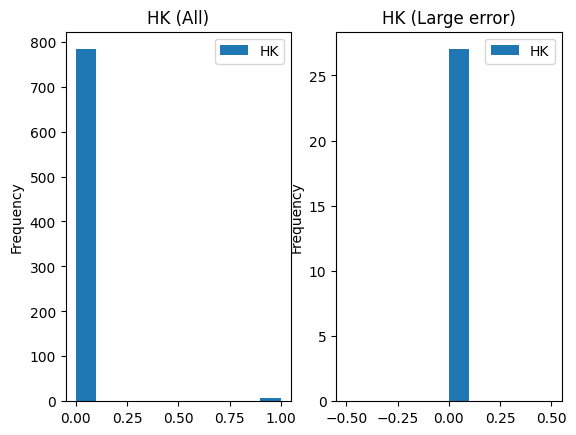

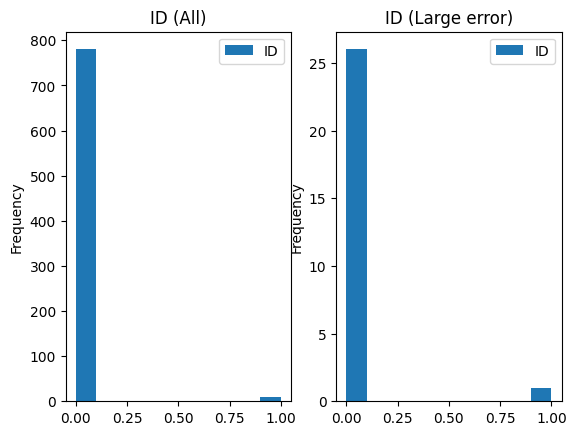

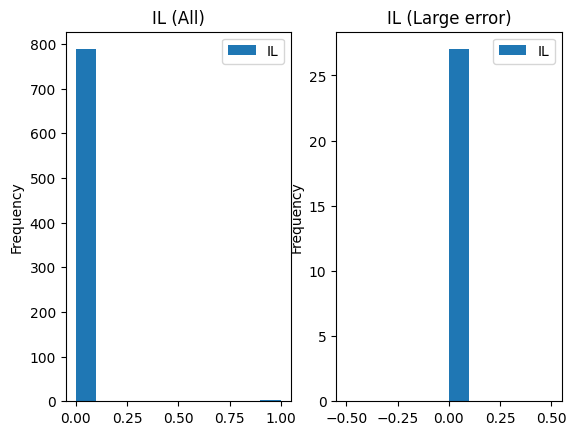

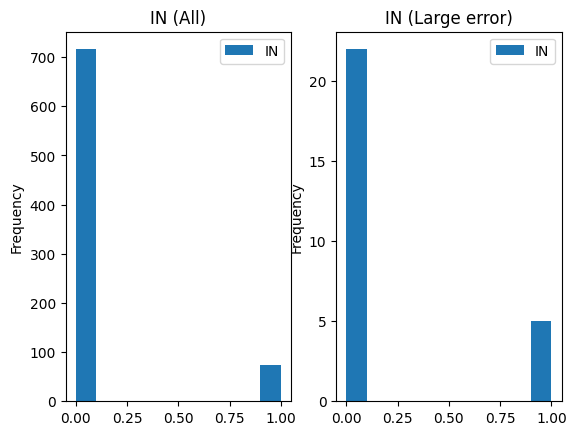

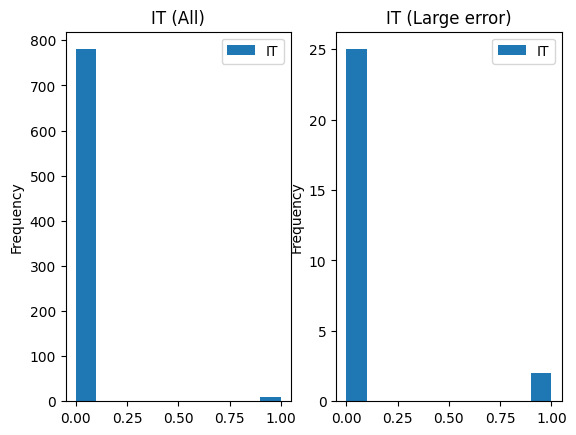

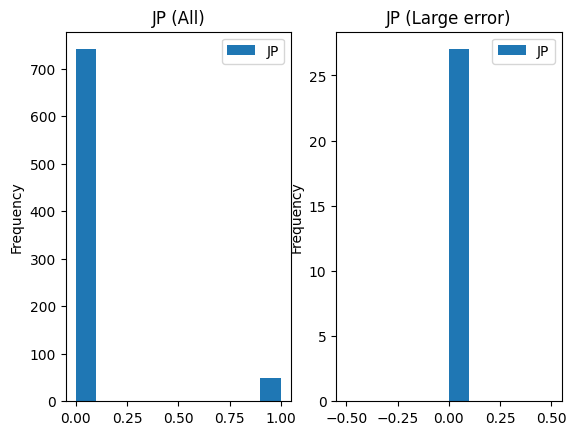

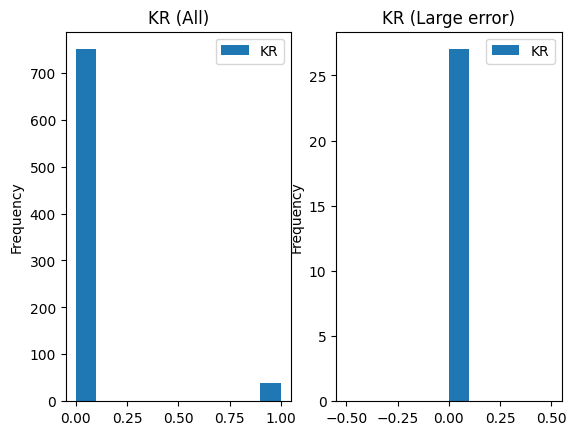

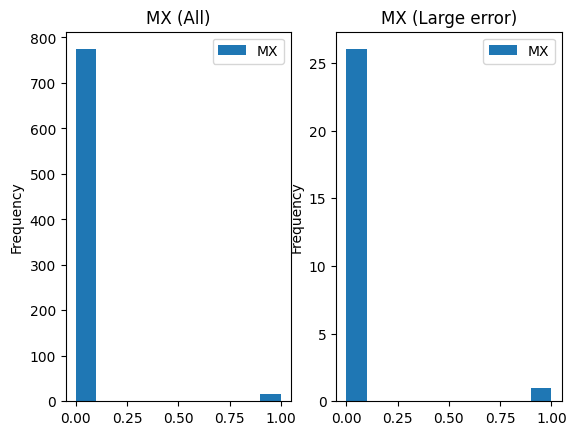

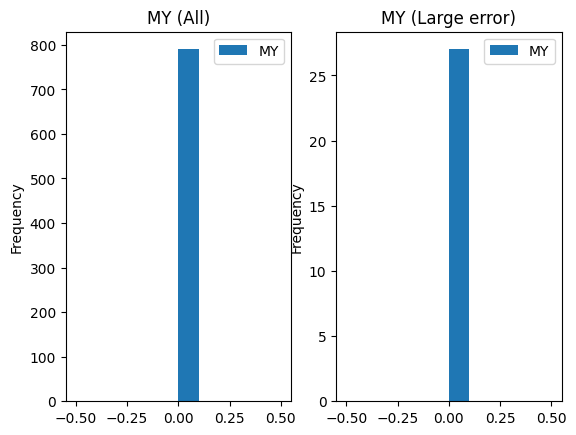

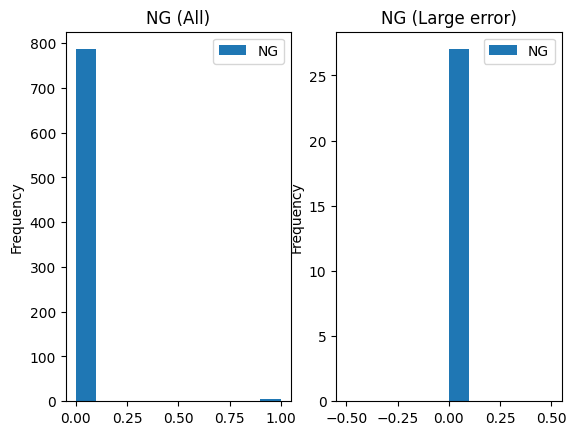

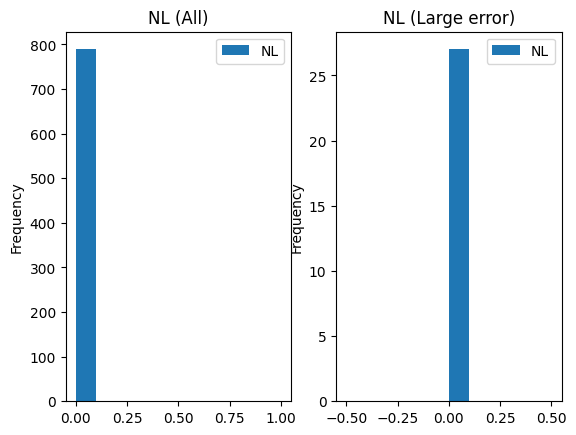

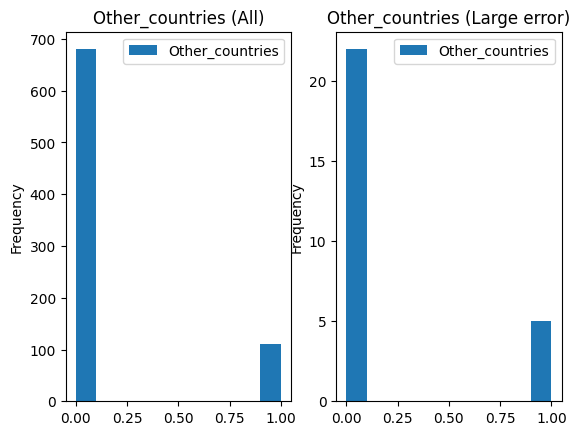

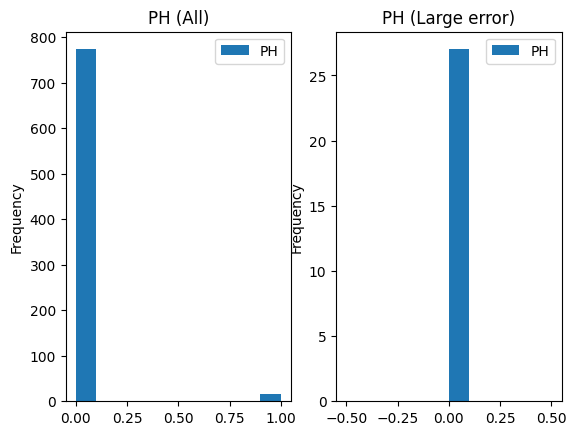

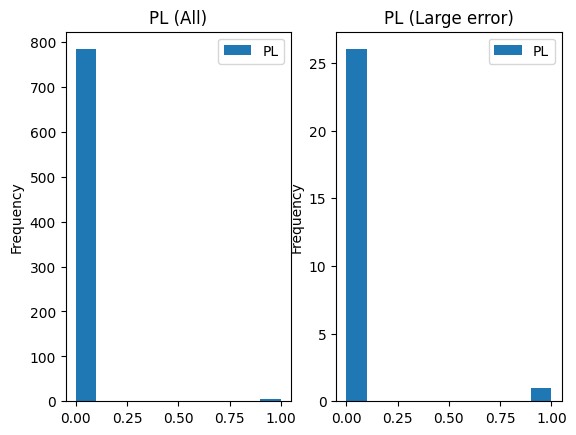

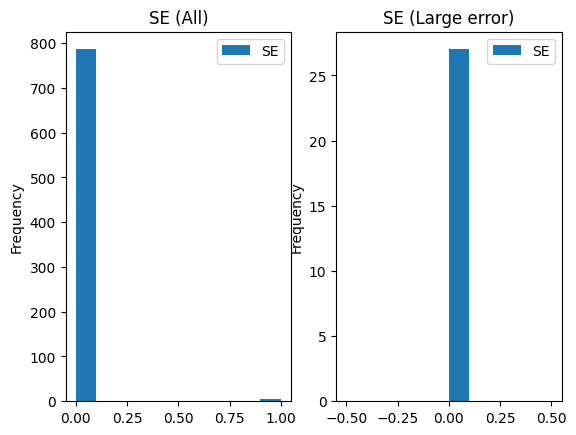

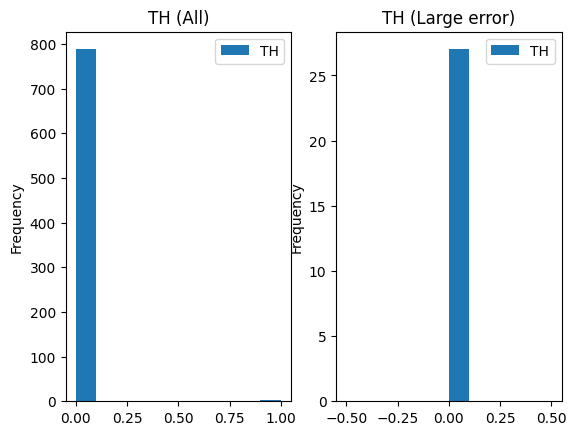

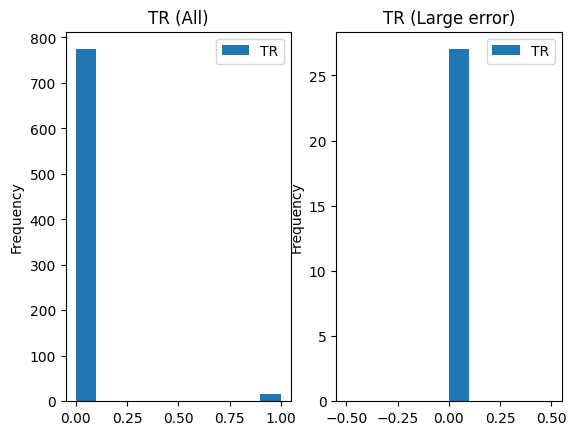

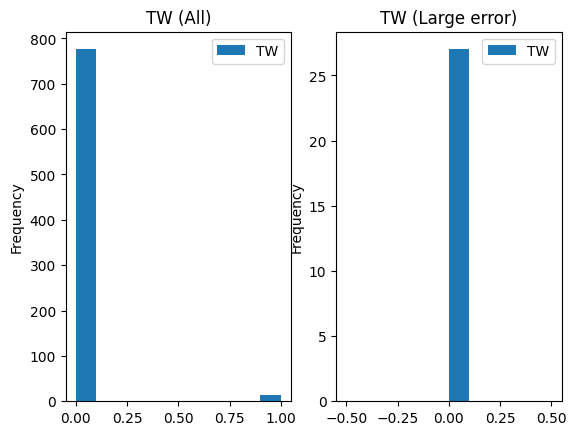

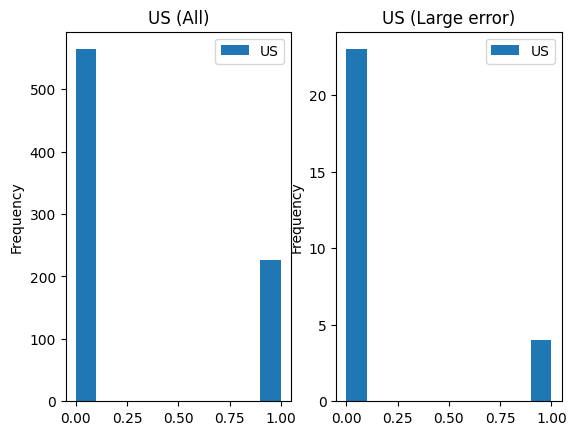

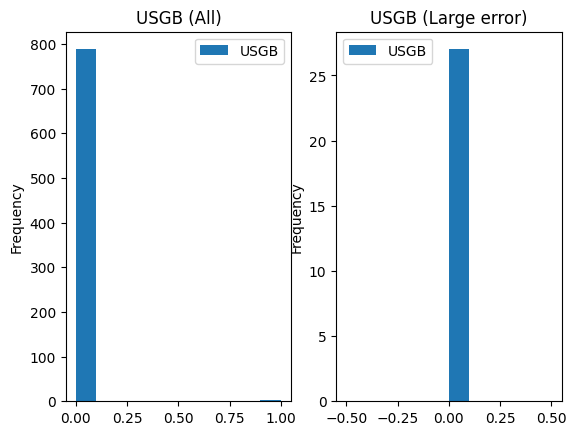

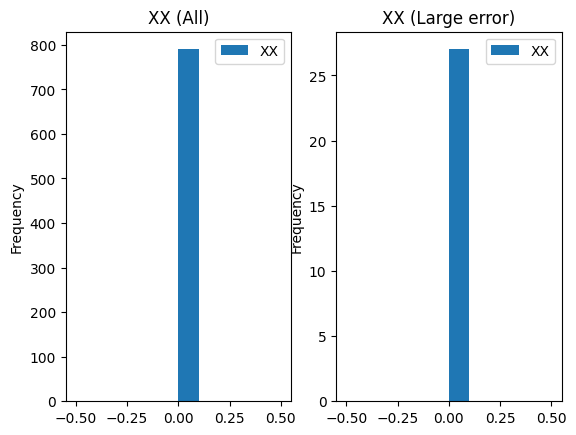

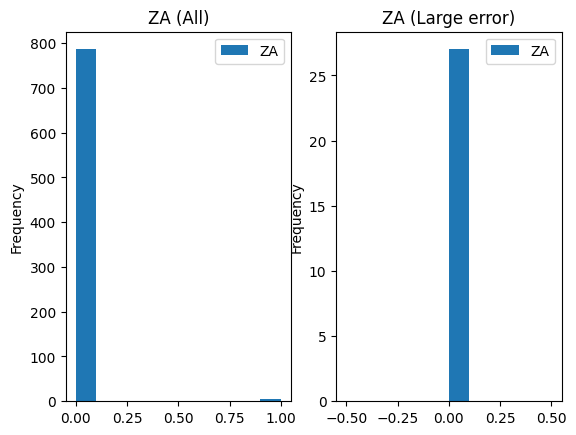

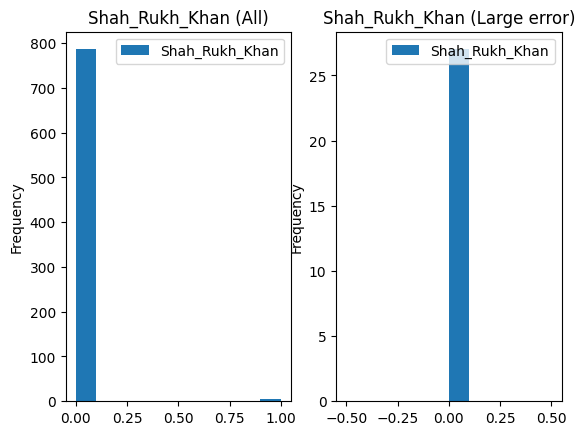

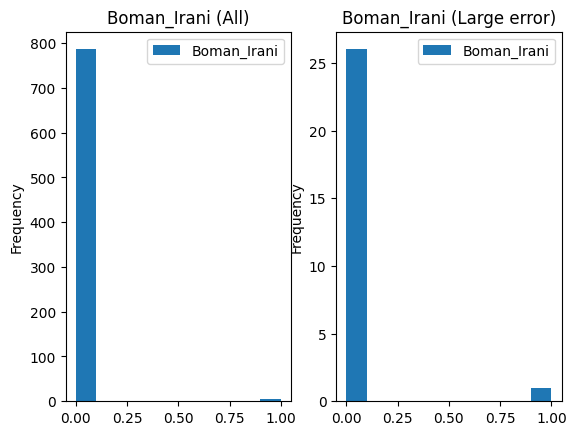

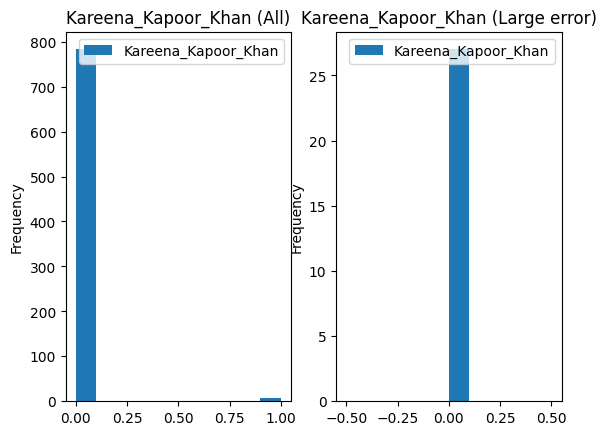

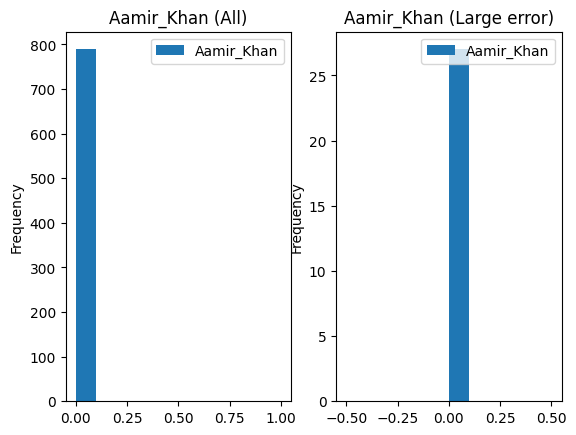

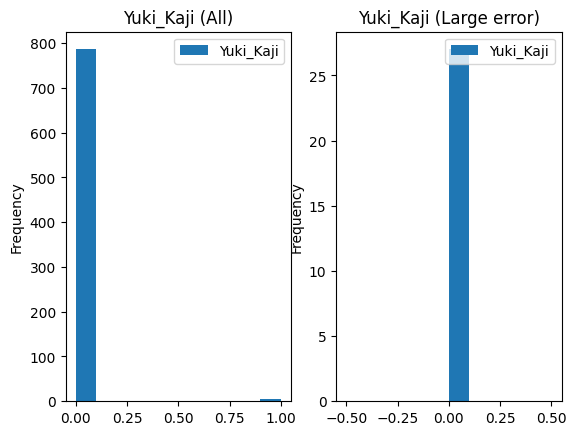

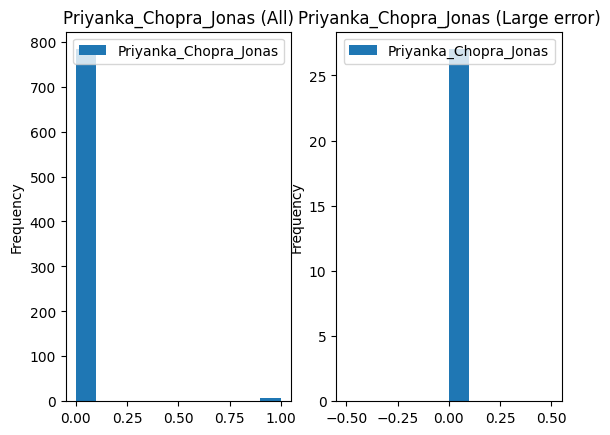

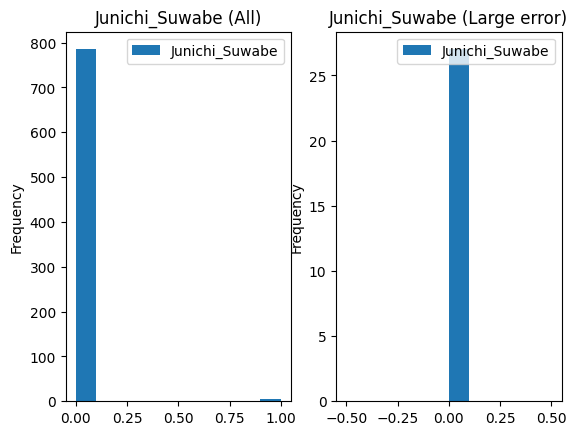

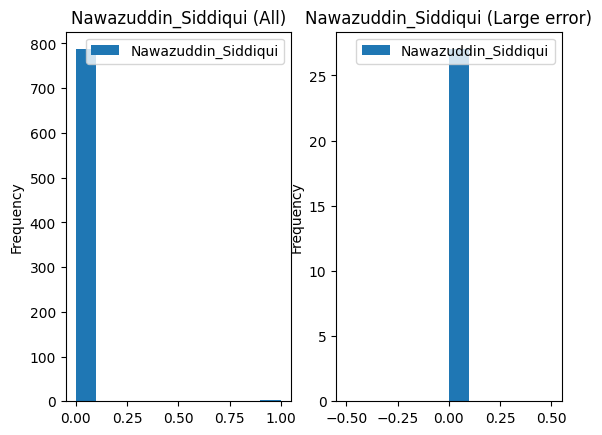

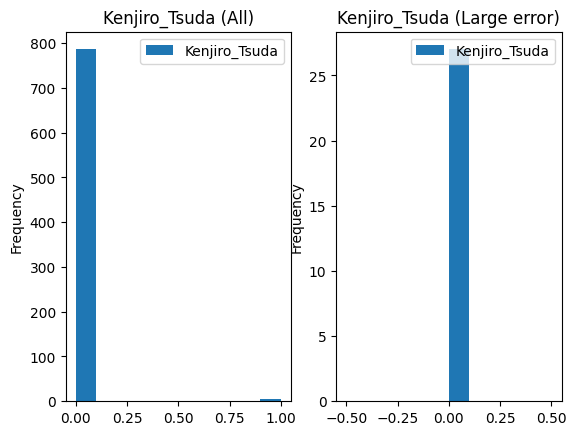

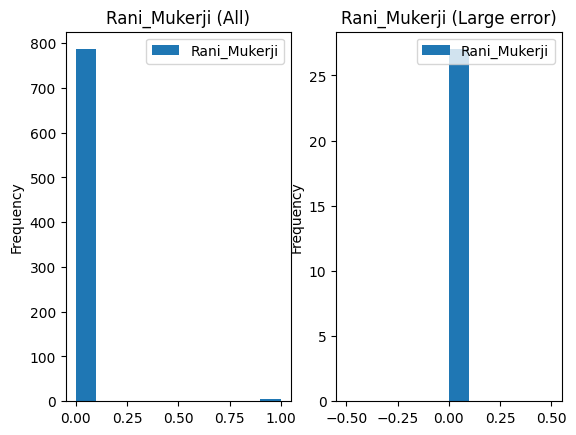

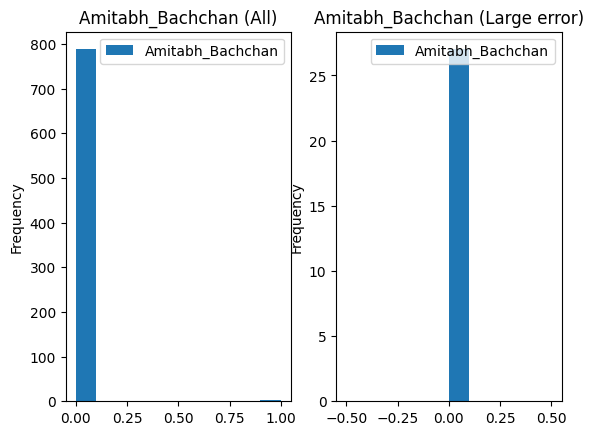

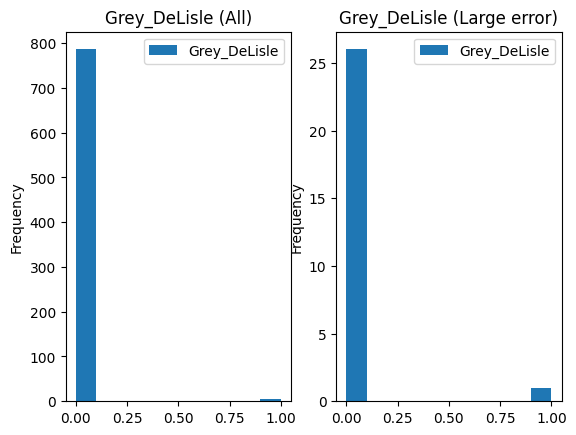

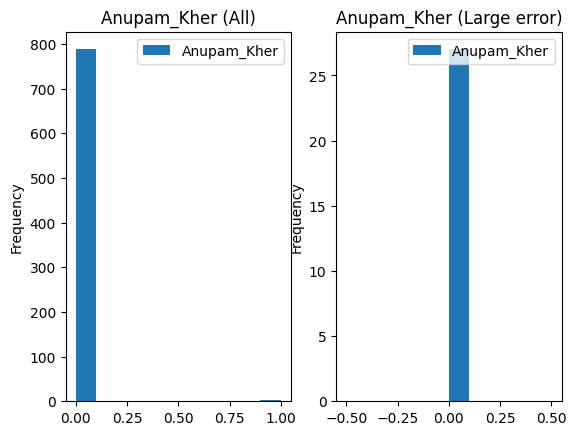

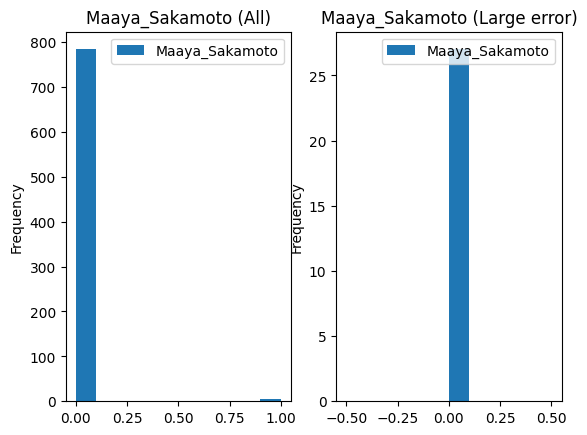

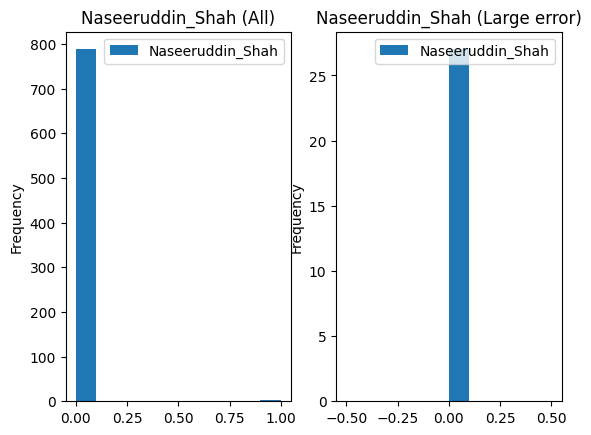

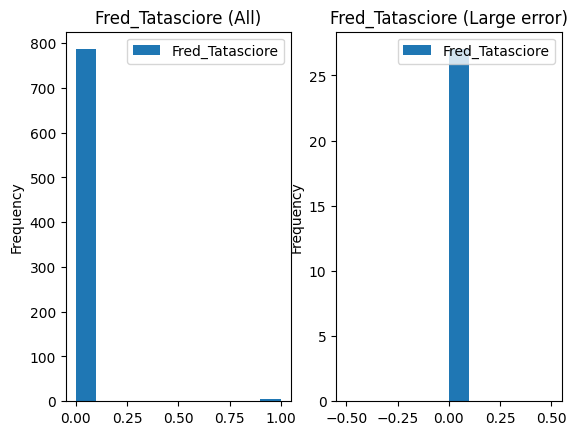

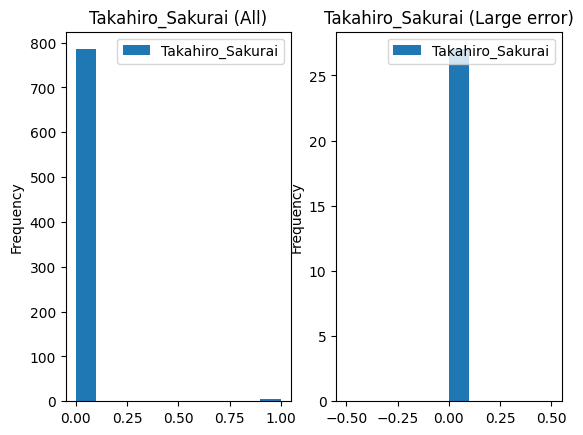

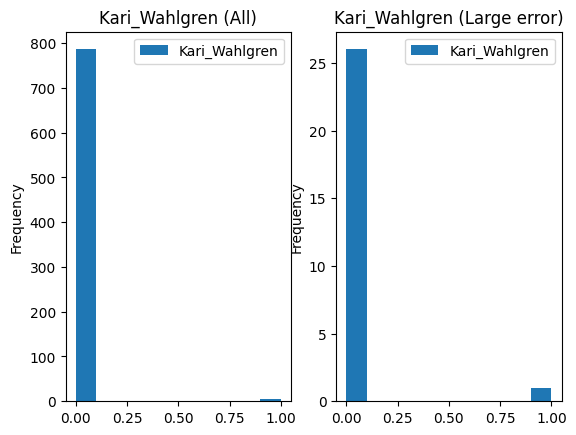

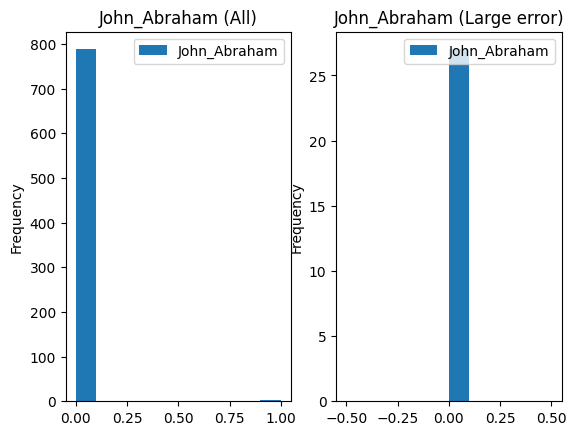

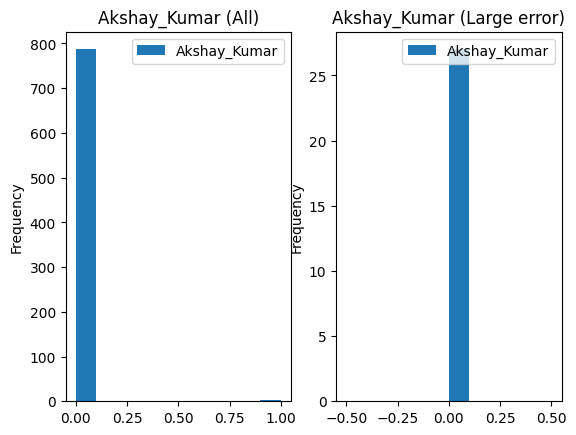

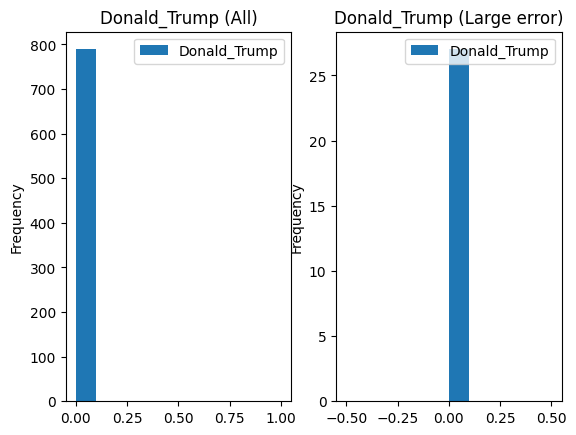

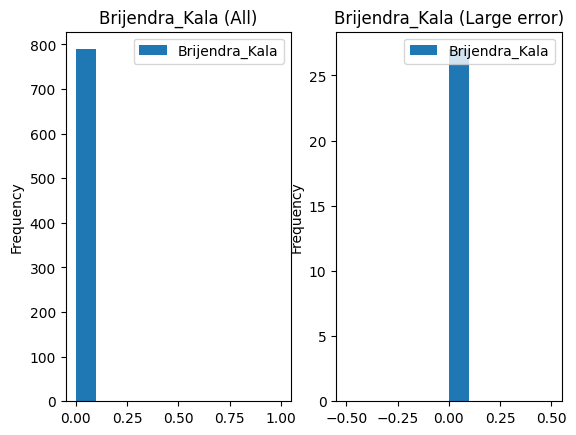

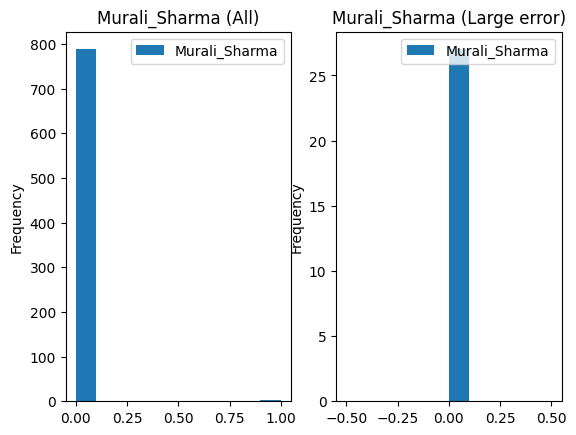

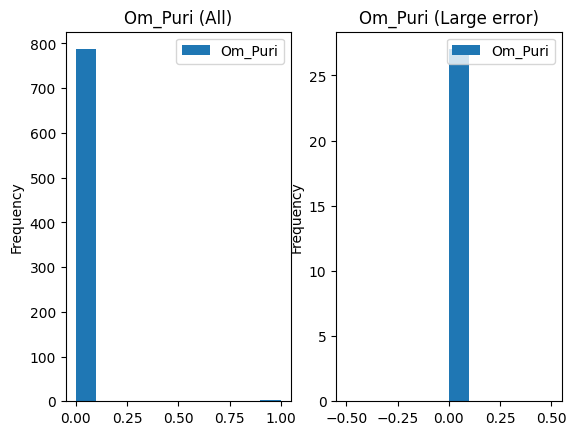

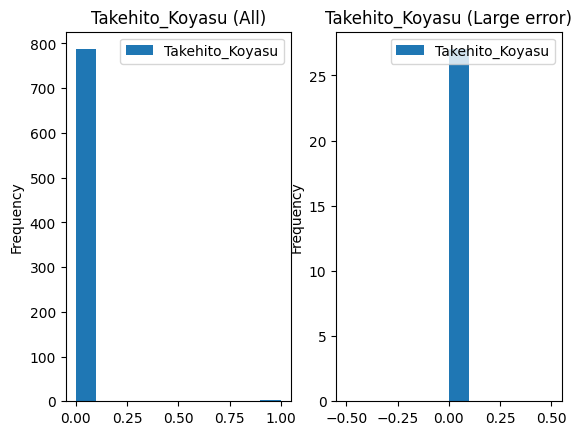

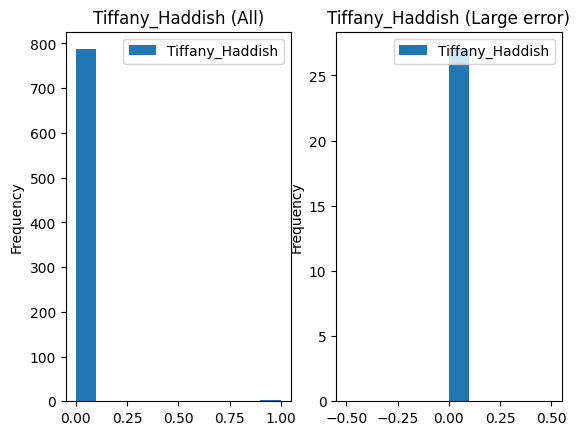

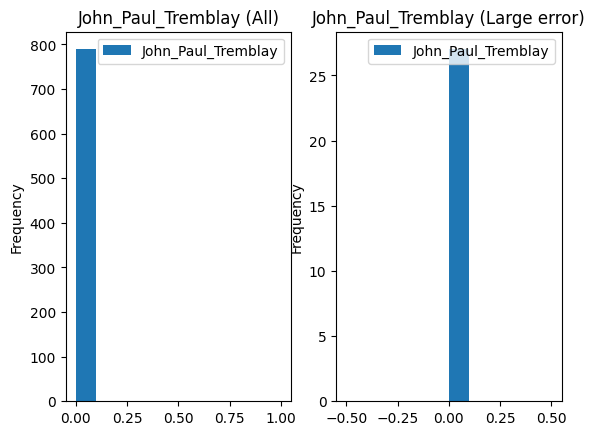

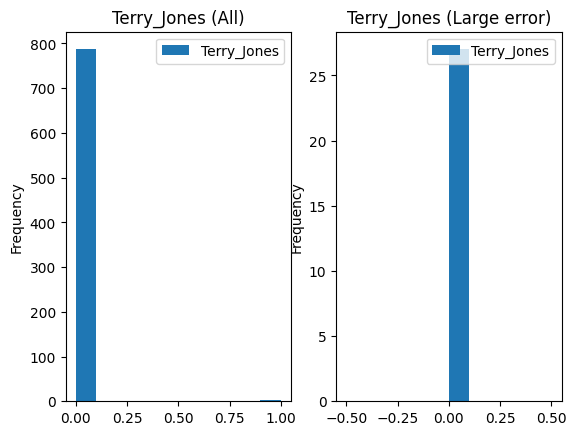

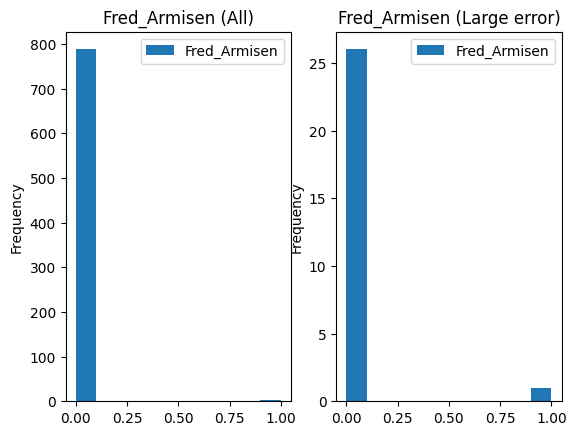

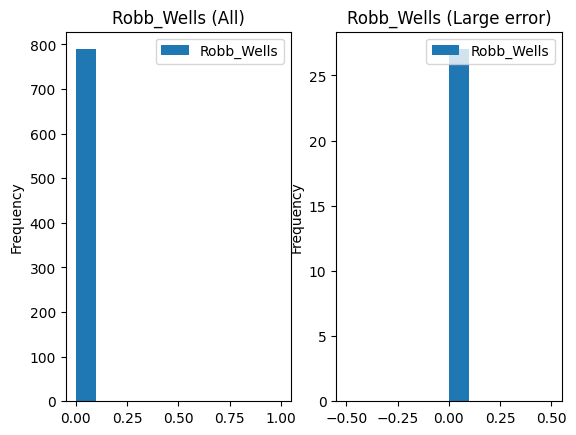

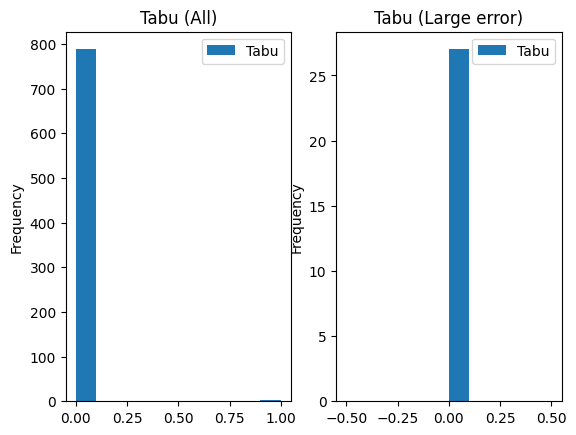

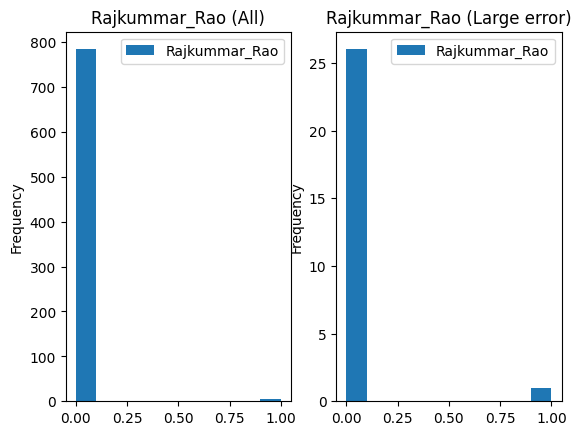

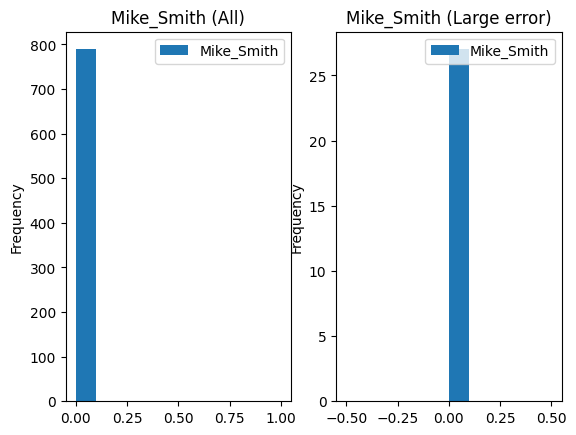

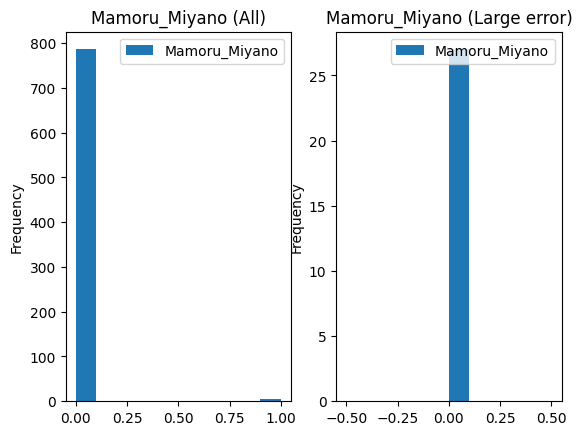

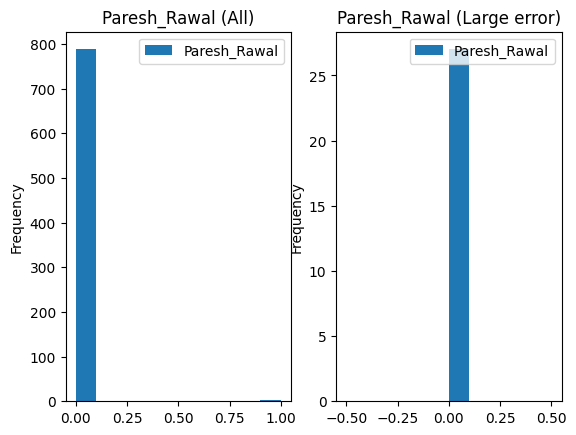

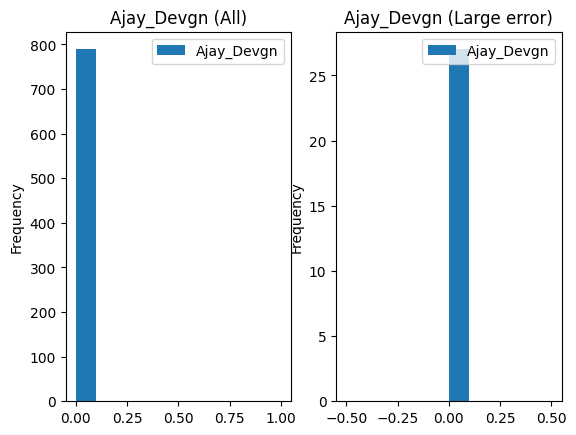

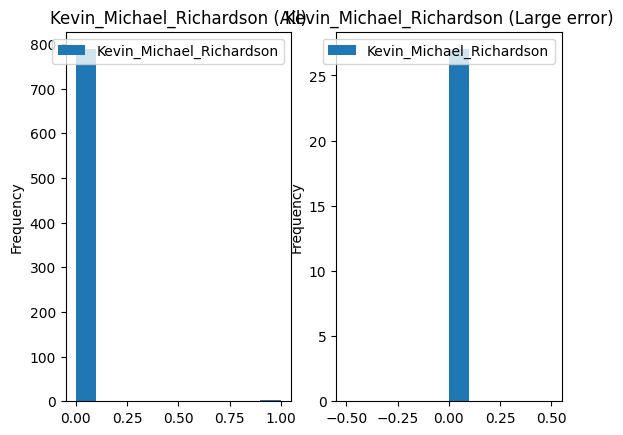

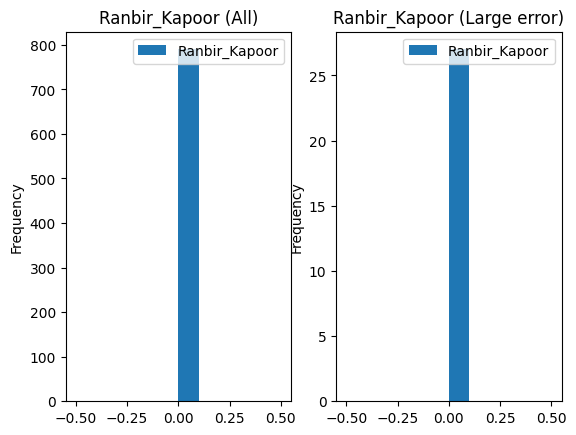

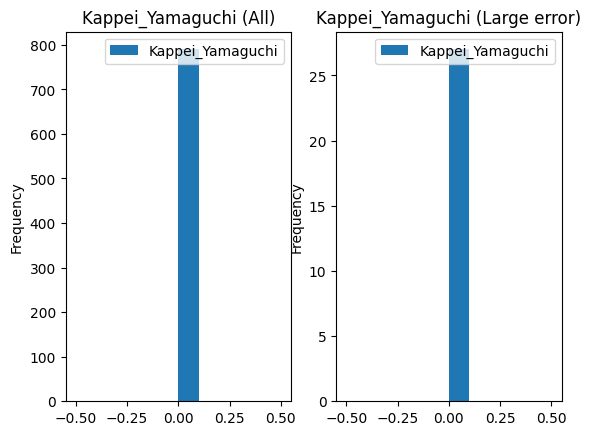

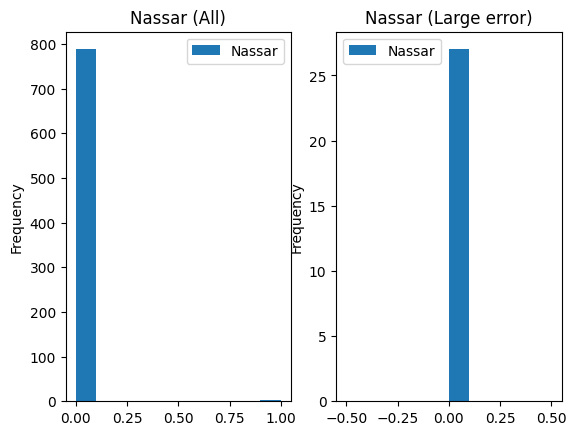

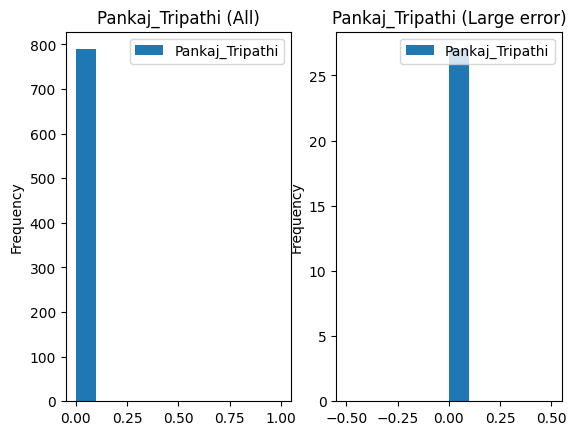

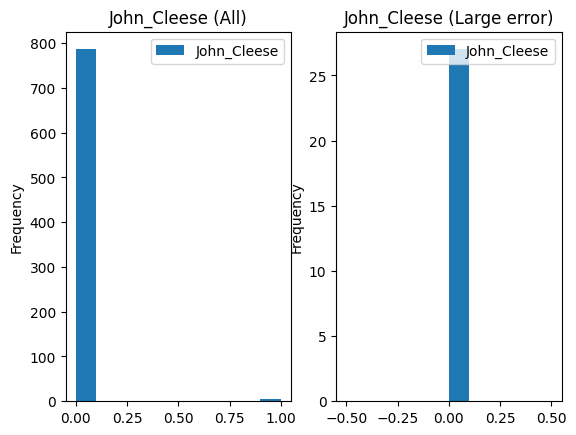

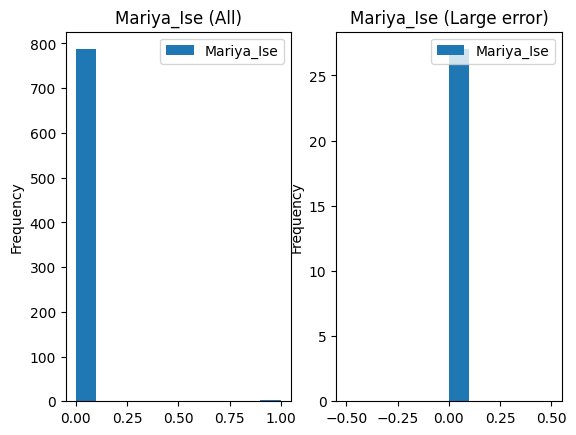

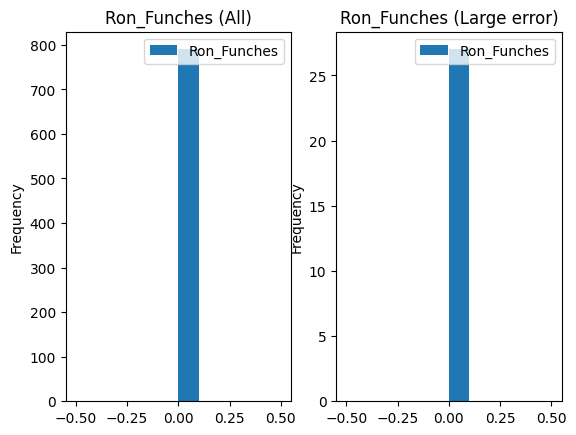

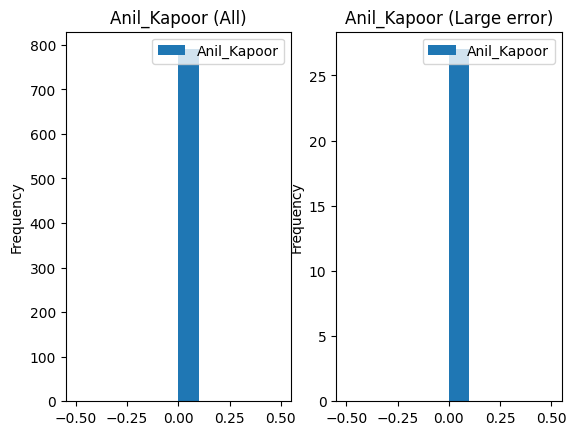

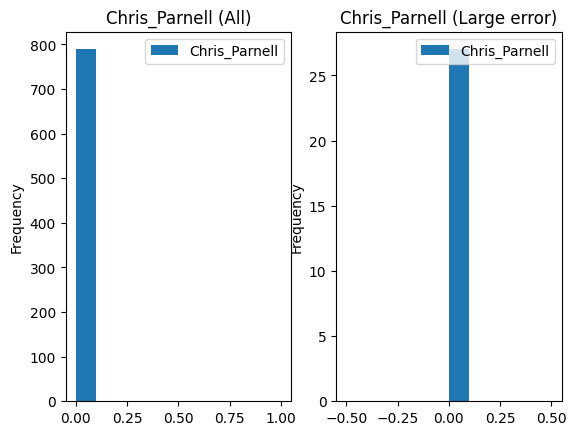

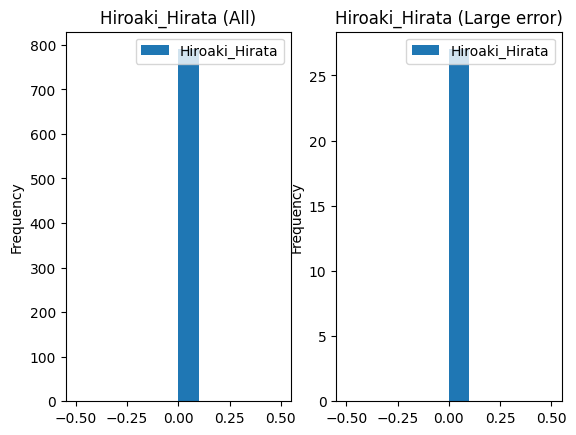

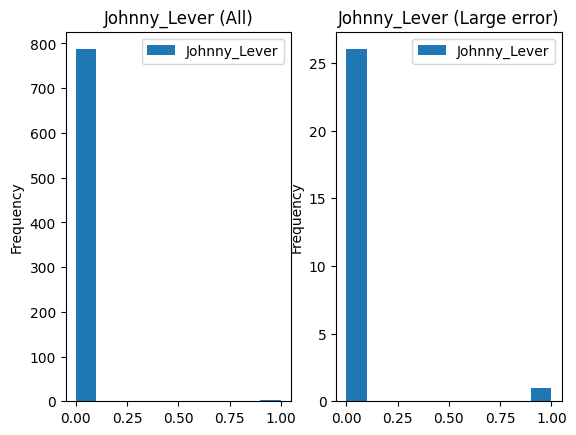

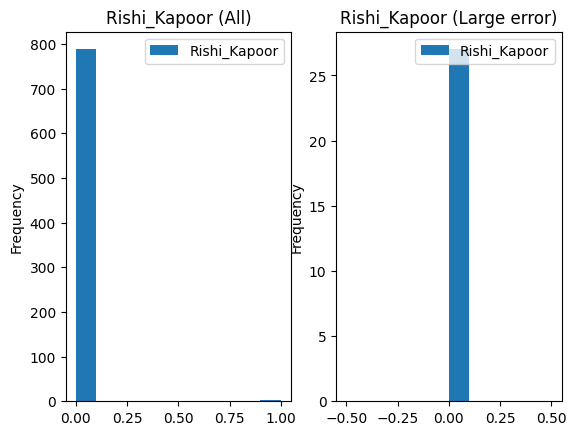

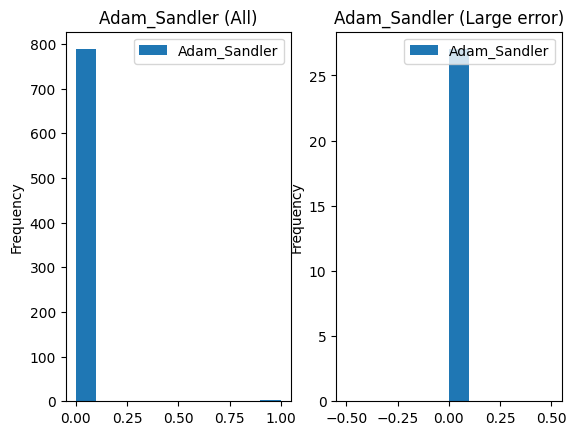

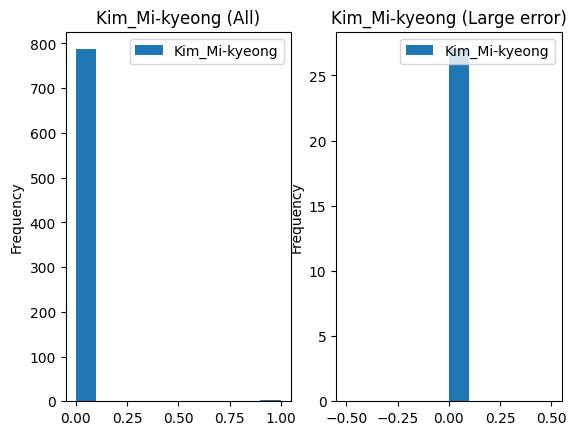

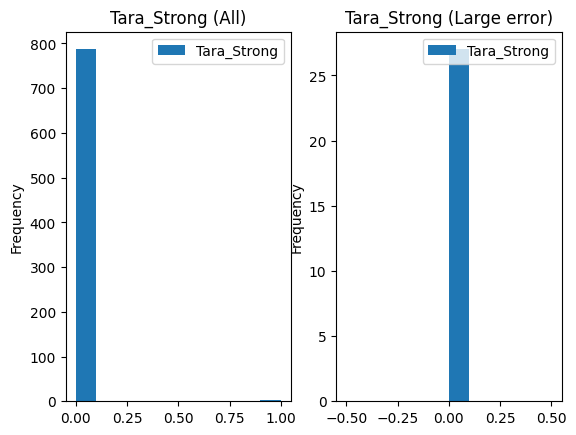

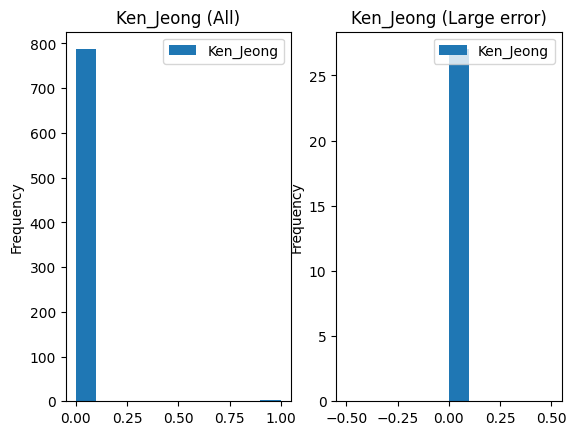

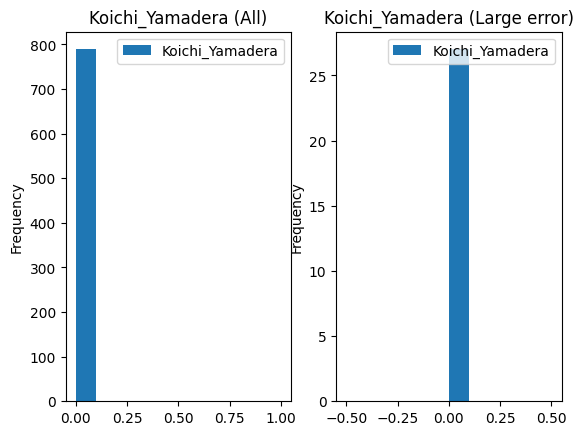

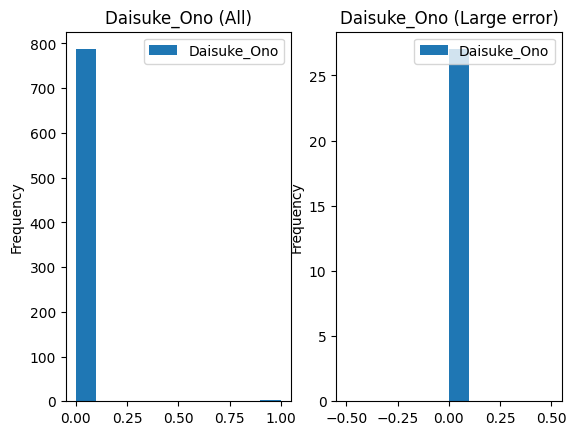

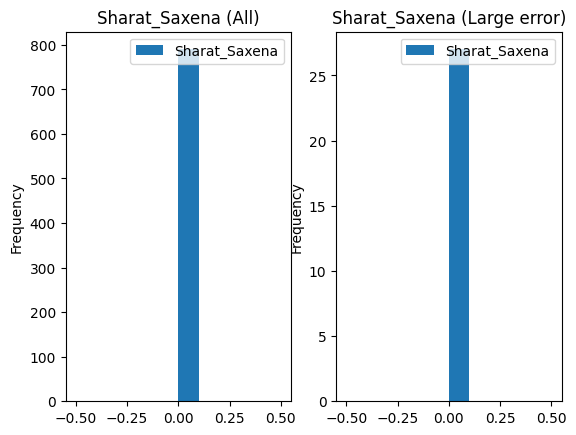

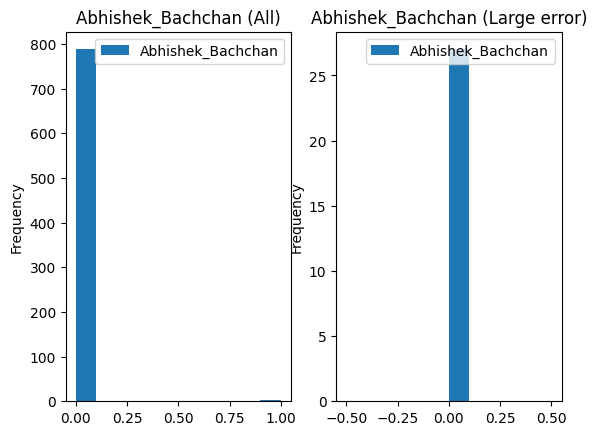

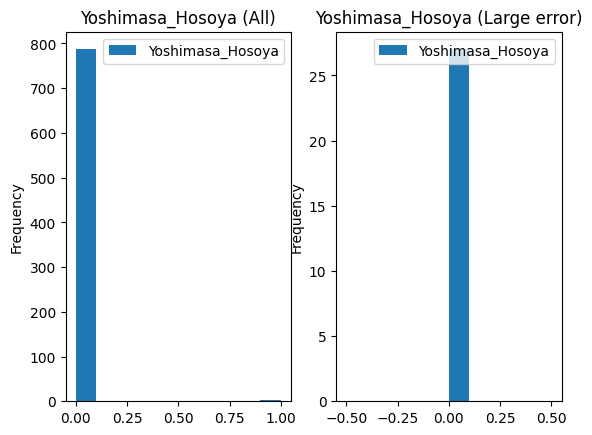

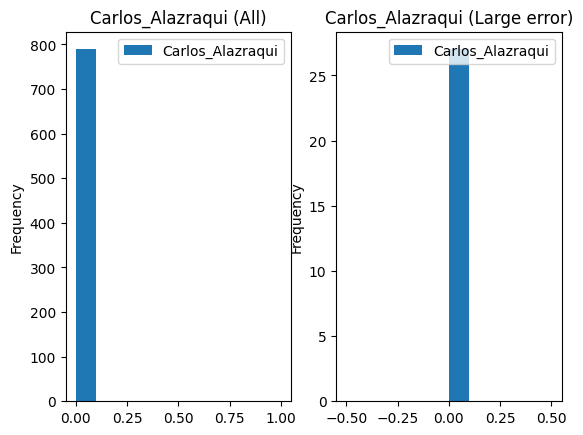

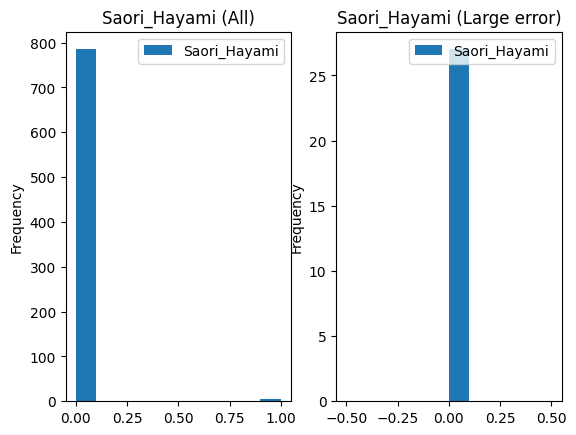

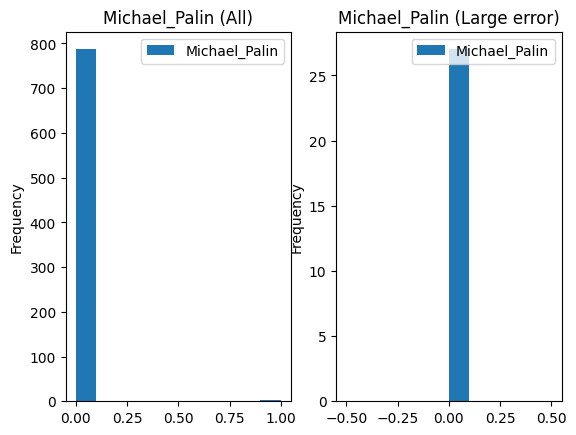

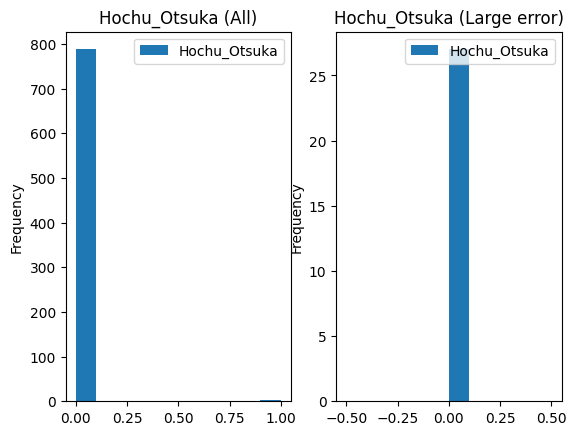

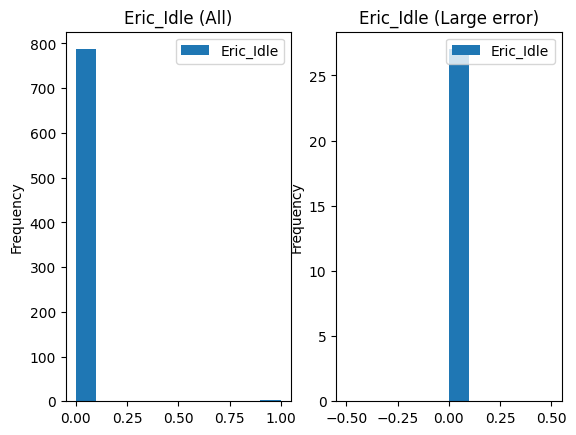

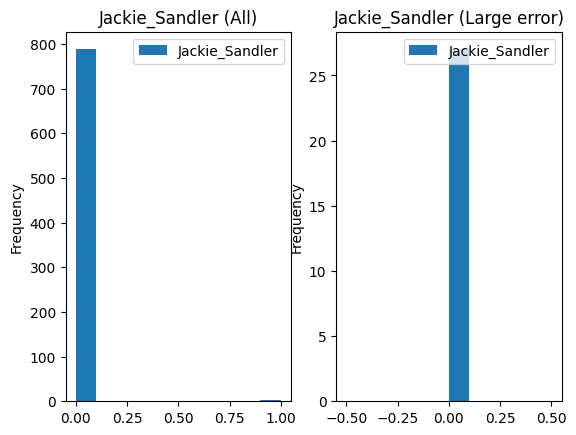

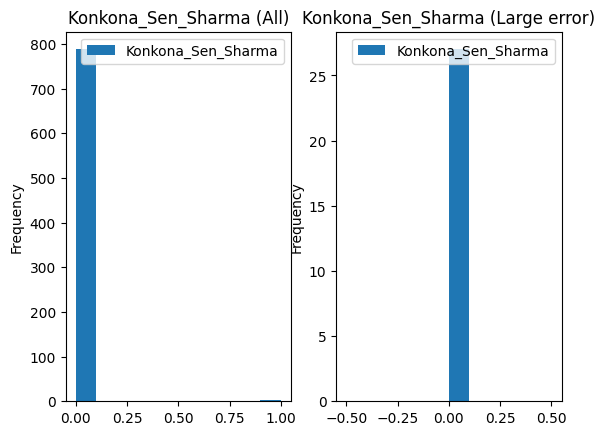

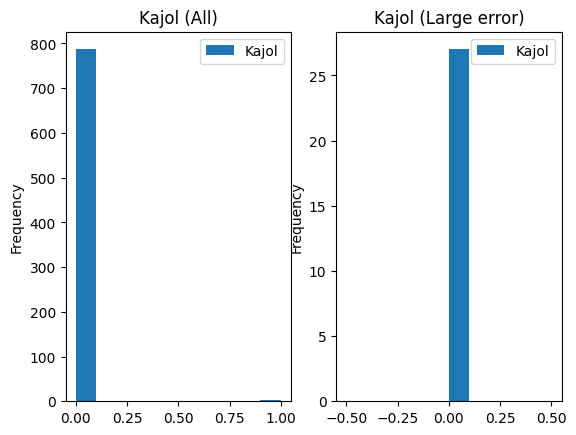

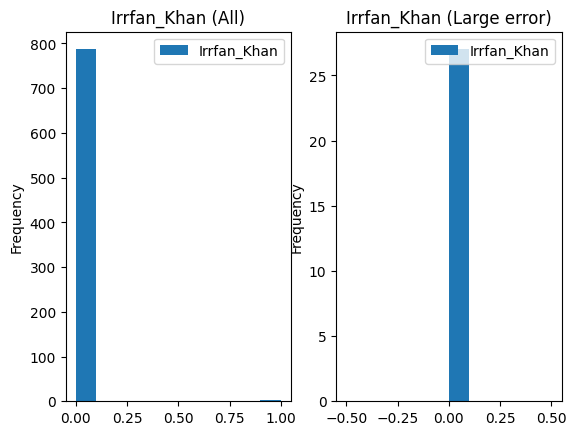

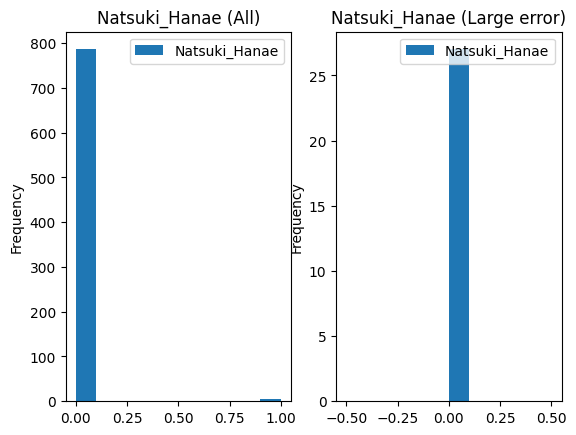

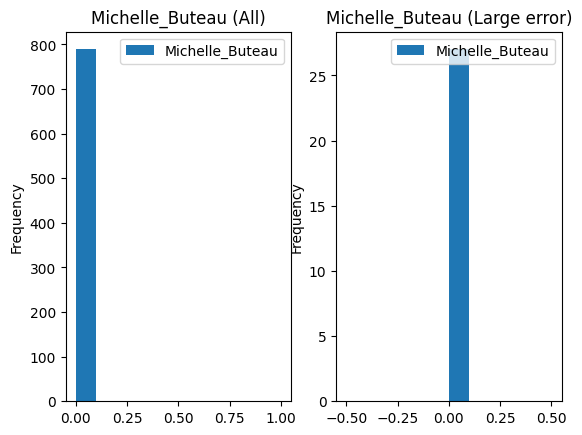

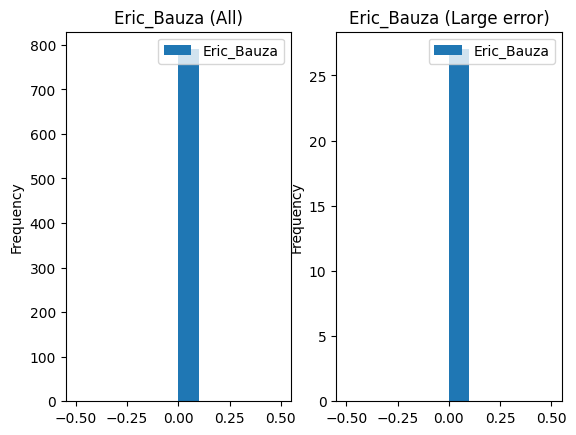

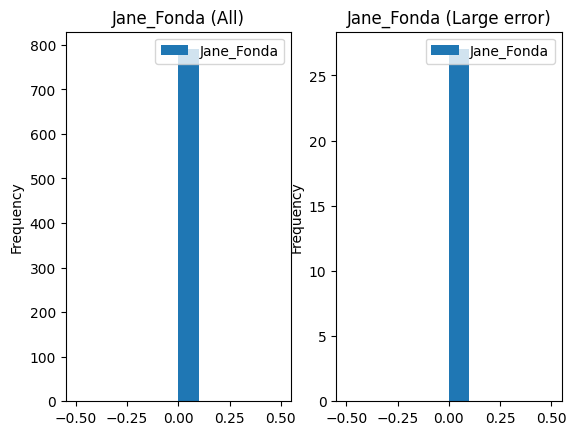

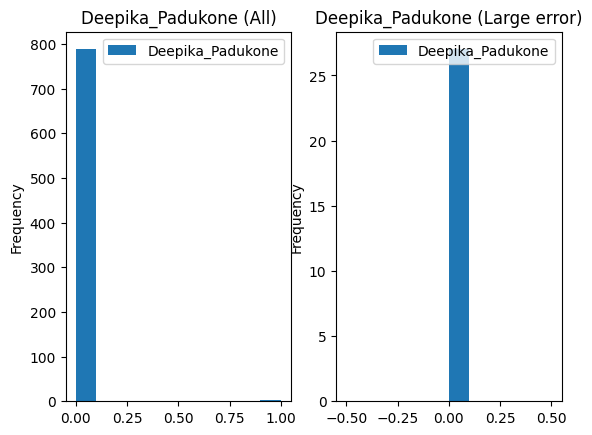

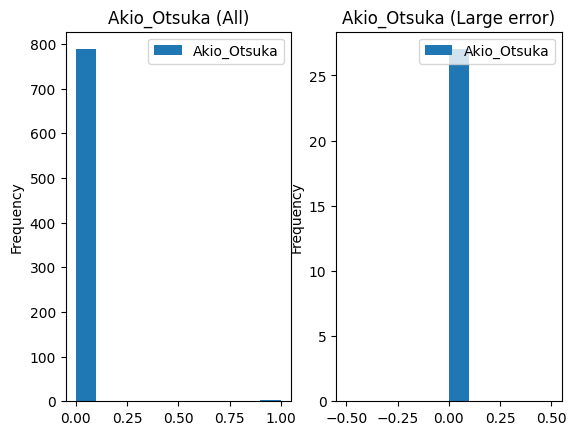

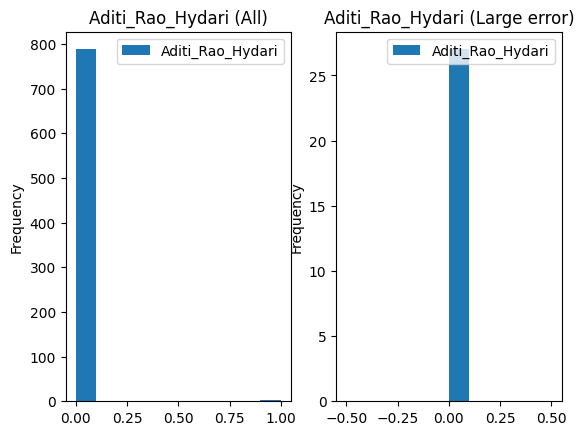

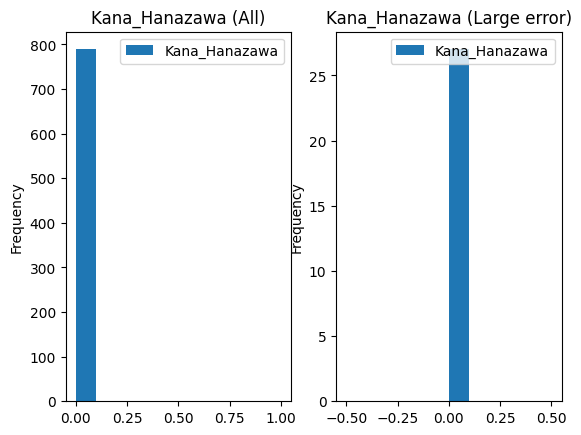

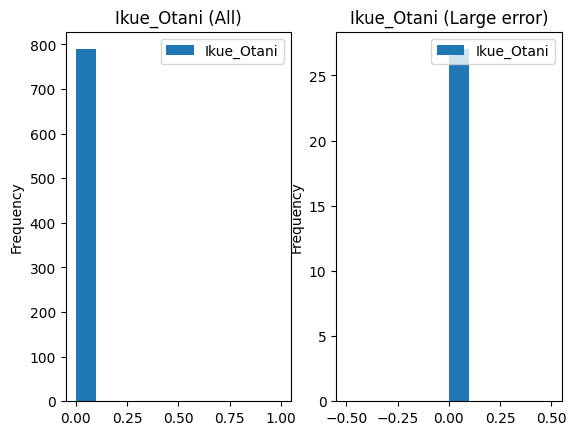

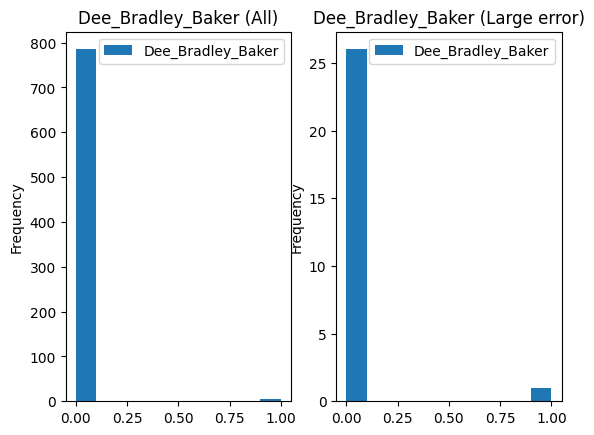

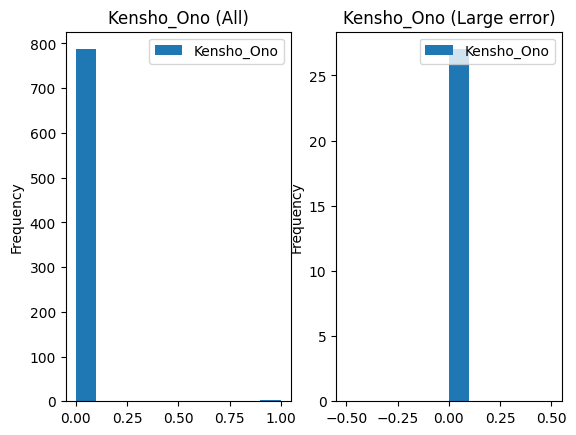

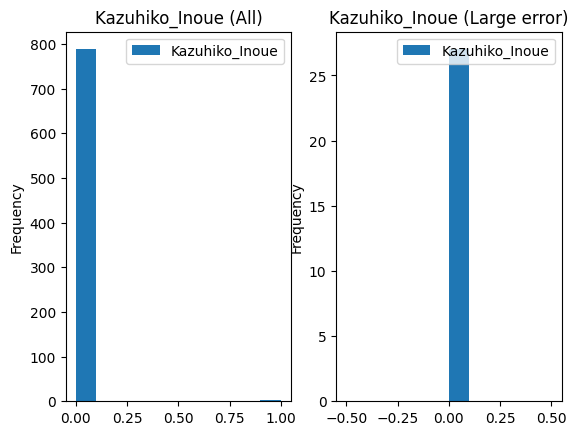

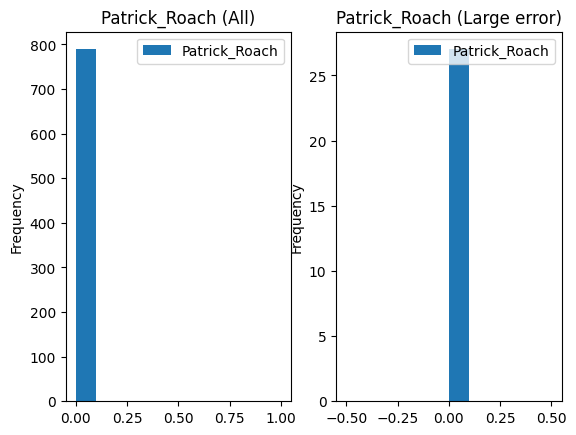

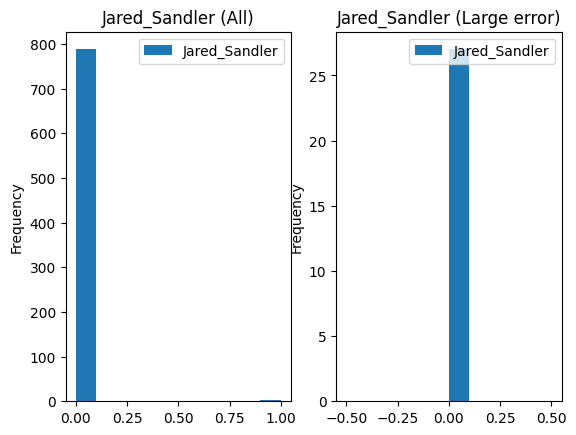

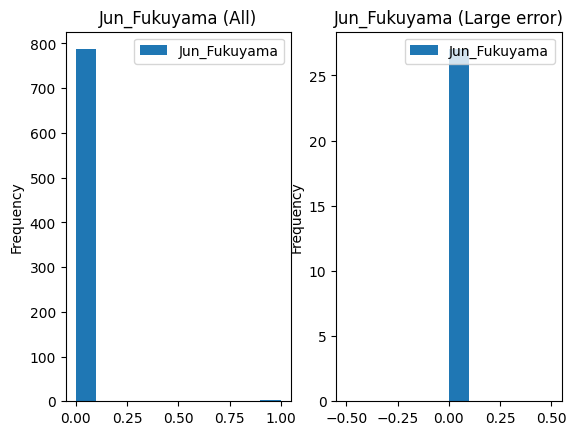

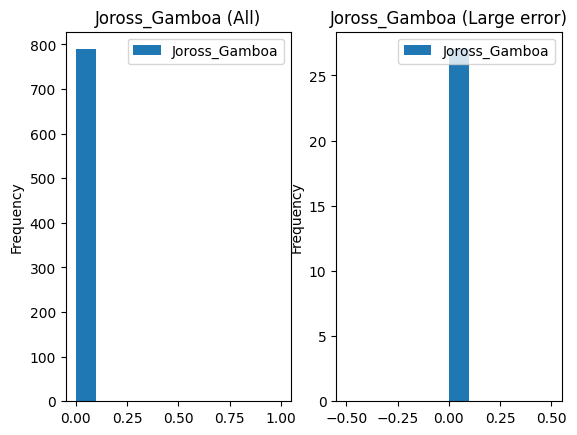

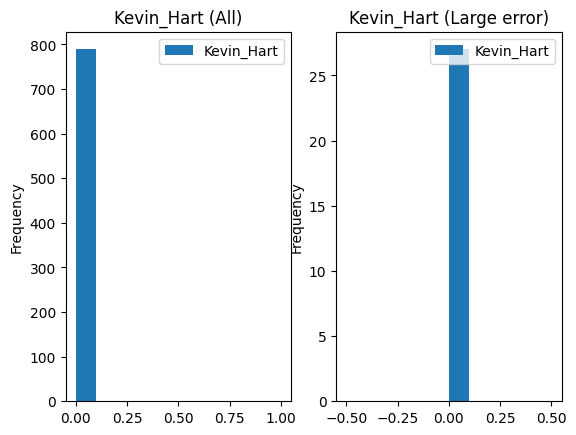

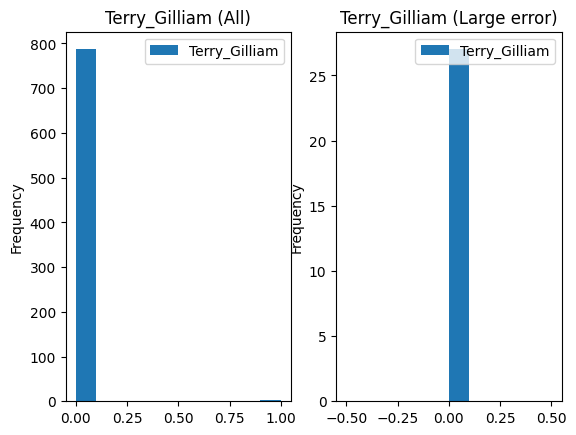

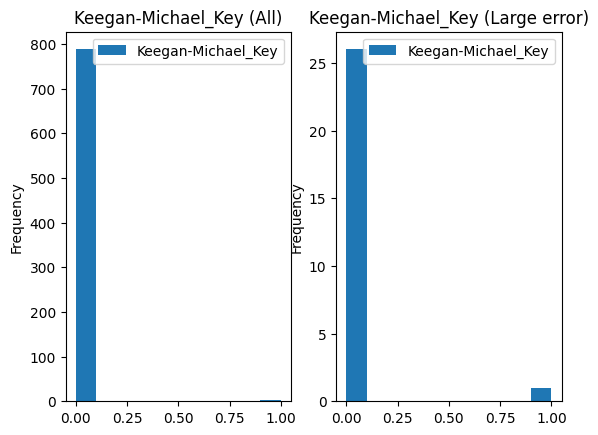

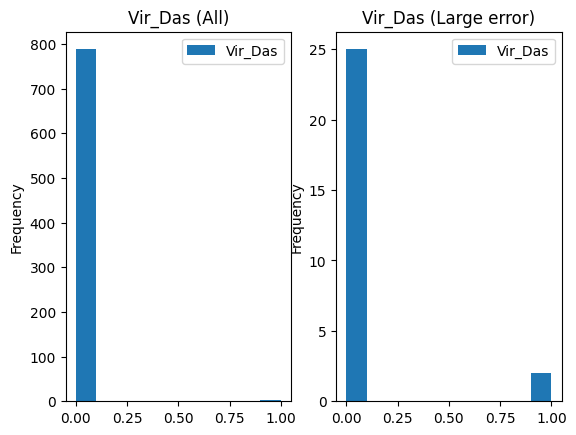

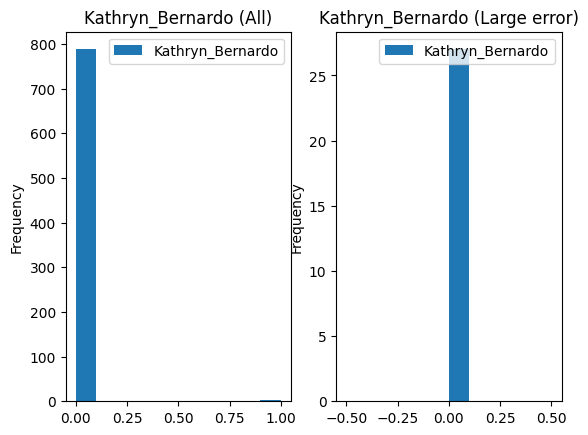

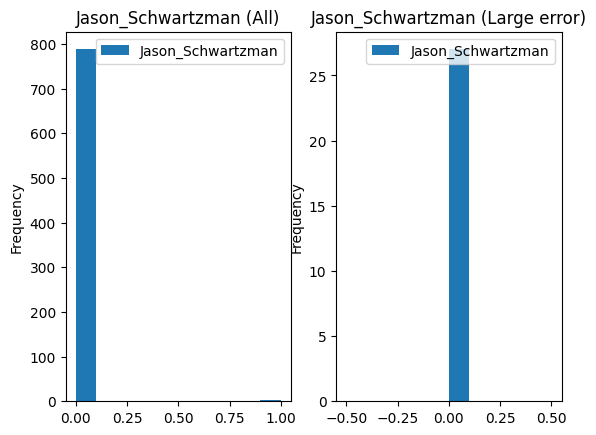

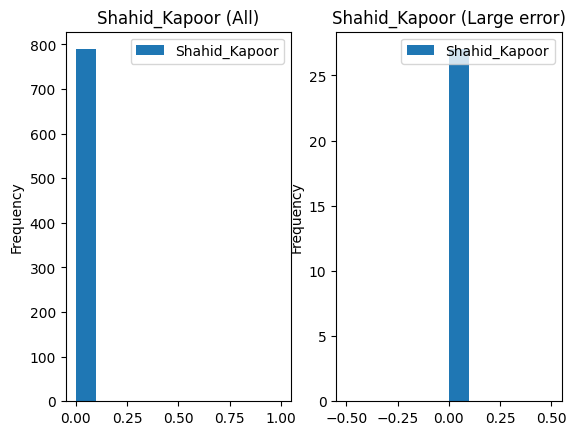

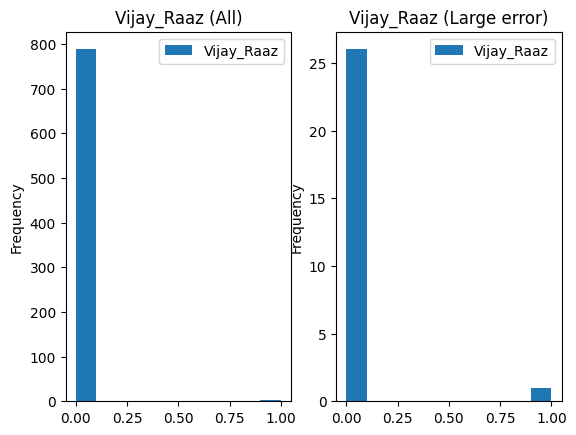

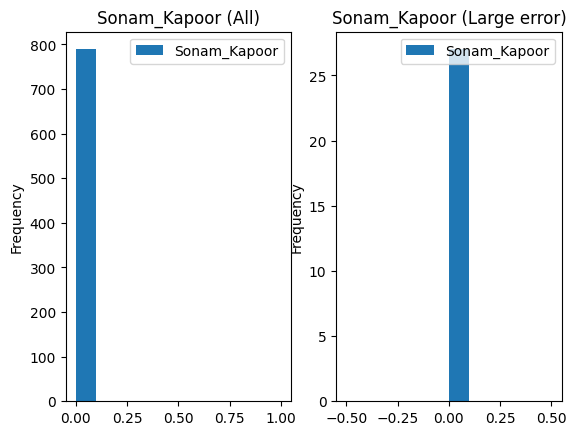

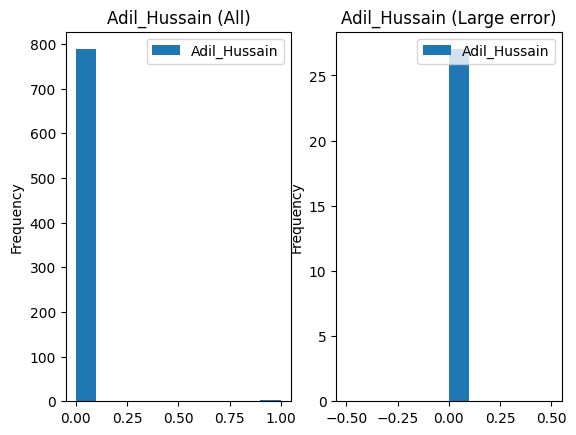

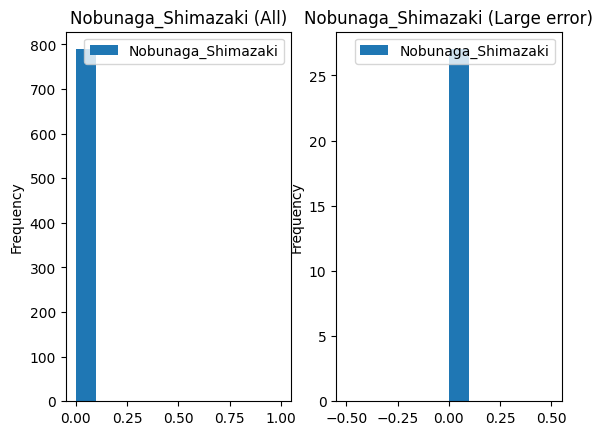

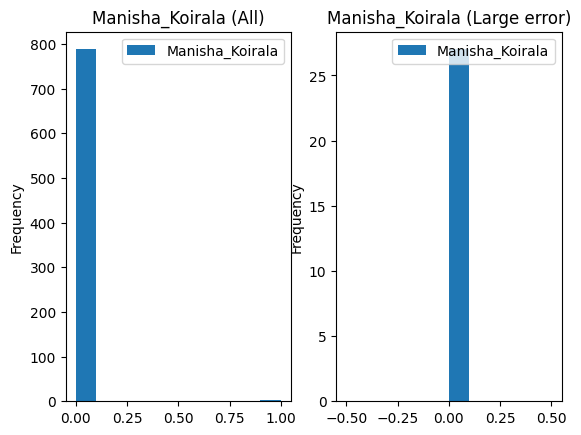

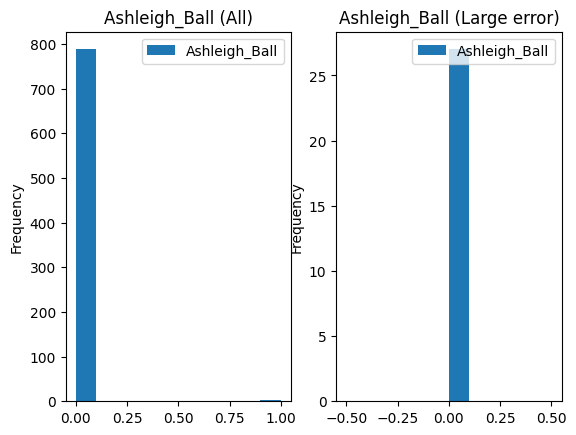

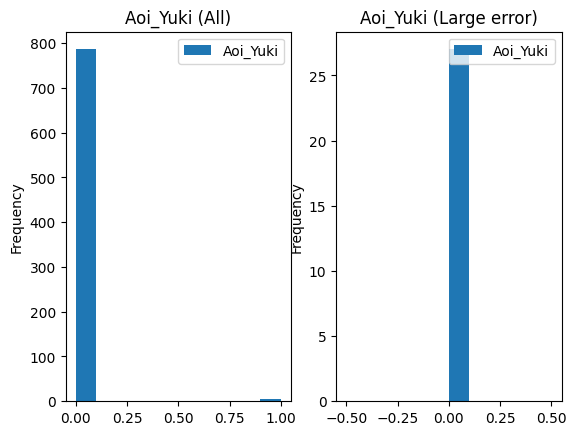

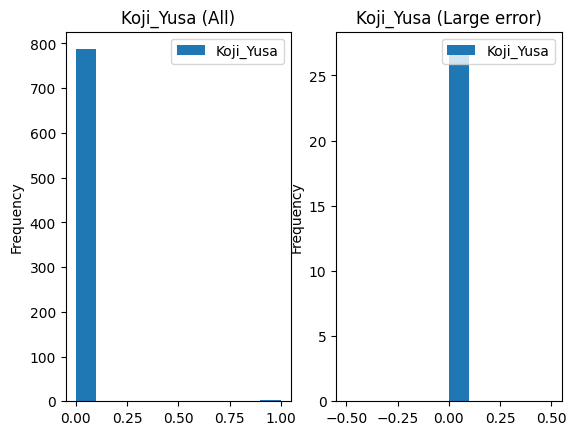

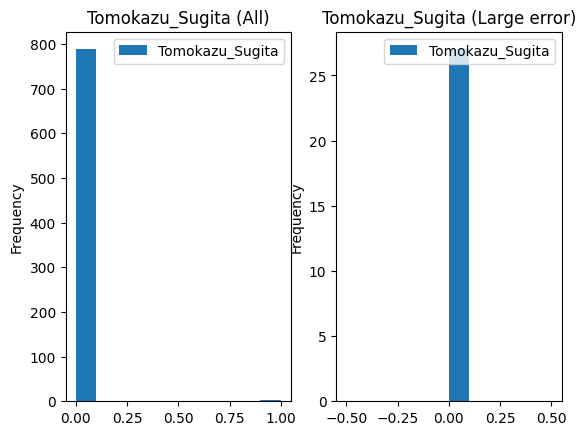

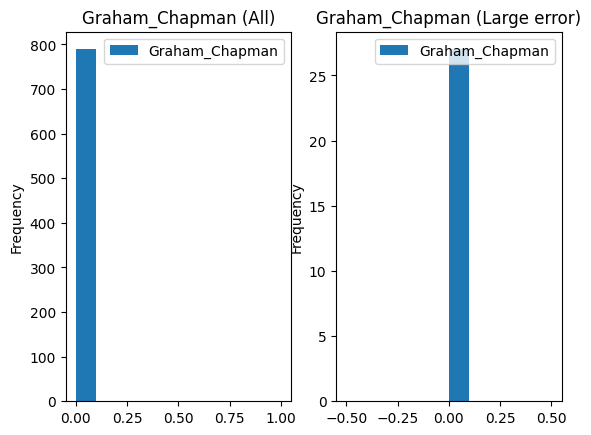

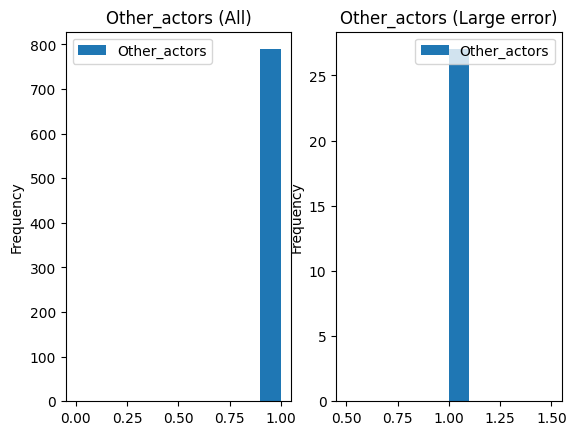

In [ ]:
import matplotlib.pyplot as plt
for column in X_test.columns:
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell
  df_with_predictions.plot(kind='hist', y=column, title=f'{column} (All)', ax=ax1)
  df_with_predictions[df_with_predictions.pred_diff > 2].plot(kind='hist', y=column, title=f'{column} (Large error)', ax=ax2)

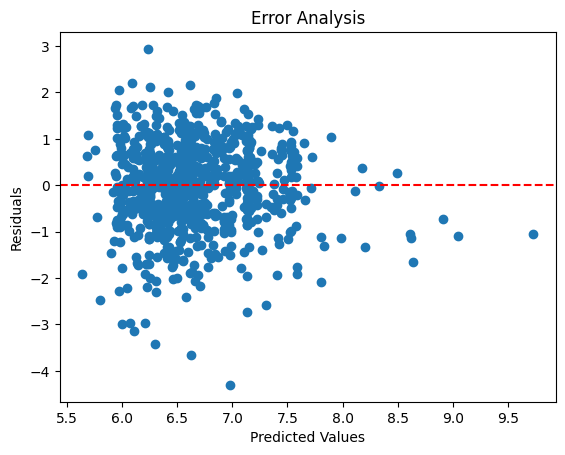

           Actual   Predicted   Residuals
count  790.000000  790.000000  790.000000
mean     6.638781    6.662086   -0.023305
std      1.062946    0.493209    0.945121
min      2.675000    5.640779   -4.303518
25%      5.950000    6.310500   -0.613077
50%      6.725000    6.582235    0.041292
75%      7.375000    6.971912    0.623528
max      9.175000    9.726951    2.937698


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

y_pred = optimized_linear.predict(X_test)

# Fehleranalyse
residuals = y_test - y_pred
error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Plotten der Fehleranalyse
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Error Analysis')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontale Linie bei Residuals=0
plt.show()

# Statistiken der Fehleranalyse
error_stats = error_df.describe()
print(error_stats)
#Die Fehleranalyse wird grafisch dargestellt, indem die vorhergesagten Werte auf der x-Achse und die Residuen auf der y-Achse geplottet werden. Eine horizontale Linie bei Residuen=0 wird ebenfalls hinzugefügt, um den Fehler um die Nulllinie herum zu betrachten.

Viele Punkte sind doch bei der Nulllinie angesiedelt, allerding gibt es auch viele Ausreißer bei dem Modell.

##Lineares Modell: Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
import numpy as np

In [ ]:
n_alphas = 200
alphaValues = np.logspace(-10, -1, n_alphas)

linear_ridge = make_pipeline(scaler, RidgeCV(alphas=alphaValues))

In [ ]:
linear_ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-10, 1.10975250e-10, 1.23155060e-10, 1.36671636e-10,
       1.51671689e-10, 1.68318035e-10, 1.86791360e-10, 2.07292178e-10,
       2.30043012e-10, 2.55290807e-10, 2.83309610e-10, 3.14403547e-10,
       3.48910121e-10, 3.87203878e-10, 4.29700470e-10, 4.76861170e-10,
       5.29197874e-10, 5.87278661...
       9.11588830e-03, 1.01163798e-02, 1.12266777e-02, 1.24588336e-02,
       1.38262217e-02, 1.53436841e-02, 1.70276917e-02, 1.88965234e-02,
       2.09704640e-02, 2.32720248e-02, 2.58261876e-02, 2.86606762e-02,
       3.18062569e-02, 3.52970730e-02, 3.91710149e-02, 4.34701316e-02,
       4.82410870e-02, 5.35356668e-02, 5.94113398e-02, 6.59318827e-02,
       7.31680714e-02, 8.11984499e-02, 9.01101825e-02, 1.00000000e-01])))])

In [ ]:
linear_ridge[1].alpha_

0.1

In [ ]:
evaluate(linear_ridge, X_test,y_test)

R2: 0.26231603615944765
MAE: 0.7089687343565767
MSE: 0.8324208228393729
RMSE: 0.9123709896962819
MAPE: 0.11792611342598493


Ein R2 von 26% (nicht wirklich gut)

###Hyperparameter Tuning

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Definiere den Parameterraum für das Ridge-Modell
param_grid = {
    'ridgecv__alpha_per_target': [True, False],
    'ridgecv__alphas': [[0.1, 0.5, 1.0]],  # Beispielwerte für 'alphas'
    'ridgecv__cv': [None, 5],  # Beispielwerte für 'cv'
    'ridgecv__fit_intercept': [True, False],
    'ridgecv__gcv_mode': [None, 'auto'],  # Beispielwerte für 'gcv_mode'
    'ridgecv__scoring': ['neg_mean_squared_error', 'r2'],
    'ridgecv__store_cv_values': [True, False]
}

# Erstelle den RandomizedSearchCV Estimator
optimized_ridge = RandomizedSearchCV(linear_ridge, param_distributions=param_grid, n_iter=100, n_jobs=-1, random_state=42, verbose=3)

# Führe das Hyperparameter-Tuning durch
optimized_ridge.fit(X_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 40

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('ridgecv',
                                              RidgeCV(alphas=array([1.00000000e-10, 1.10975250e-10, 1.23155060e-10, 1.36671636e-10,
       1.51671689e-10, 1.68318035e-10, 1.86791360e-10, 2.07292178e-10,
       2.30043012e-10, 2.55290807e-10, 2.83309610e-10, 3.14403547e-10,
       3.48910121e-10, 3.87203878e-10, 4.29700470e-10, 4.76861170e...
       7.31680714e-02, 8.11984499e-02, 9.01101825e-02, 1.00000000e-01])))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'ridgecv__alpha_per_target': [True,
                                                                      False],
                                        'ridgecv__alphas': [[0.1, 0.5, 1.0]],
                                        'ridgecv__cv': [None, 5],
                                        'ridgecv__fit_intercept': [True, False],
                                        'ridgecv__gcv_mode': [None, 'auto'],
                                        'ridgecv__scoring': ['neg_mean_squared_error',
                                                             'r2'],
                                        'ridgecv__store_cv_values': [True,
                                                                     False]},
                   random_state=42, verbose=3)

In [ ]:
optimized_ridge.best_params_

{'ridgecv__store_cv_values': True,
 'ridgecv__scoring': 'neg_mean_squared_error',
 'ridgecv__gcv_mode': None,
 'ridgecv__fit_intercept': True,
 'ridgecv__cv': None,
 'ridgecv__alphas': [0.1, 0.5, 1.0],
 'ridgecv__alpha_per_target': False}

In [ ]:
evaluate(optimized_ridge, X_test, y_test) #Keine Veränderung des R2

R2: 0.26237717448233
MAE: 0.7089505156390957
MSE: 0.8323518328442864
RMSE: 0.9123331808304938
MAPE: 0.11792370836868192


###Overfitting testen

In [ ]:
# get best linear model (after hyperparam tuning)
best_linear = optimized_ridge.best_estimator_

# make predictions using the best linear model
predictions = best_linear.predict(X_test)

# calculate the deviance (error) for all examples in the test set
test_score = best_linear.score(X_test, y_test)

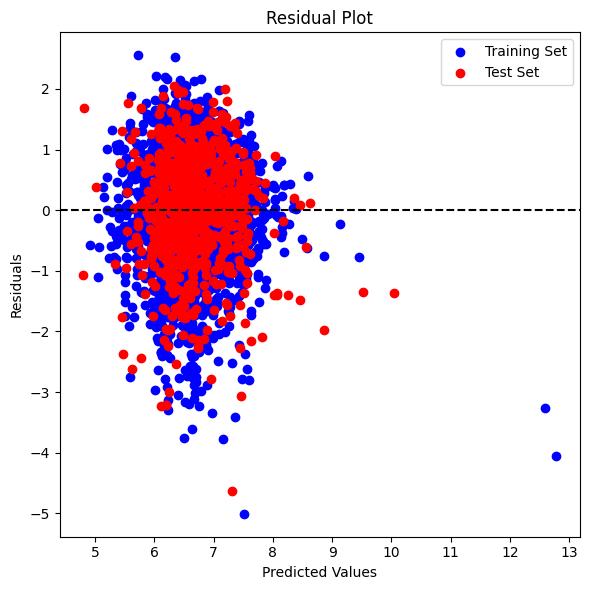

In [ ]:
# Trainingsvorhersagen
train_predictions = best_linear.predict(X_train)
# Testvorhersagen
test_predictions = best_linear.predict(X_test)

# Residuenberechnung
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

# Plot der Residuen
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.scatter(train_predictions, train_residuals, c='b', label='Training Set')
plt.scatter(test_predictions, test_residuals, c='r', label='Test Set')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper right')
fig.tight_layout()
plt.show()

Hier ist mehr Streuung zu sehen, als beim vorherigen linearen Regressionsmodell.

###Error Analysis

In [ ]:
predictions = optimized_ridge.predict(X_test)
df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

In [ ]:
df_with_predictions['pred_diff'] = np.abs(df_with_predictions['target_variable'] - df_with_predictions.Prediction)

<Axes: ylabel='Frequency'>

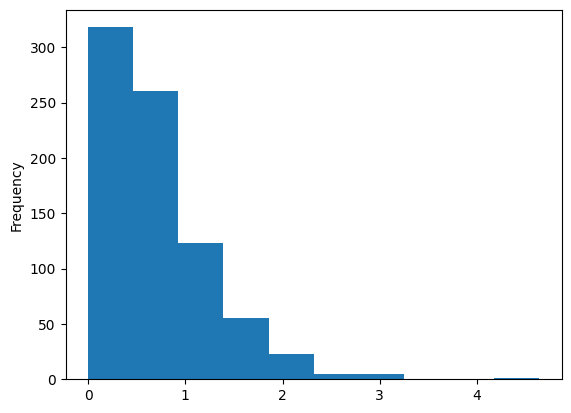

In [ ]:
df_with_predictions.pred_diff.plot(kind='hist')
#Durch die Betrachtung des Histogramms kann man beispielsweise feststellen, ob die Vorhersagen des Modells tendenziell zu großen oder kleinen Abweichungen von den tatsächlichen Werten neigen. Es ermöglicht auch eine Einschätzung der Streuung und Form der Verteilung der Abweichungswerte.

Wir schauen hier uns die Differenz ab 2 genauer an, weil eine Differenz ab 2 schon sehr groß ist

<ipython-input-33-0db338ff5b2b>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell


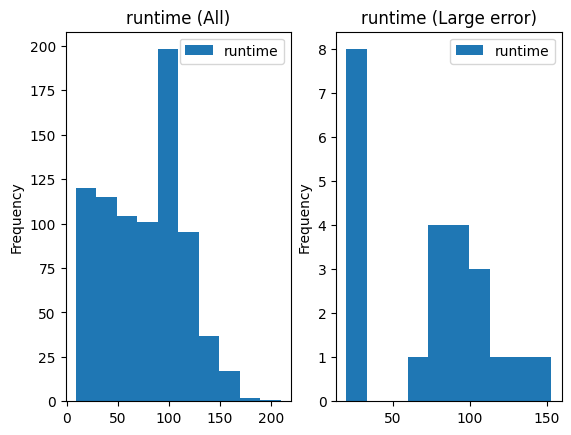

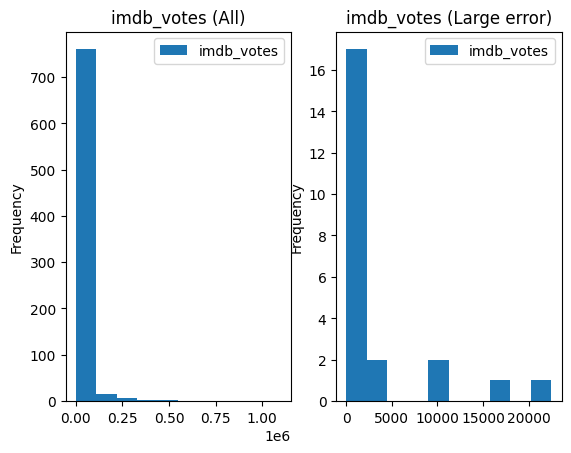

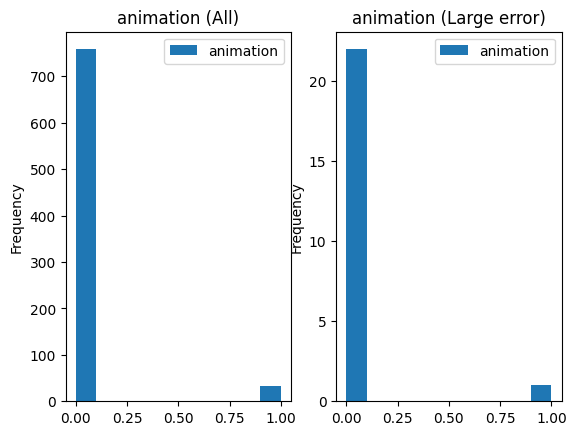

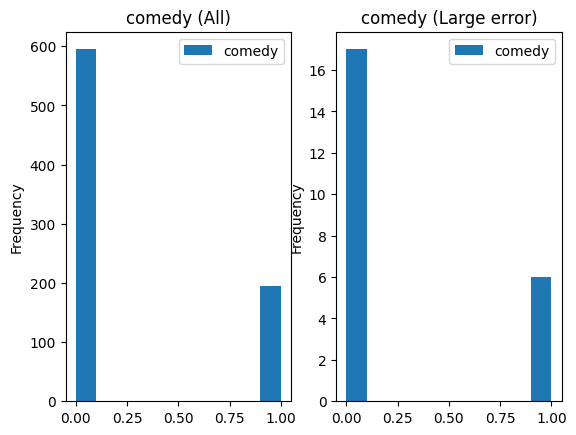

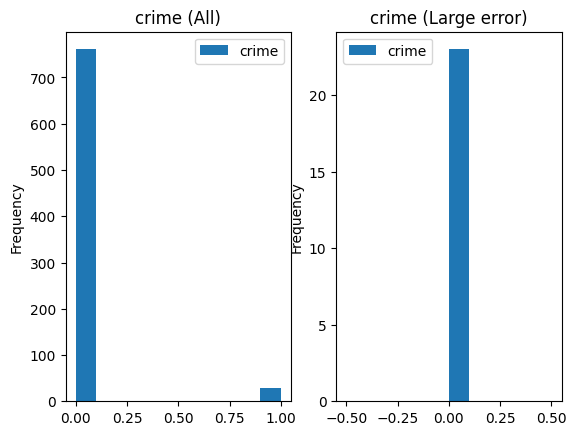

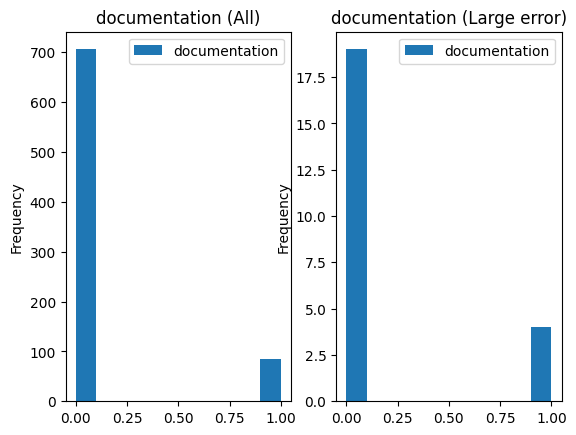

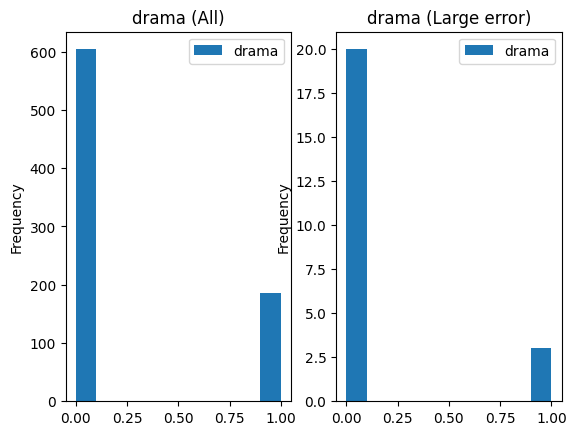

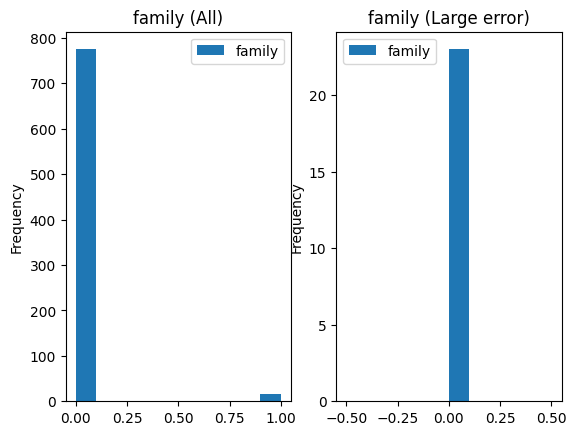

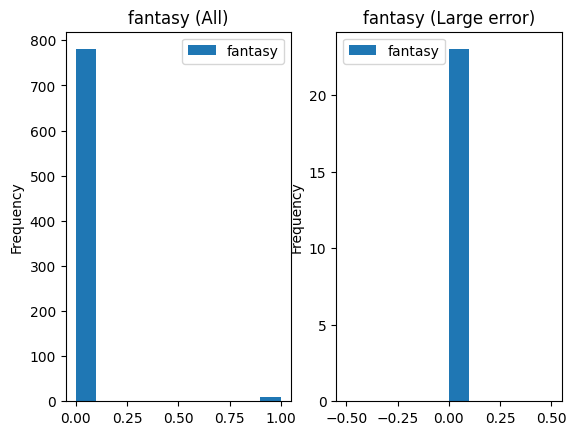

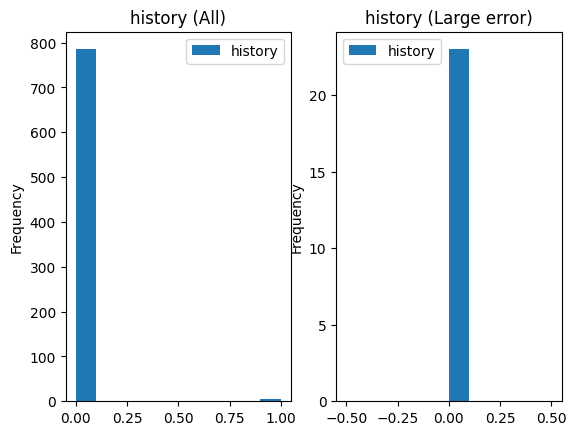

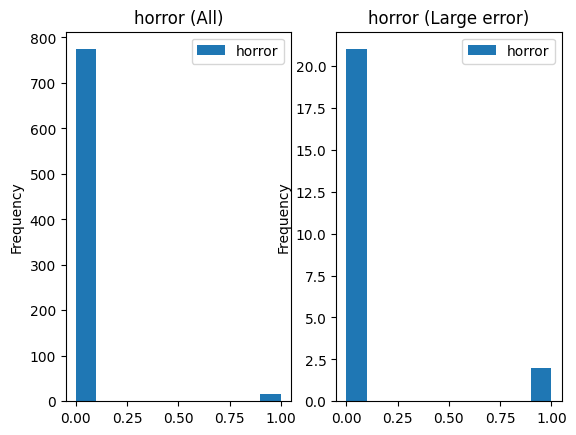

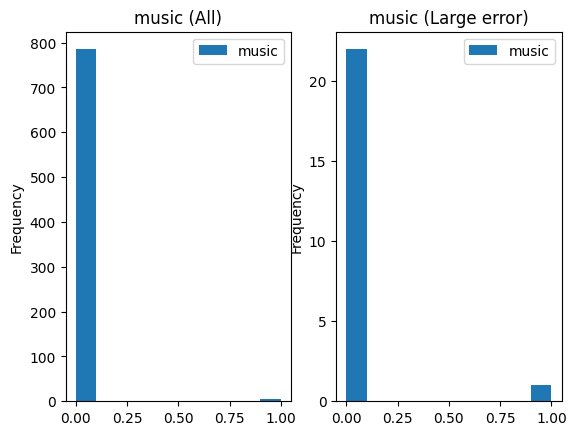

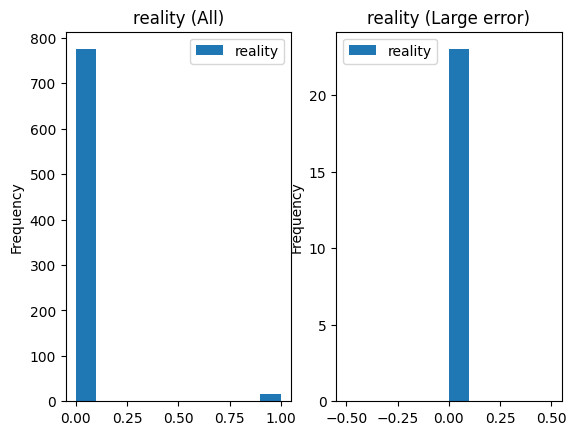

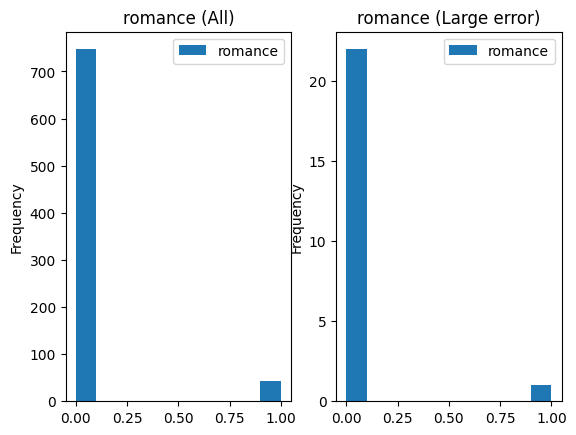

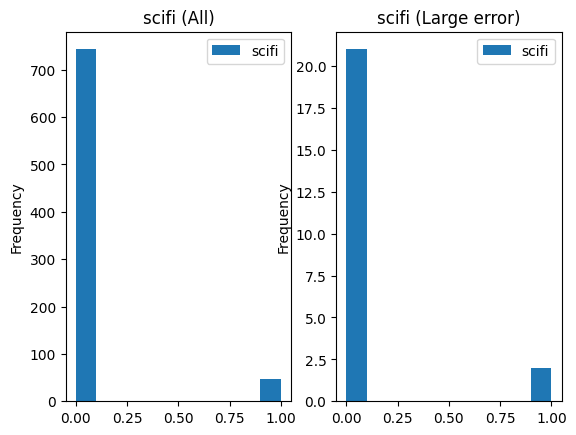

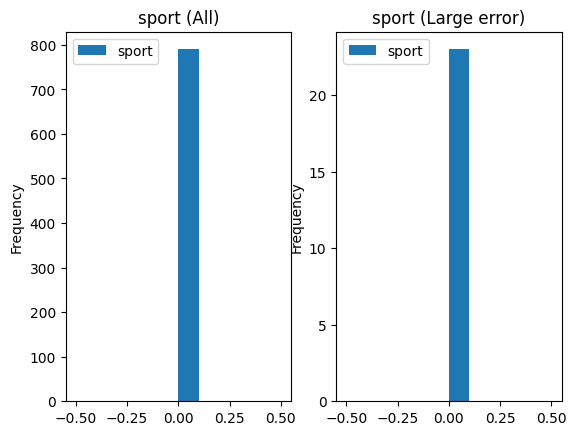

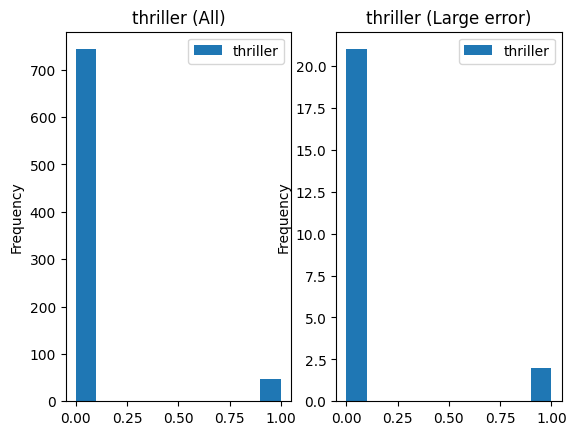

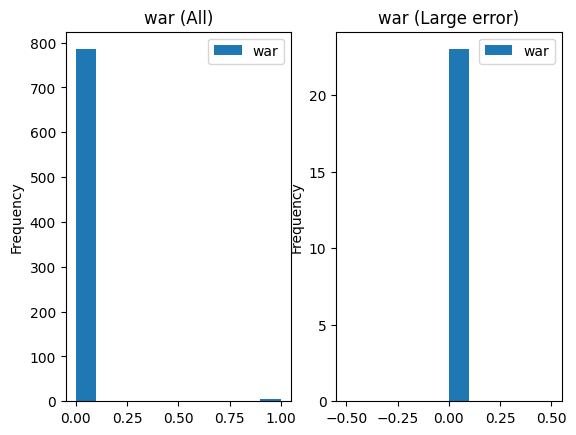

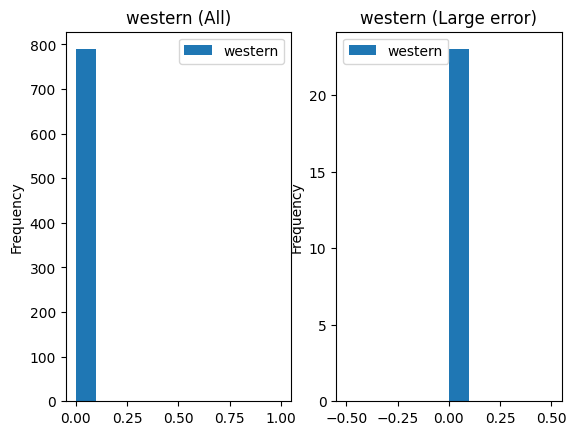

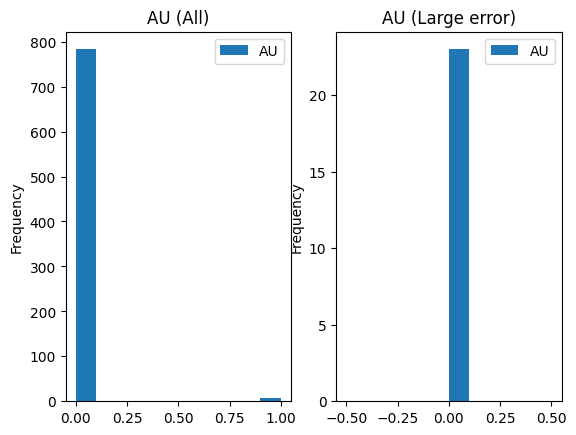

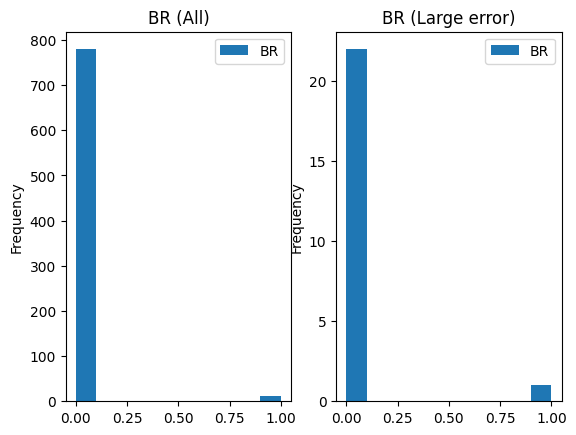

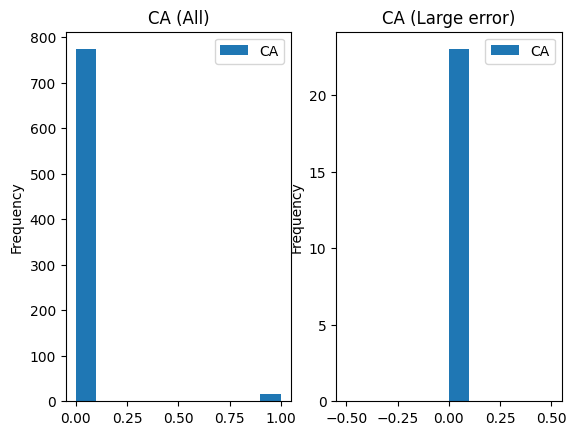

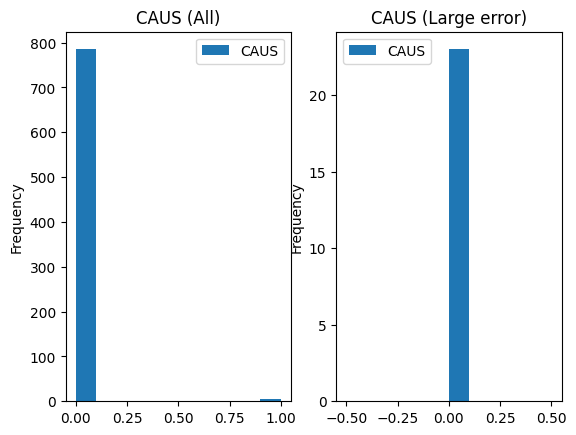

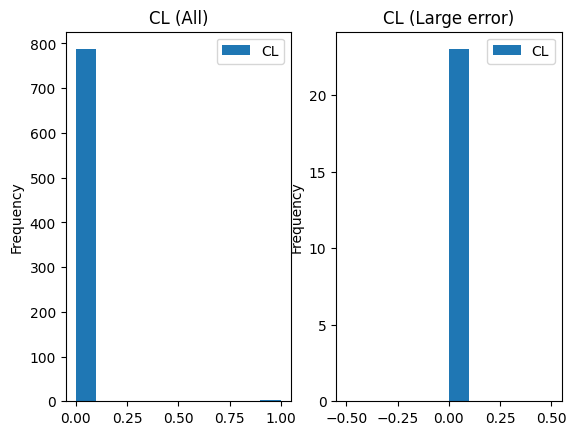

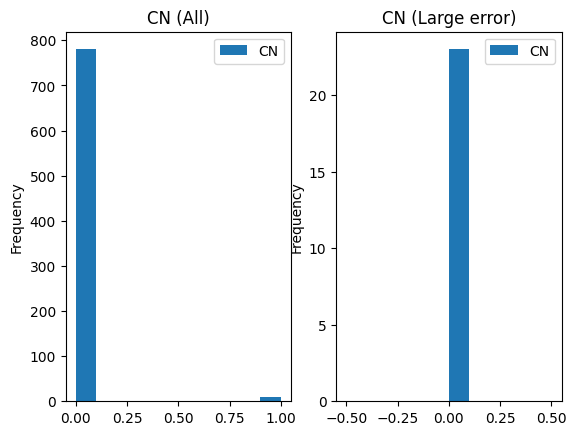

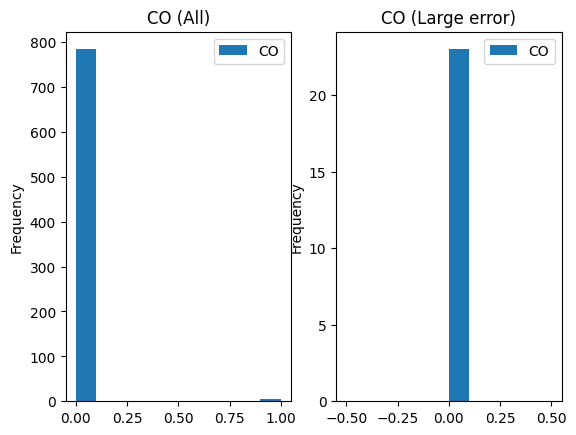

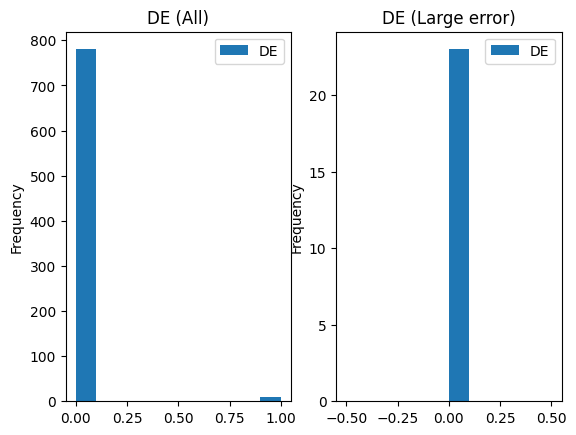

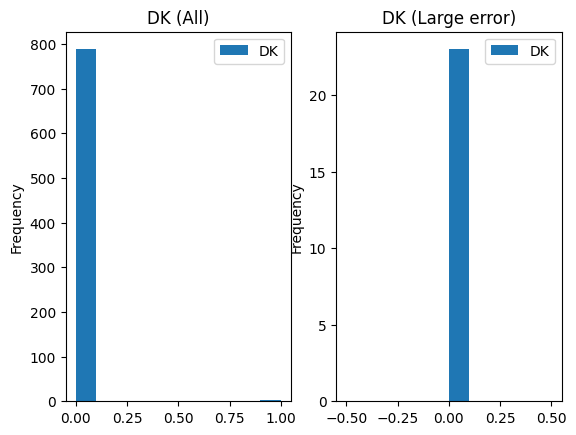

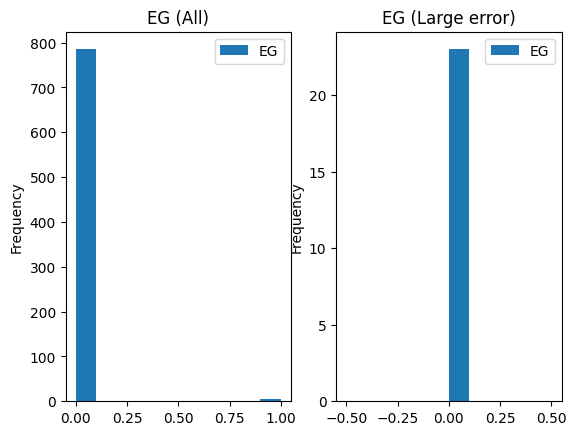

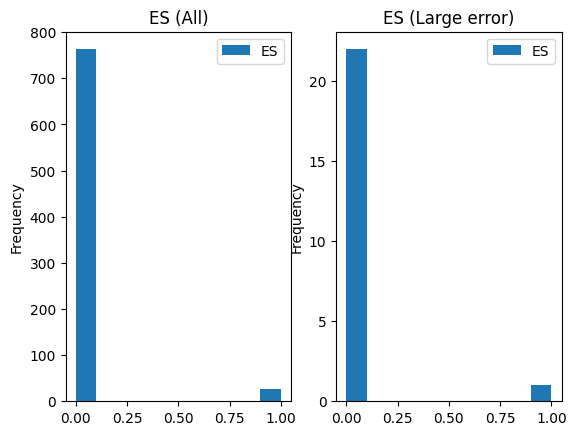

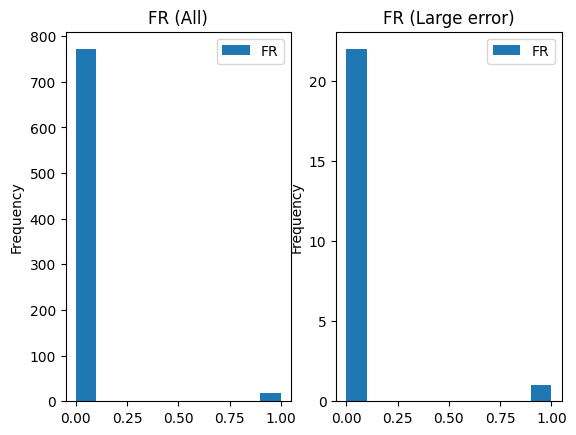

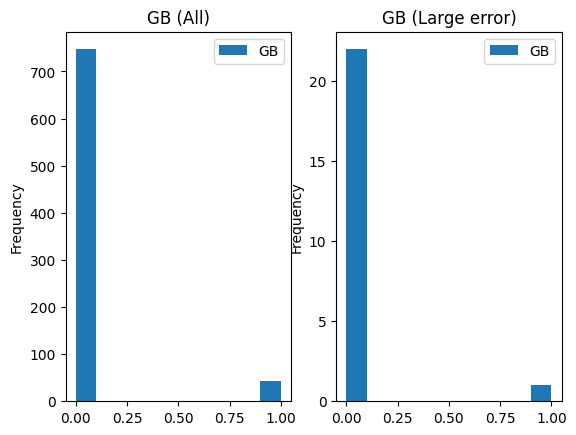

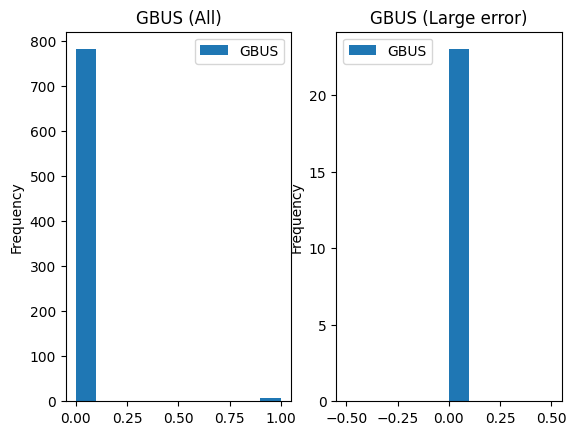

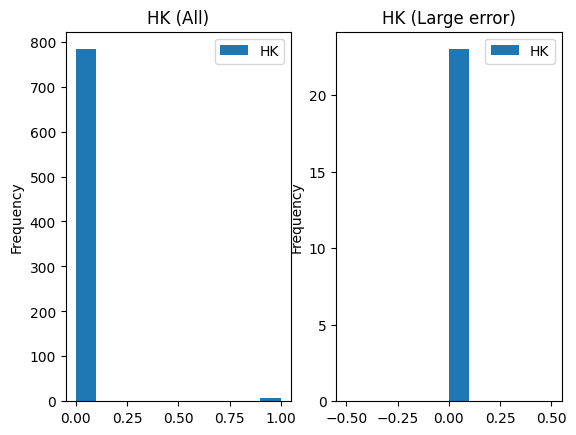

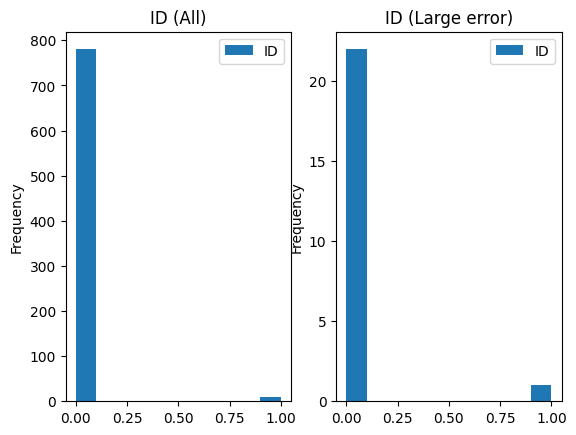

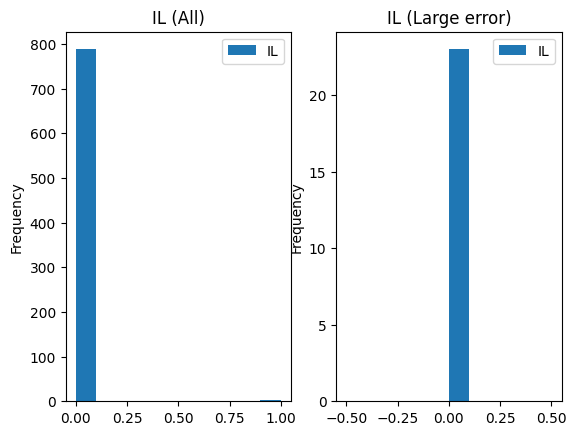

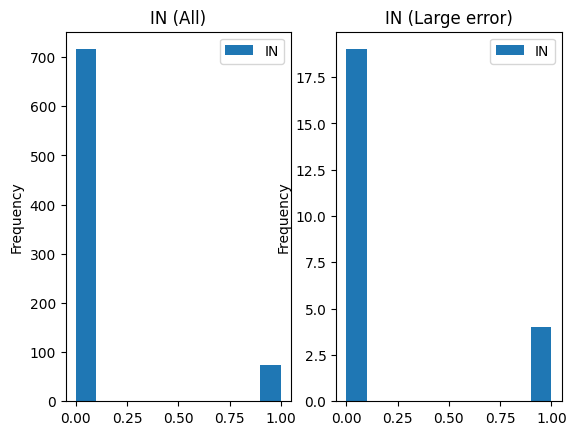

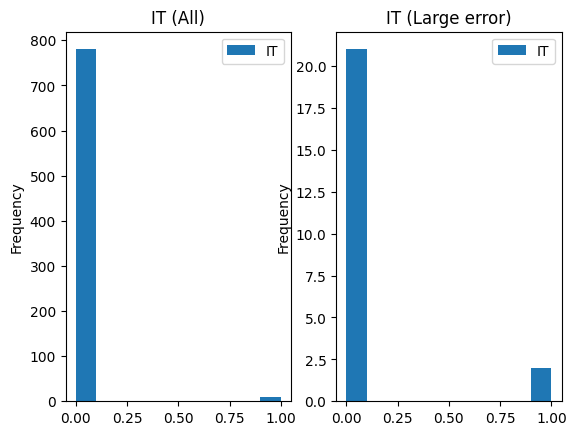

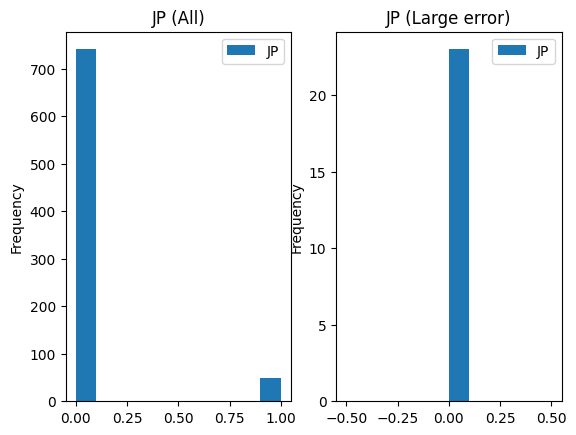

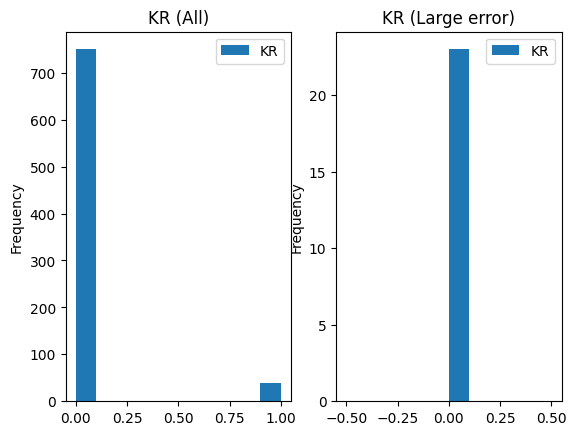

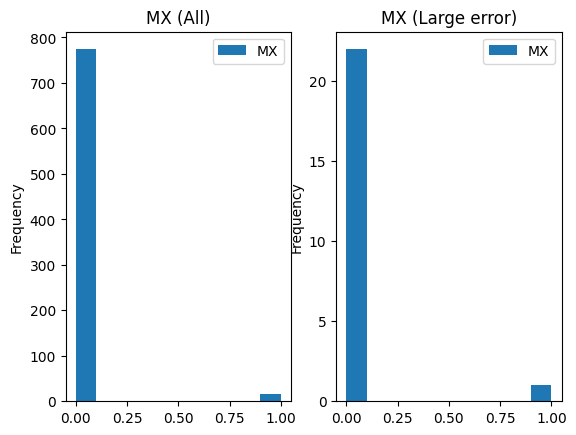

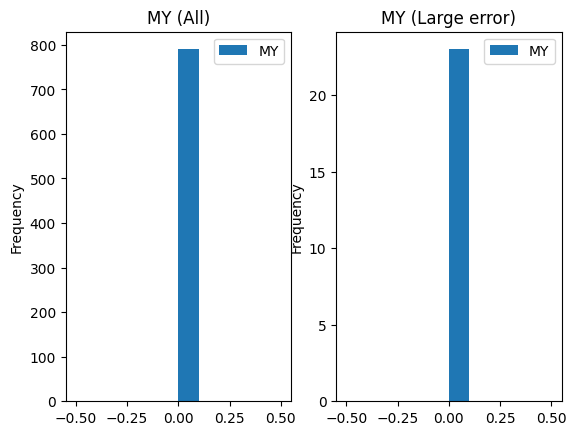

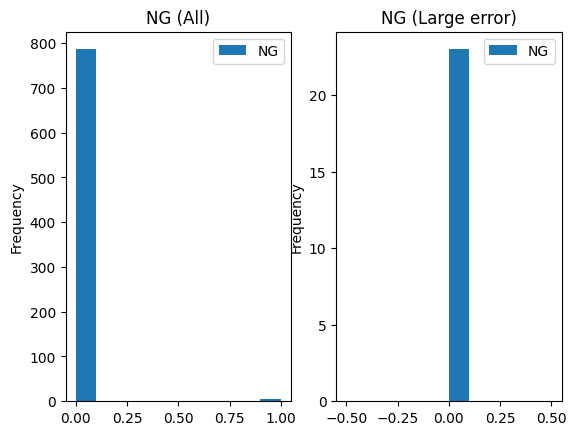

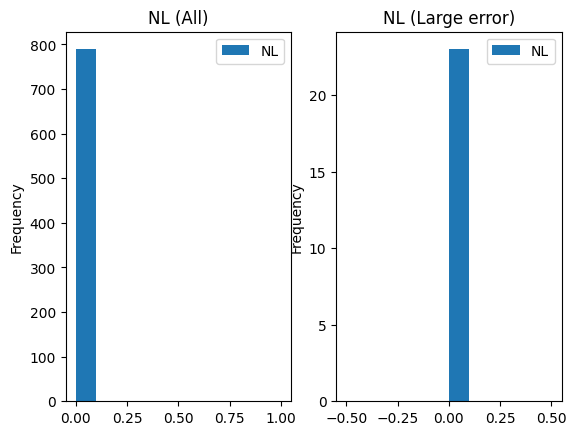

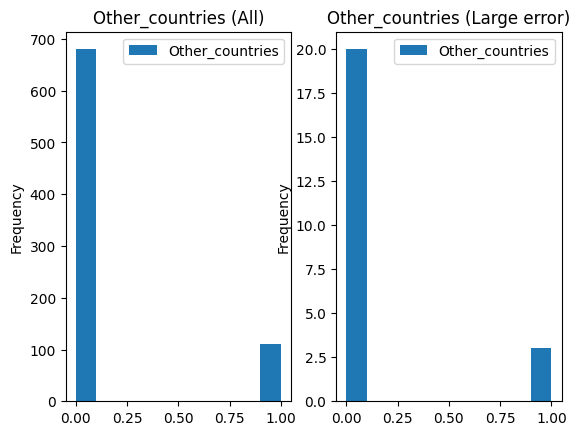

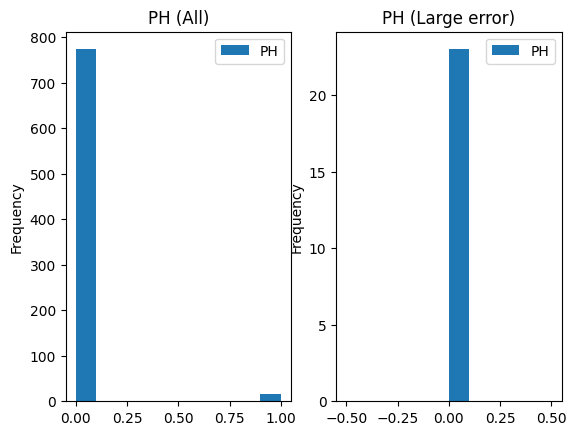

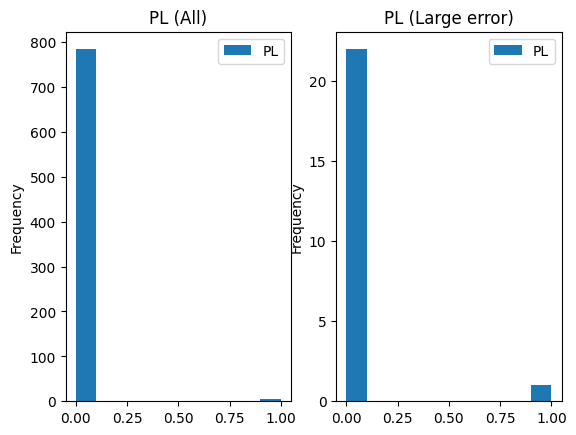

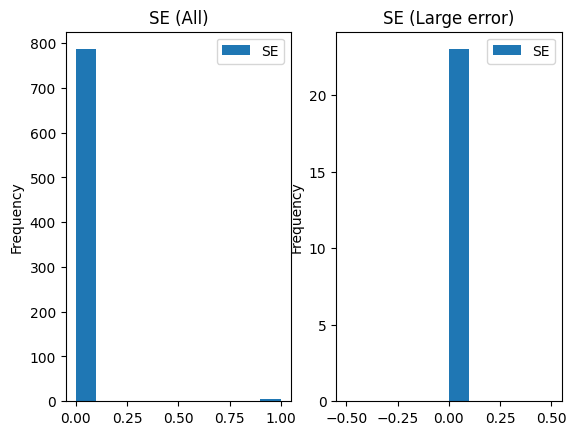

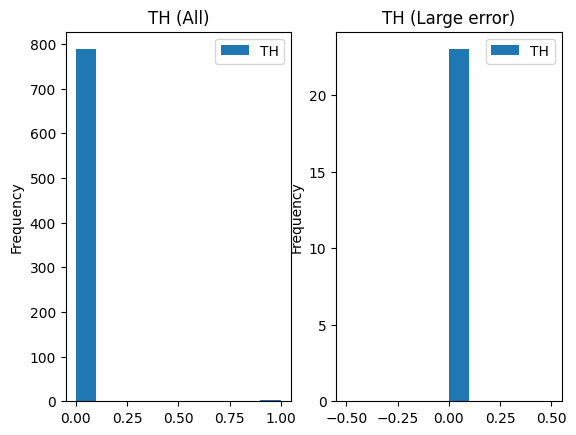

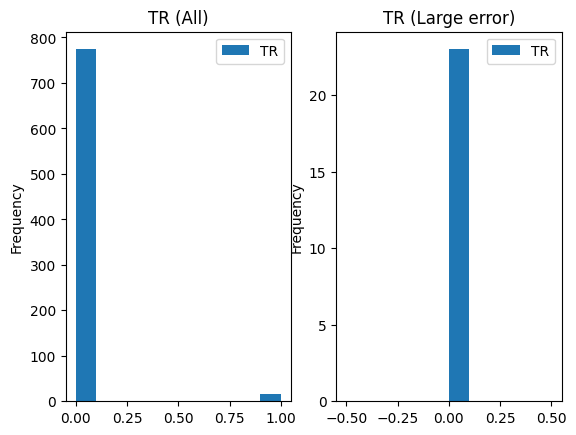

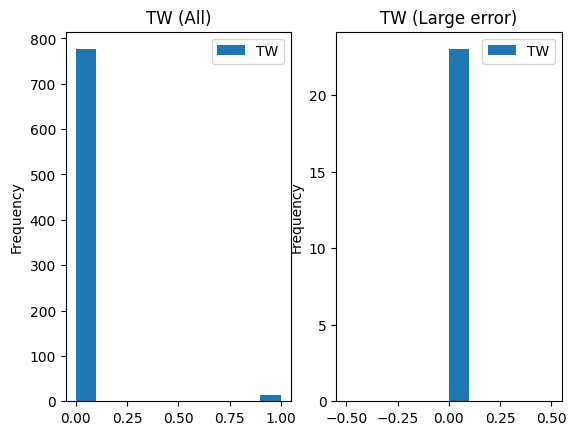

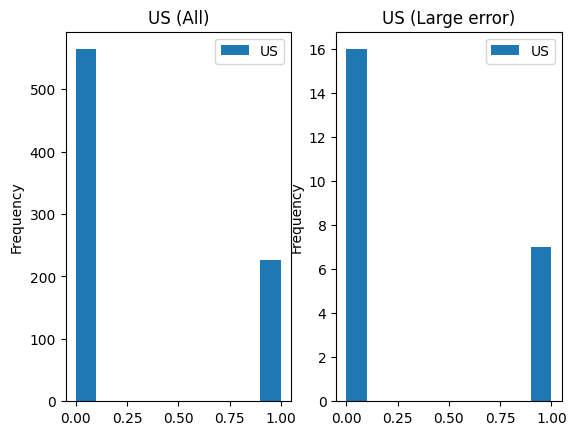

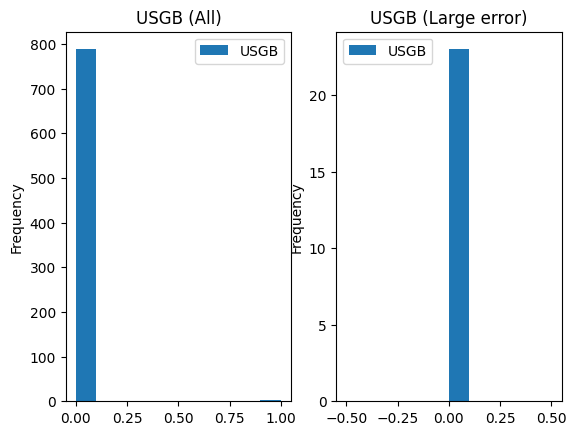

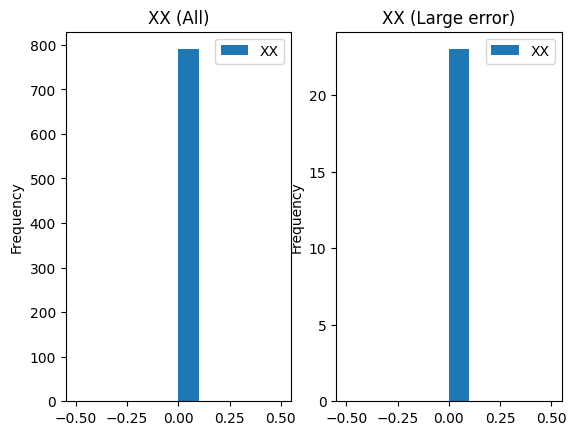

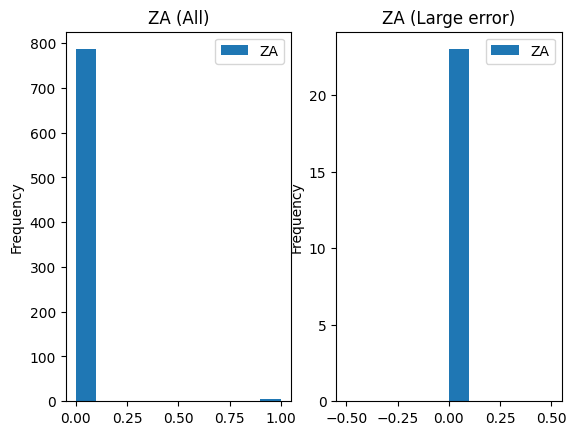

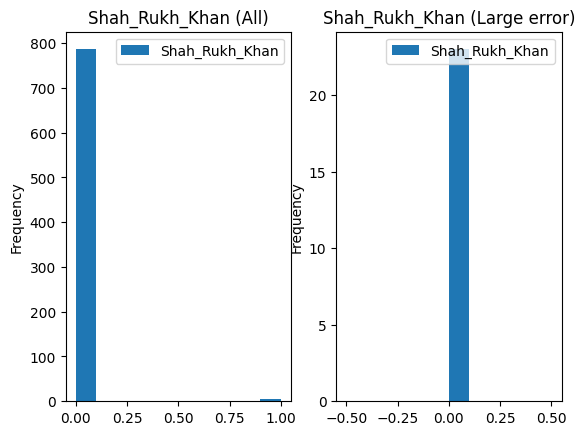

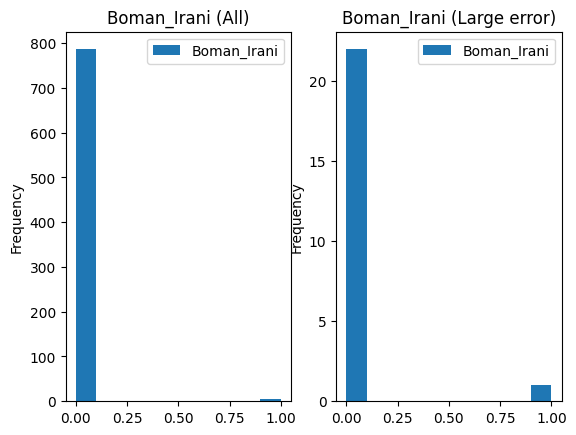

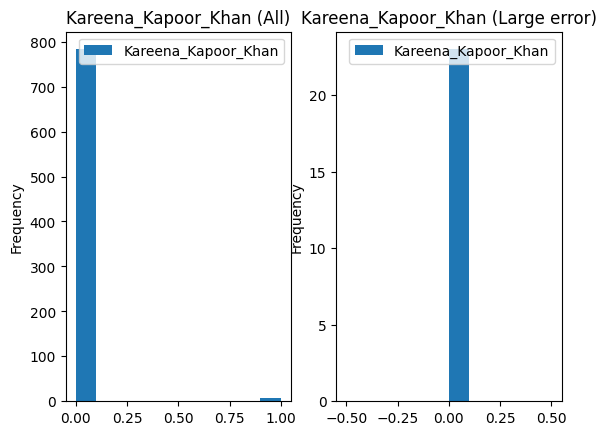

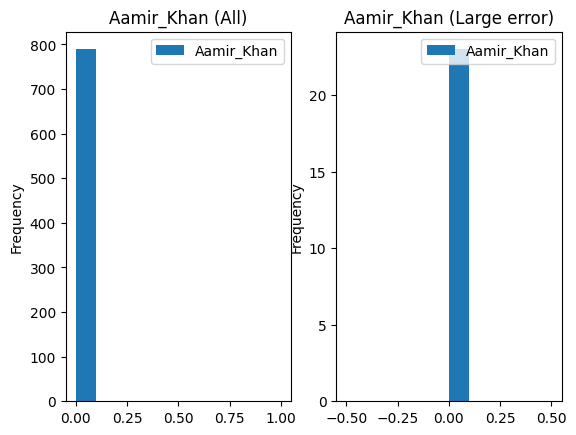

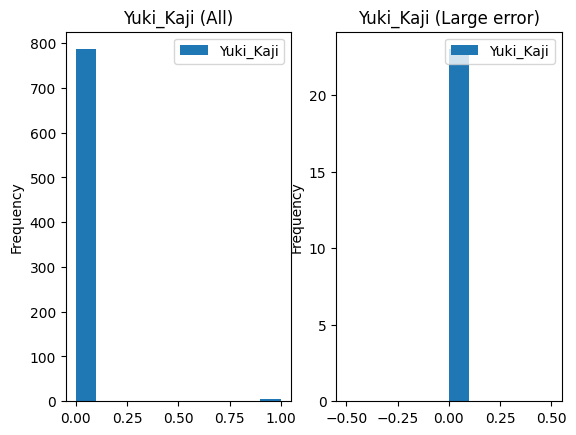

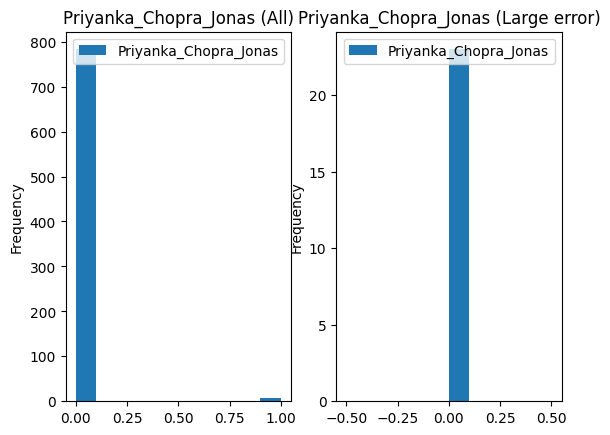

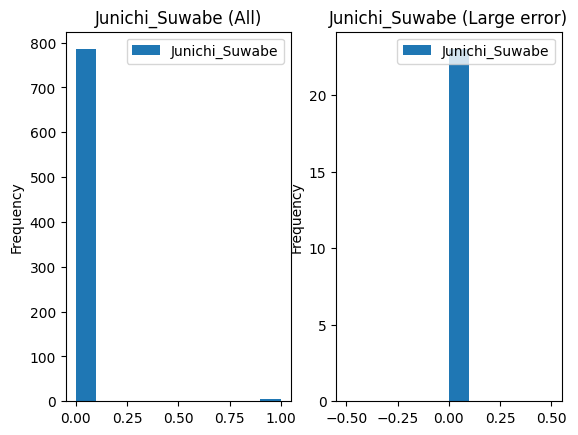

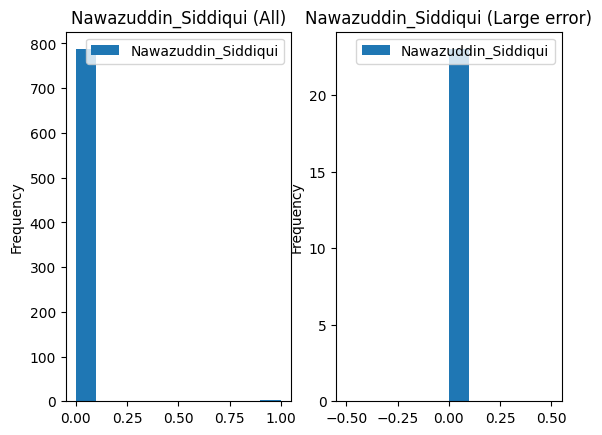

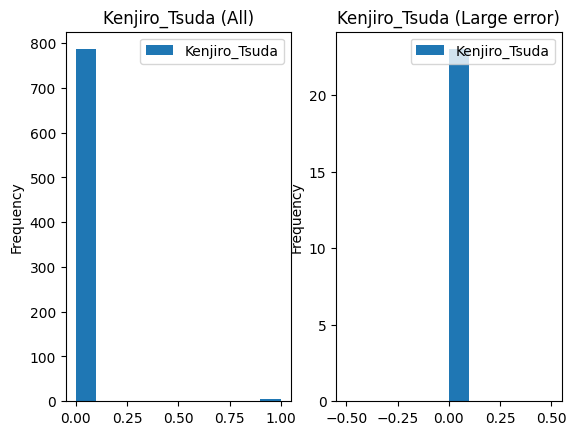

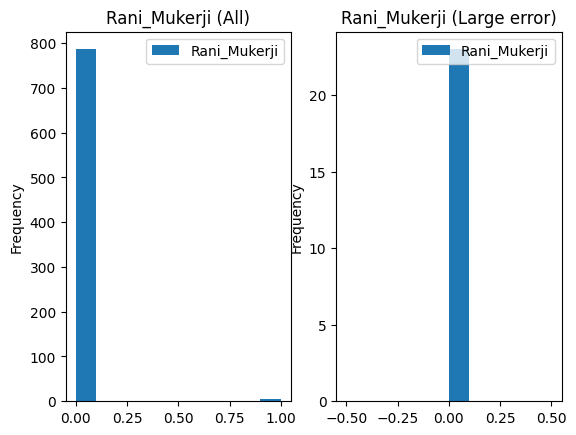

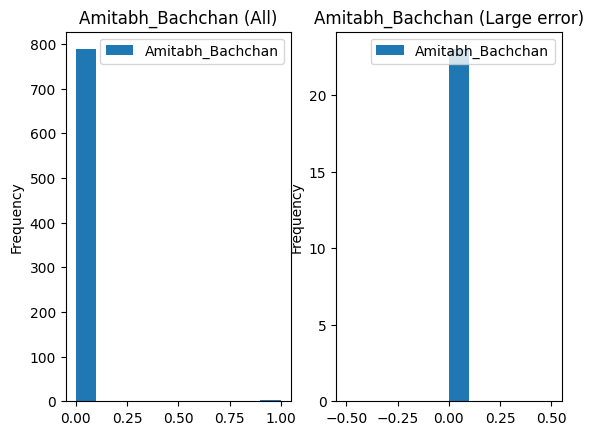

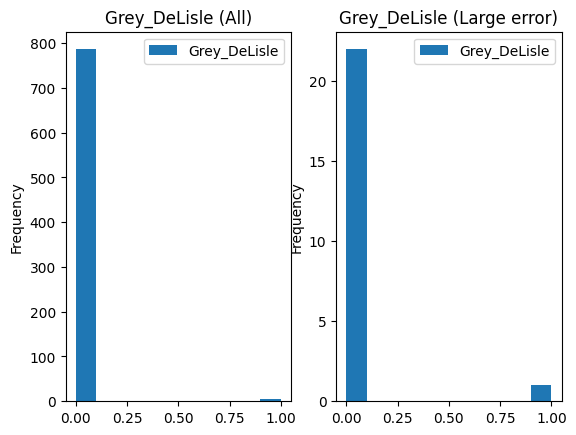

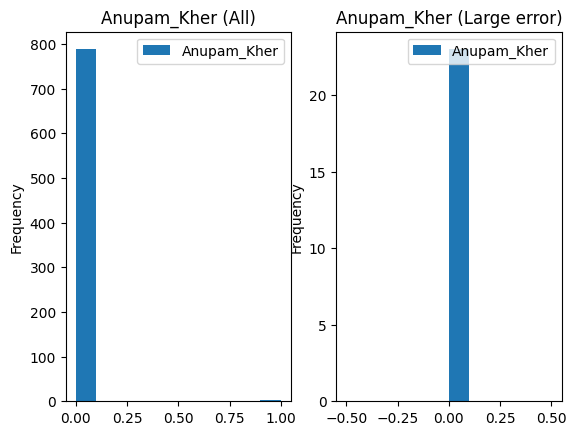

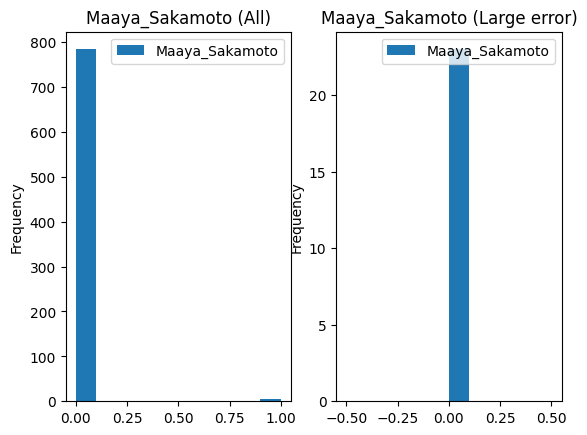

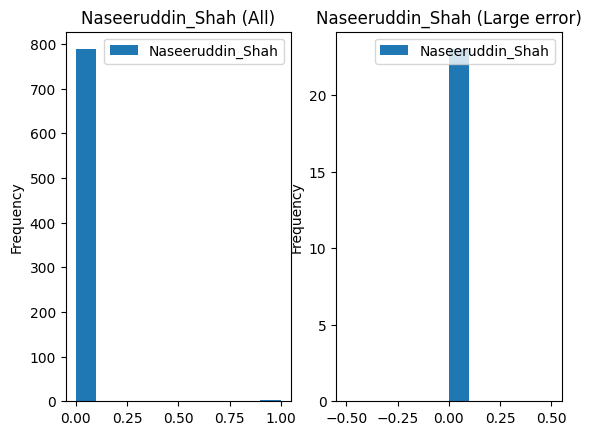

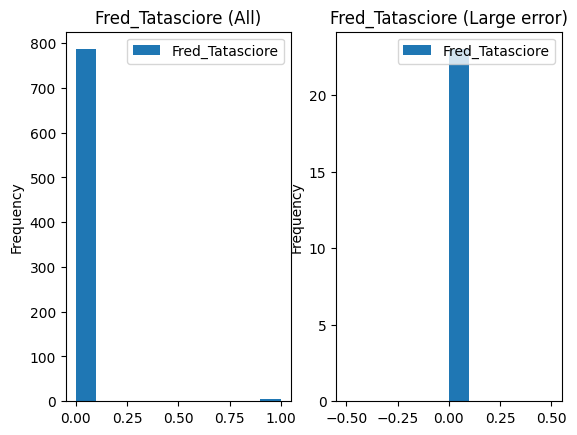

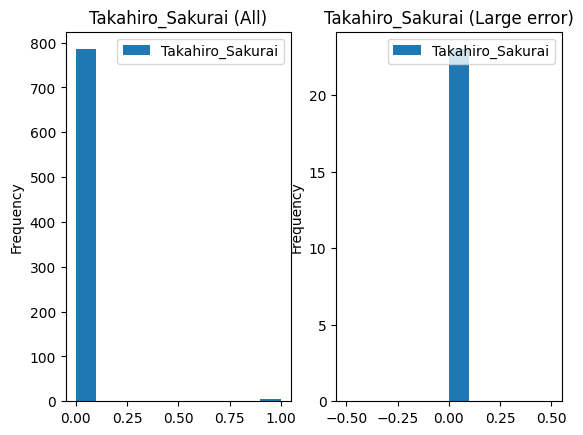

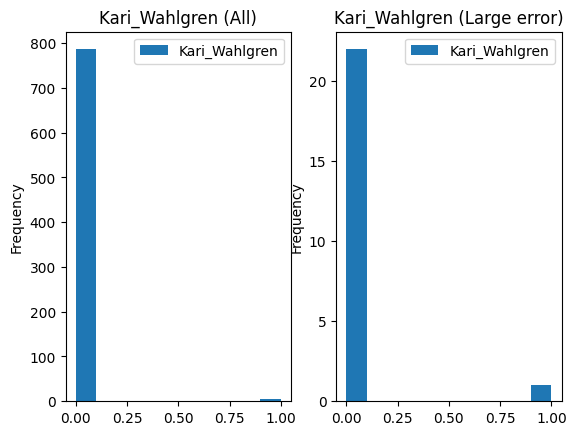

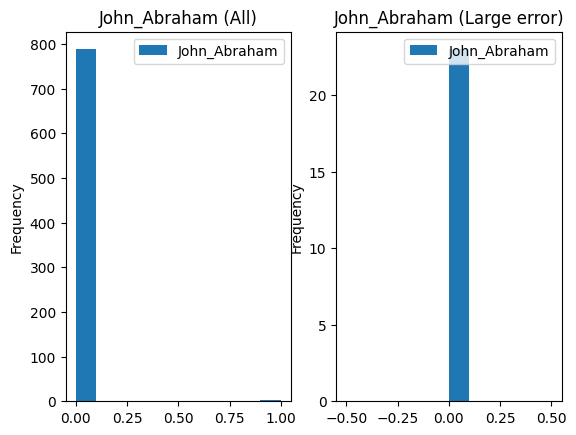

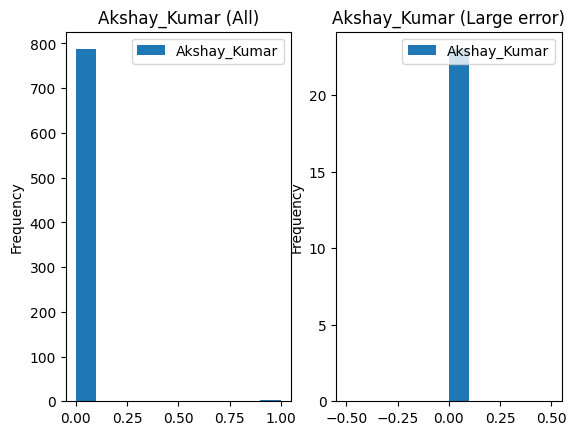

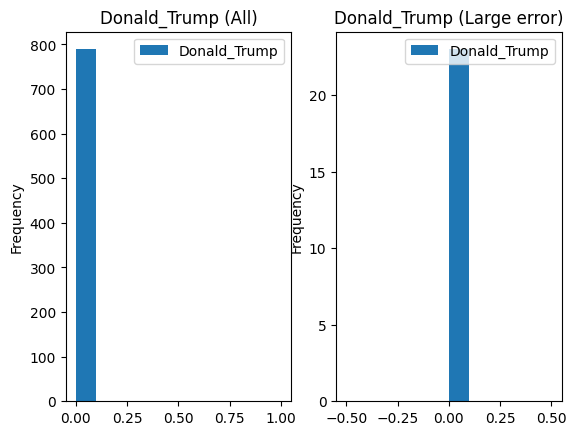

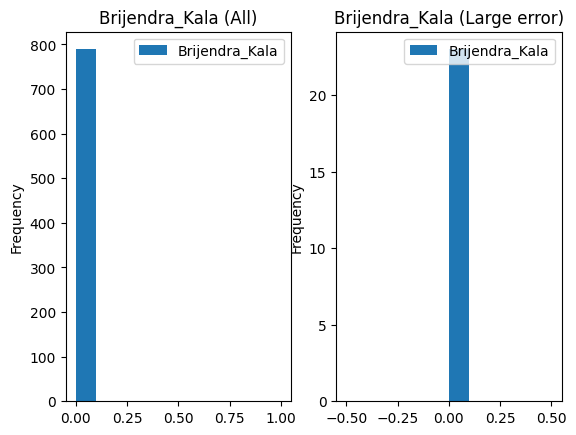

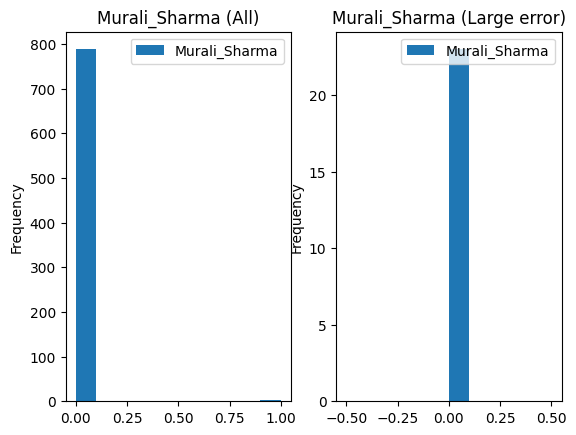

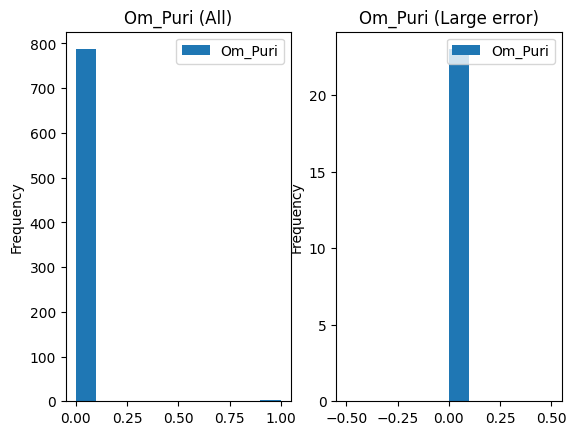

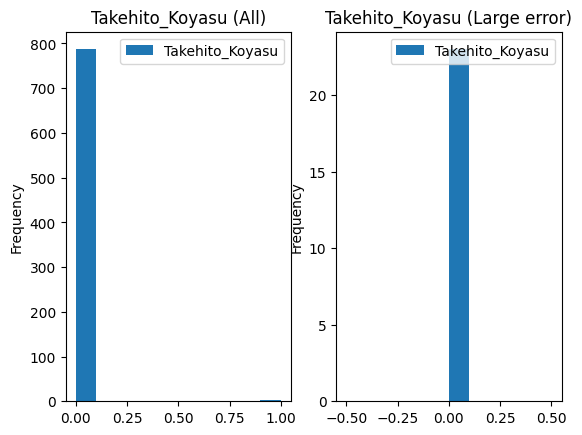

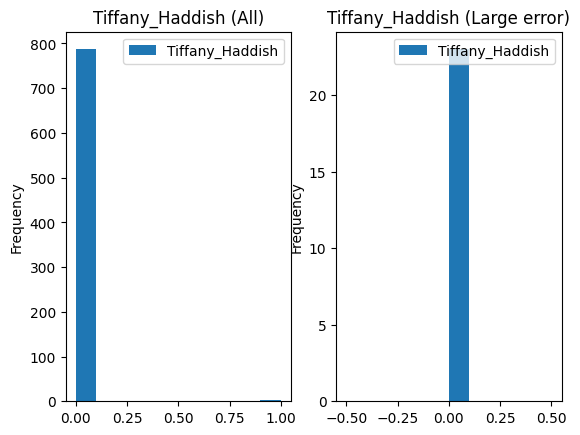

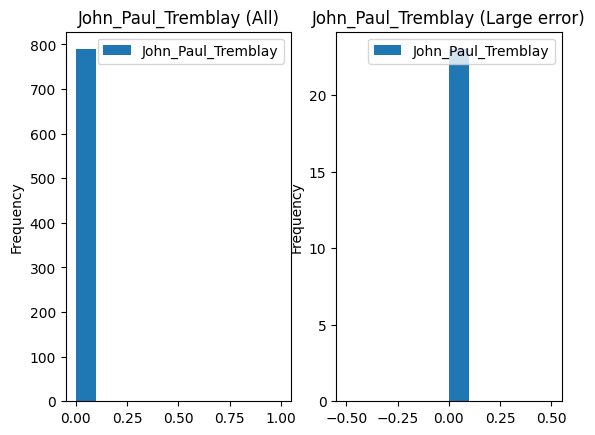

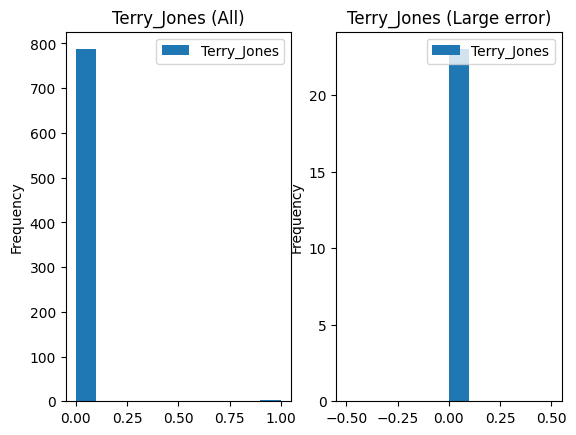

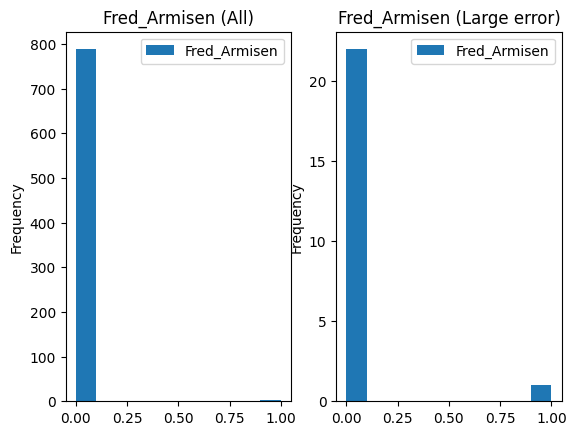

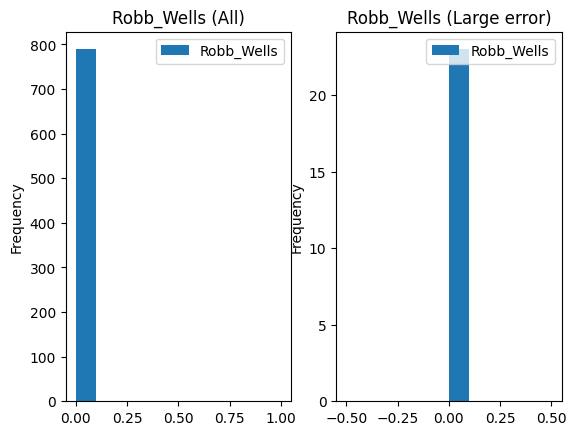

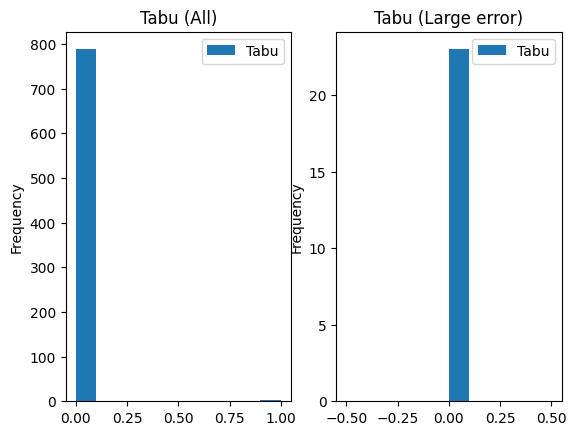

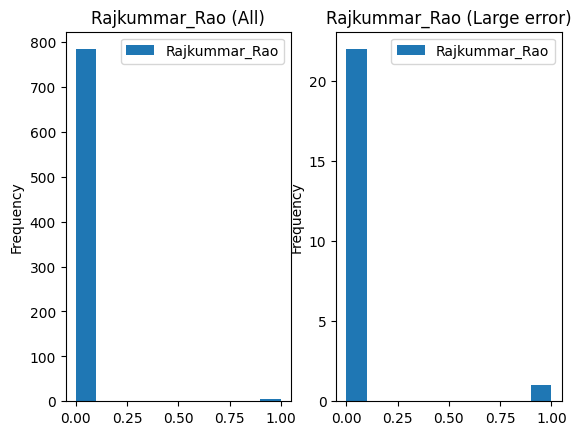

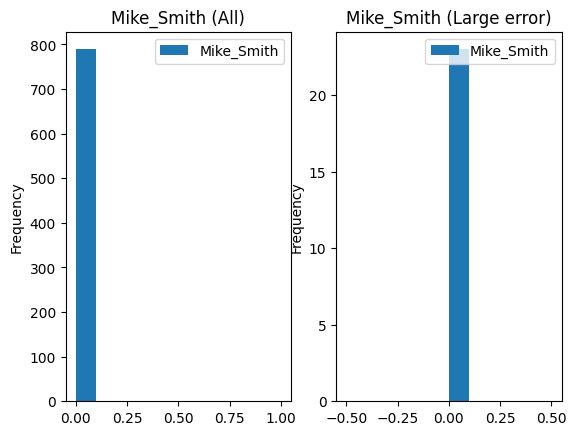

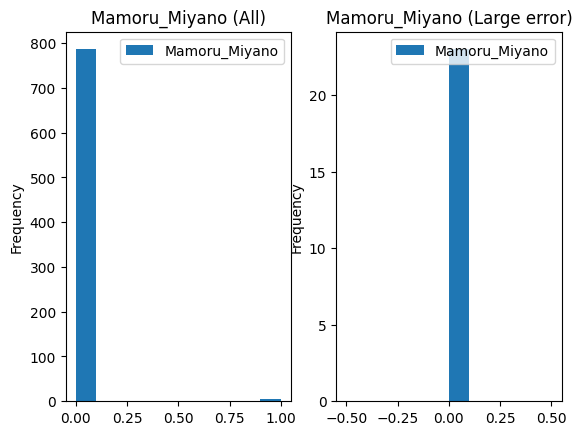

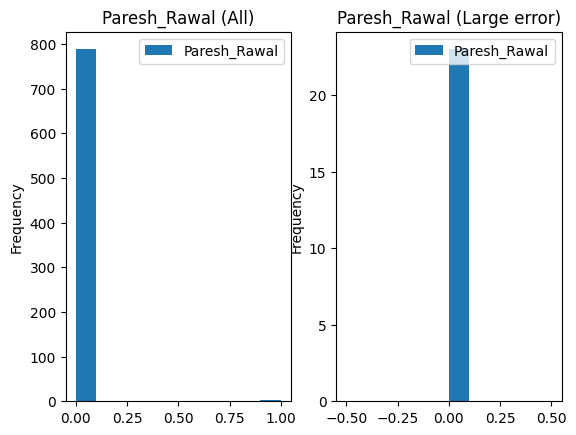

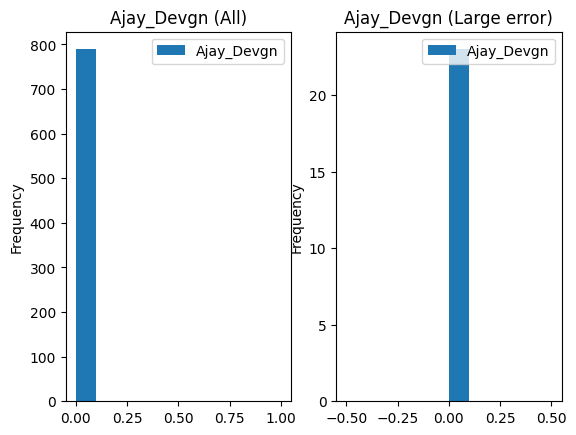

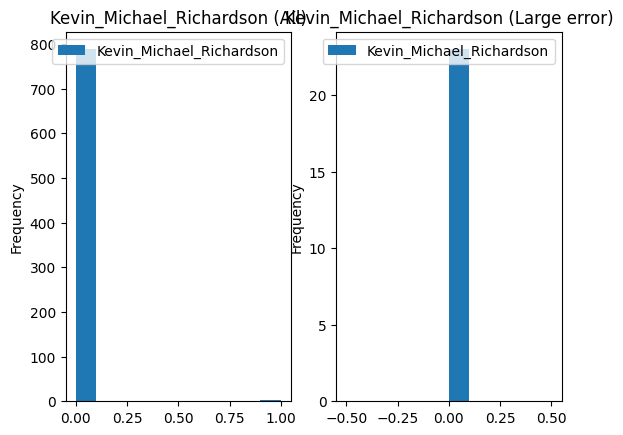

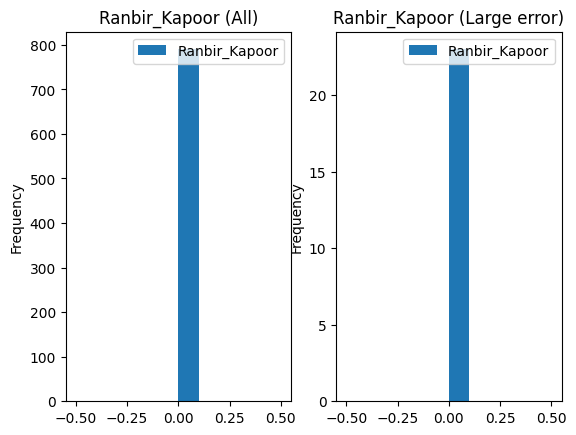

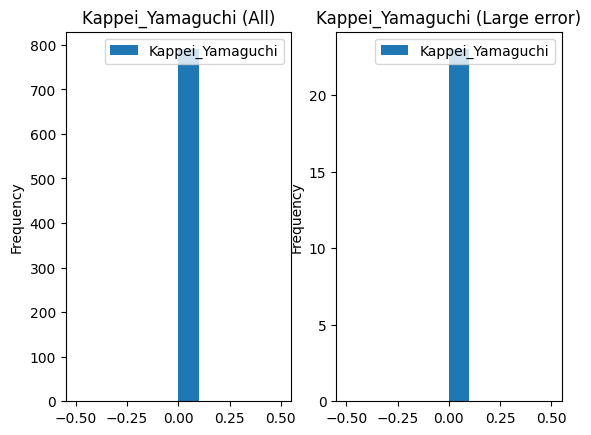

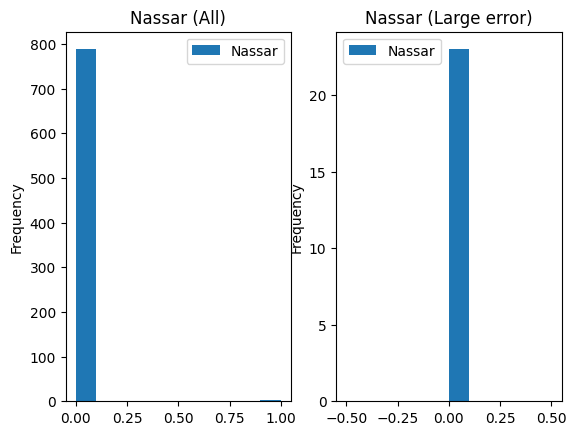

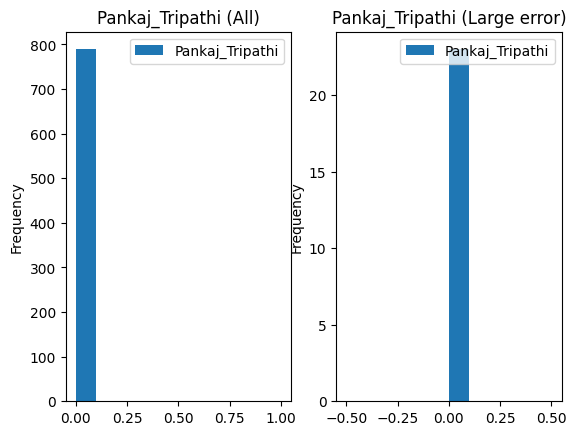

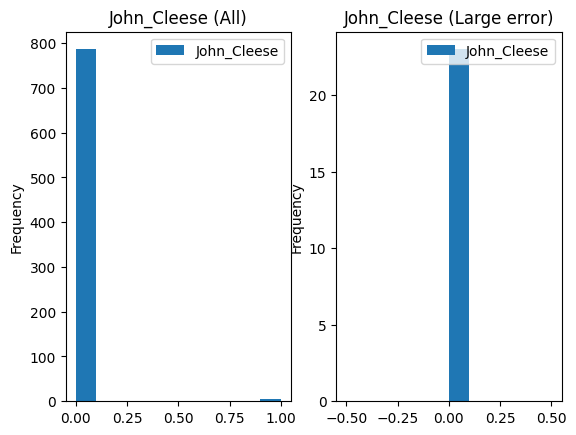

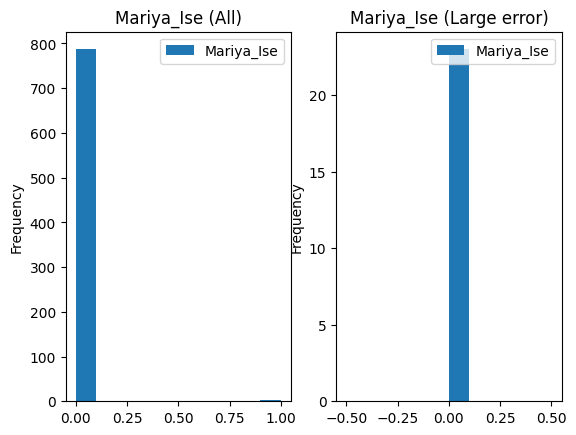

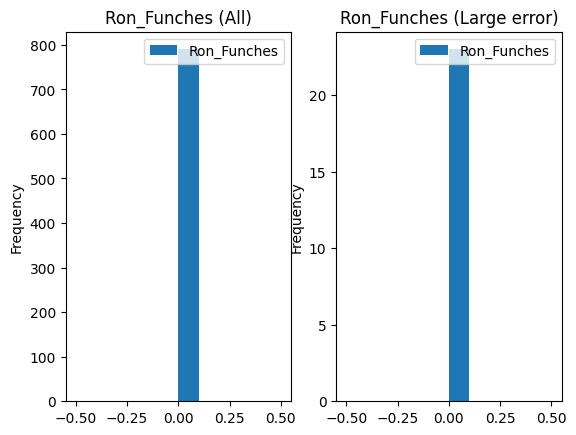

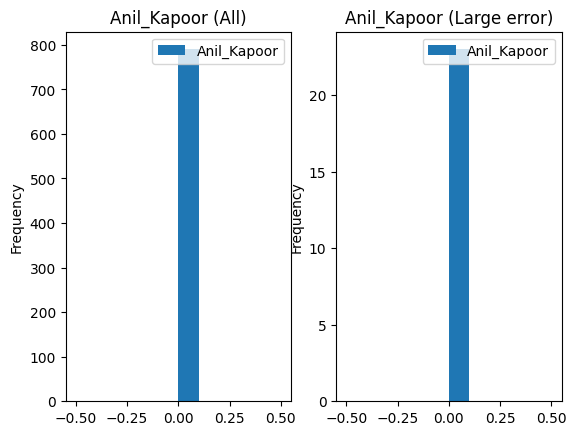

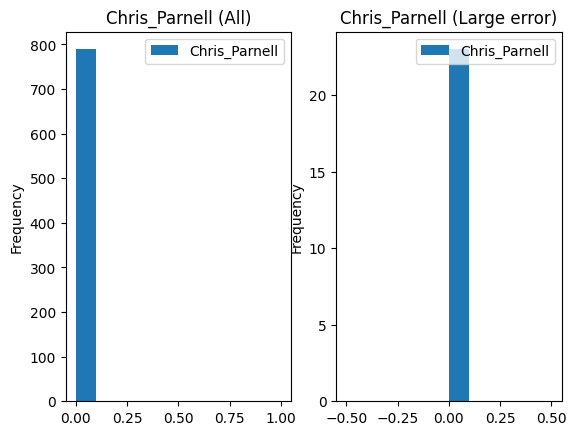

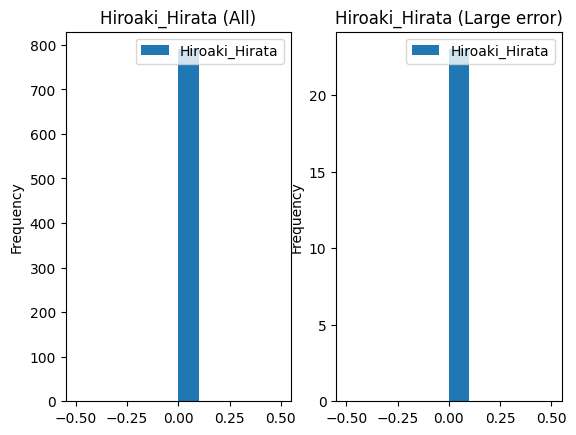

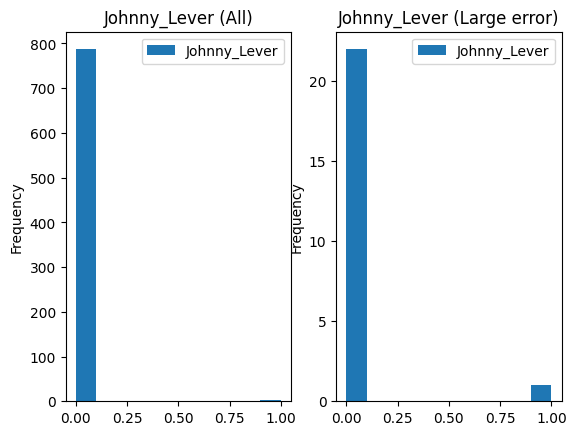

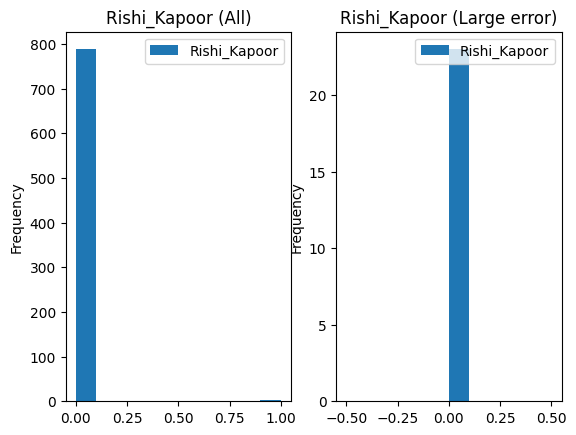

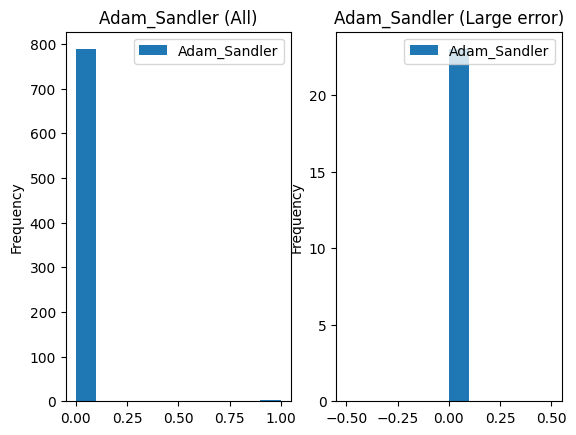

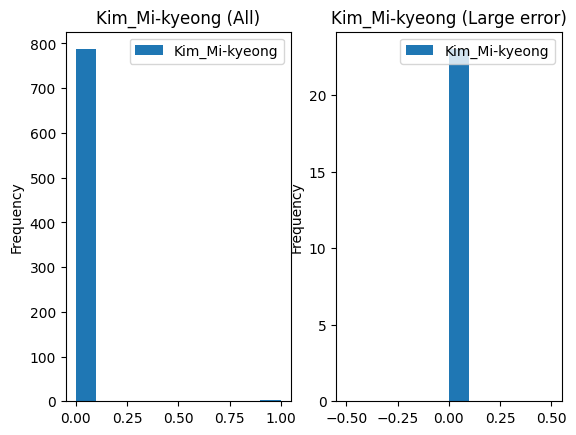

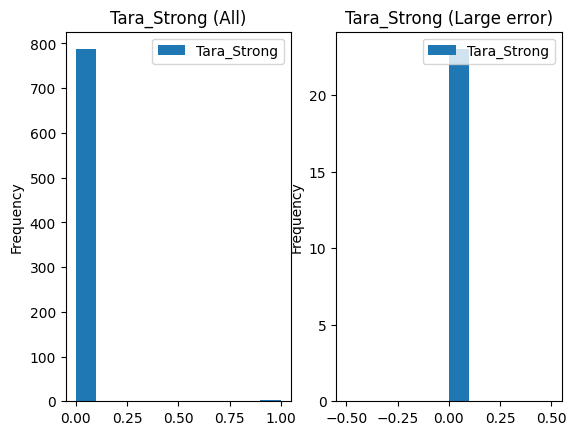

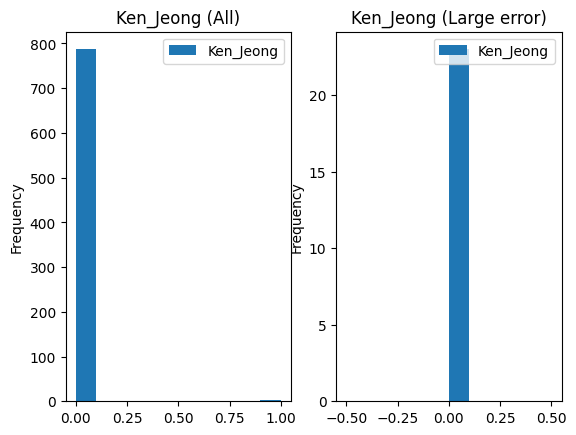

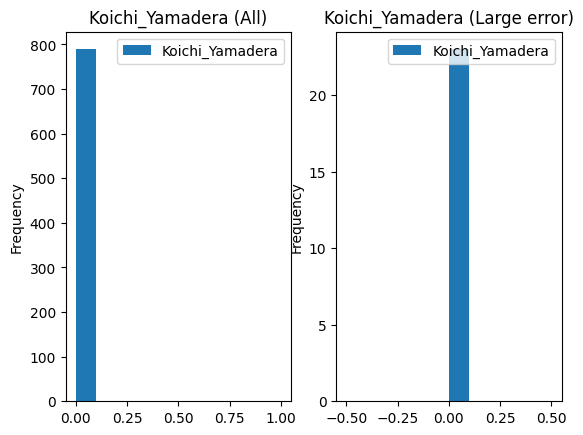

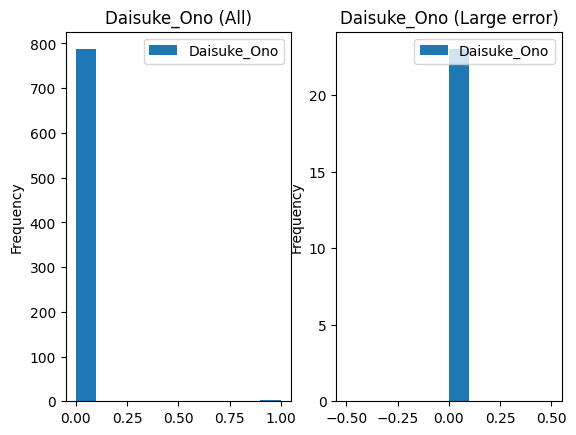

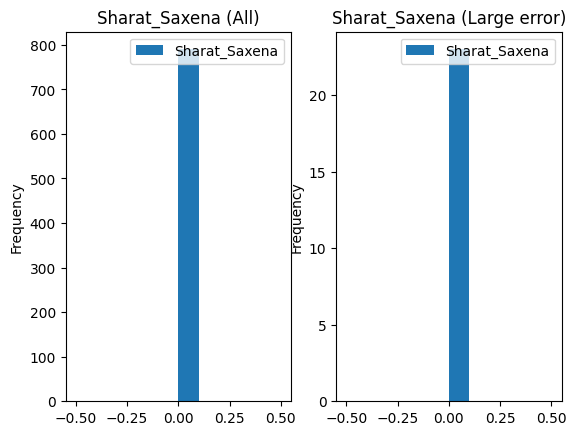

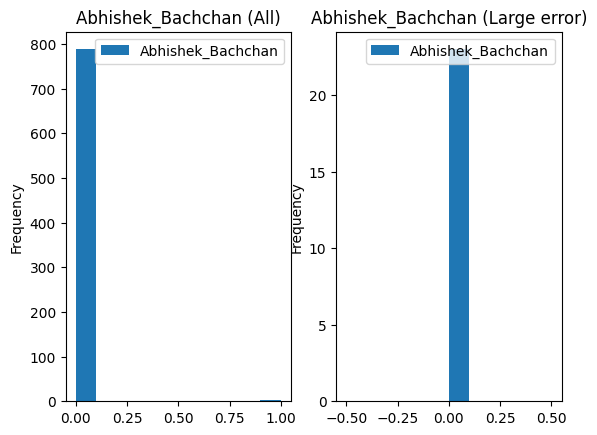

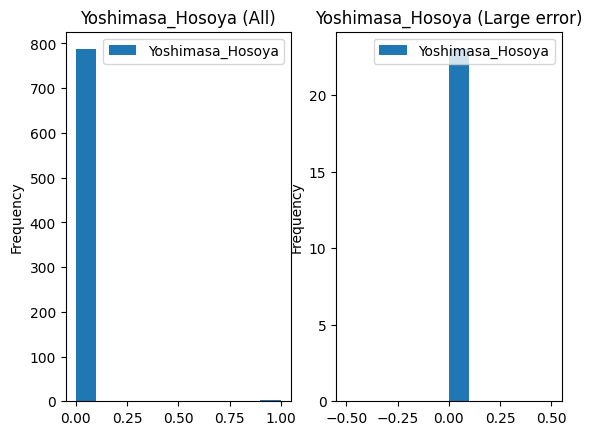

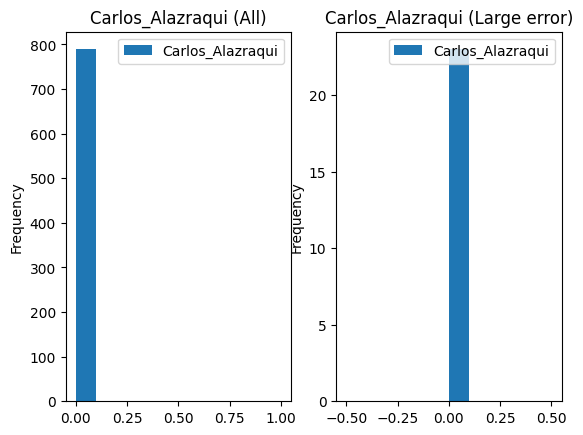

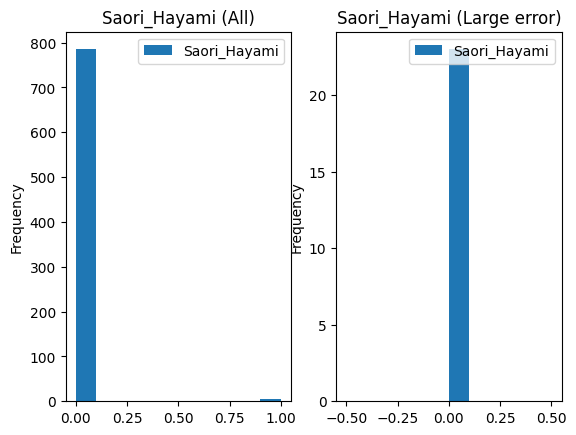

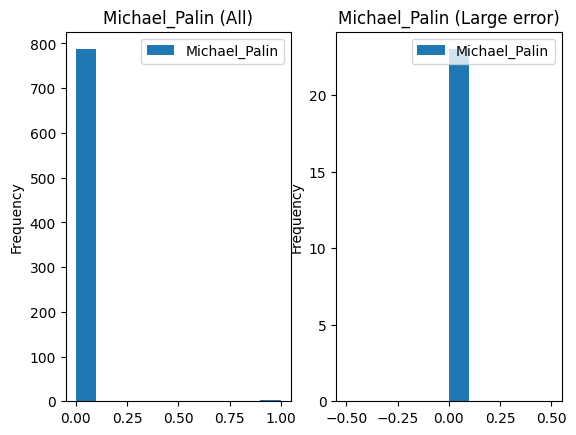

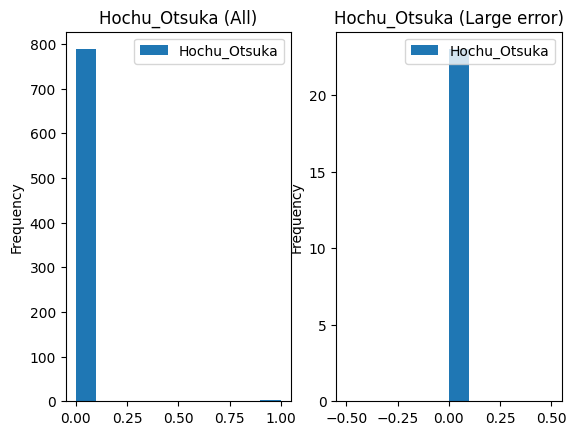

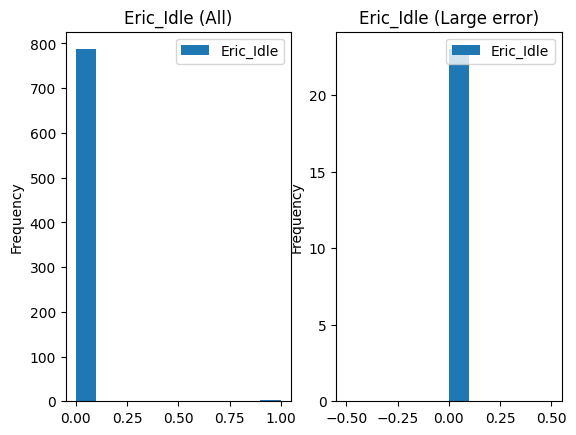

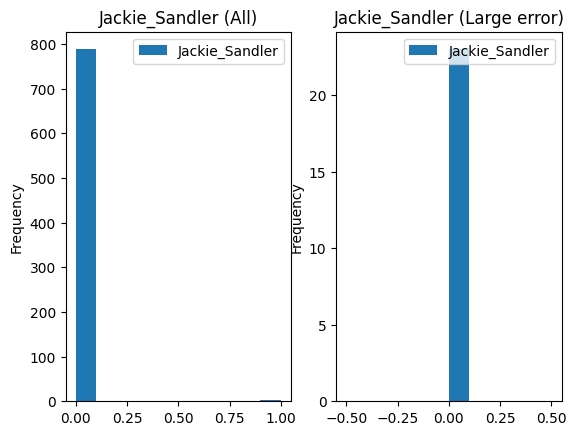

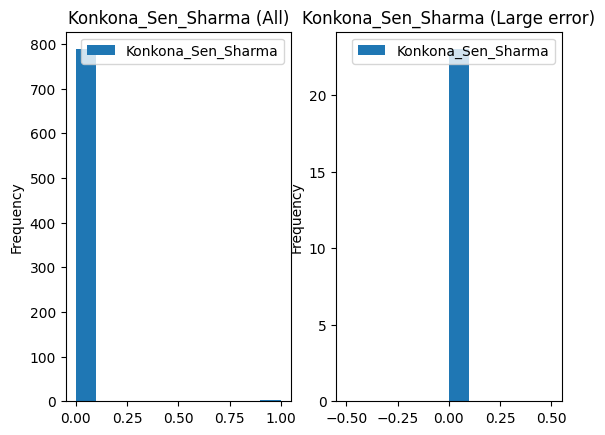

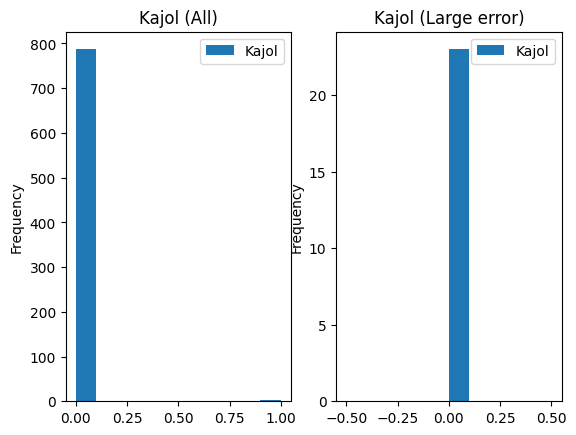

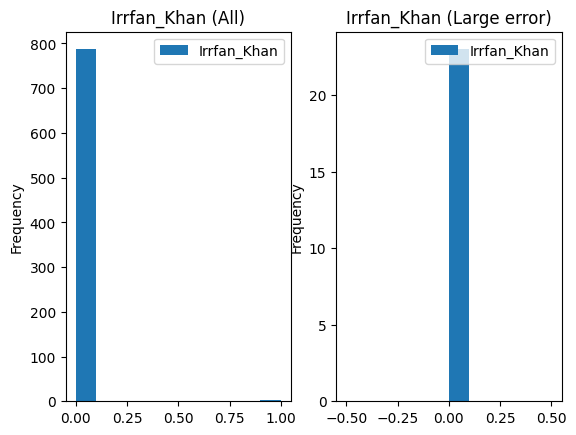

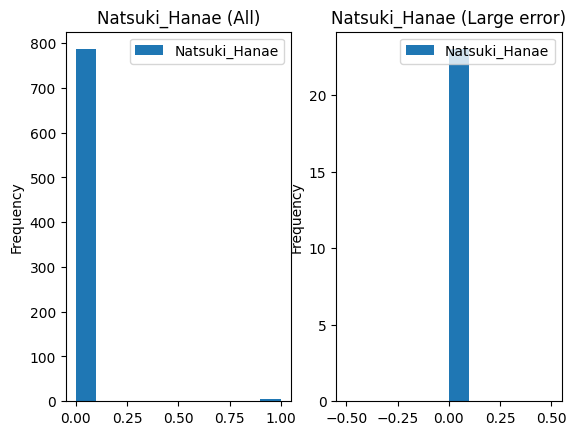

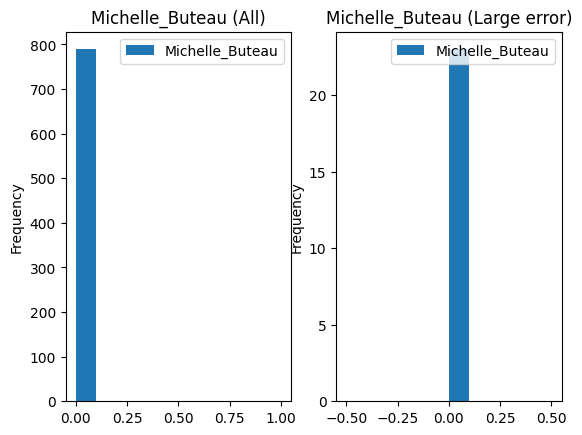

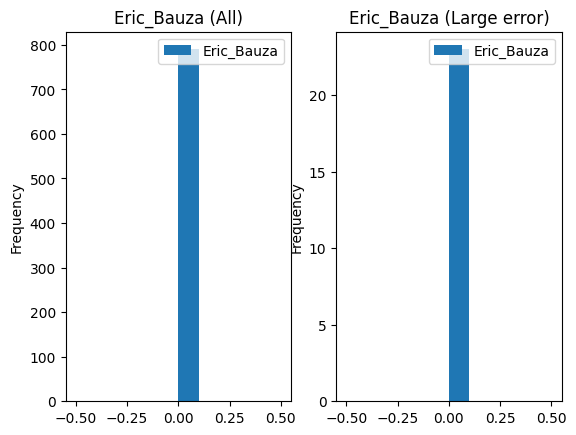

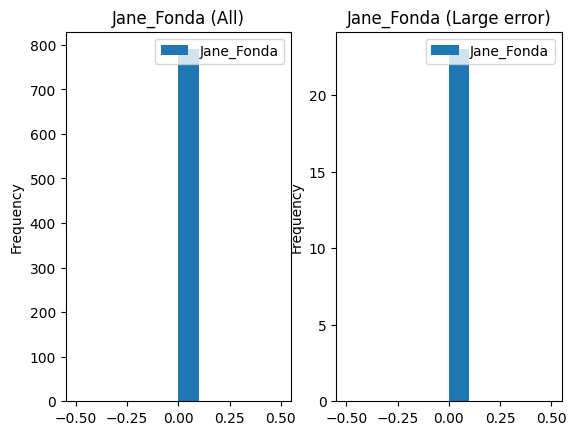

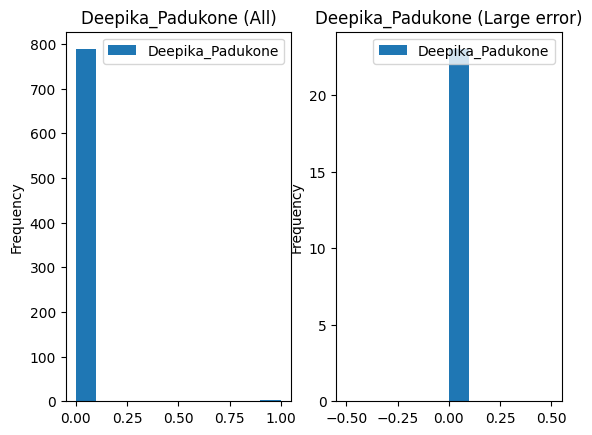

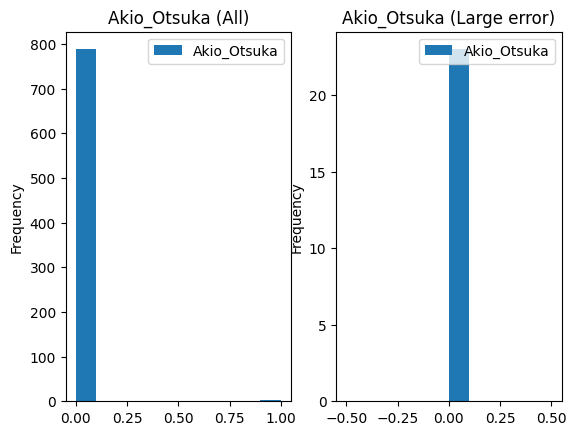

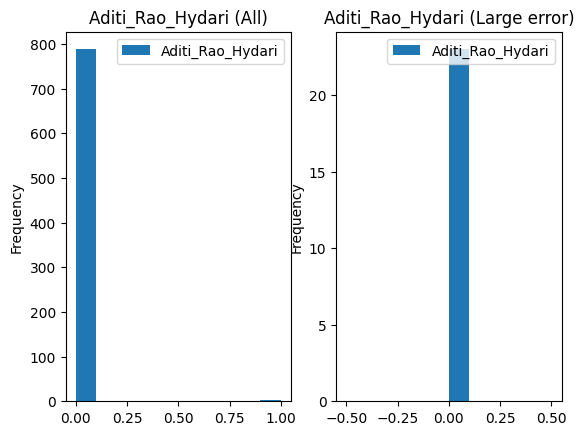

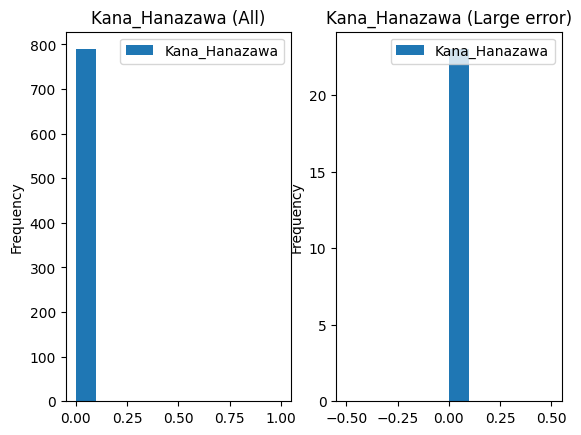

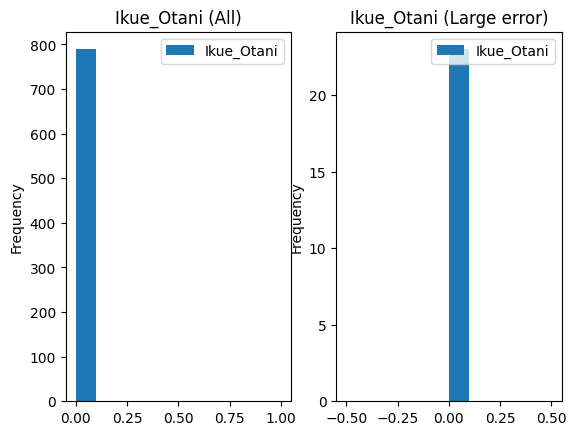

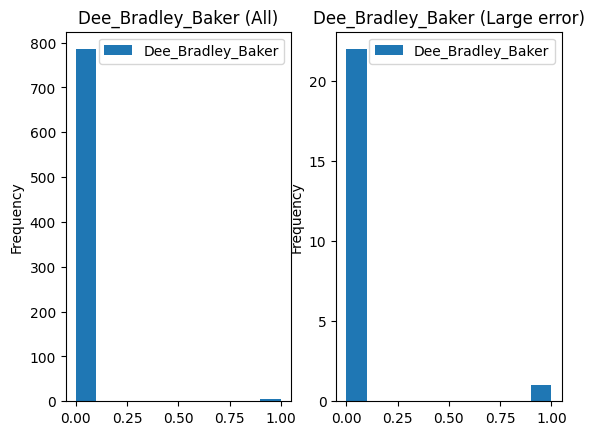

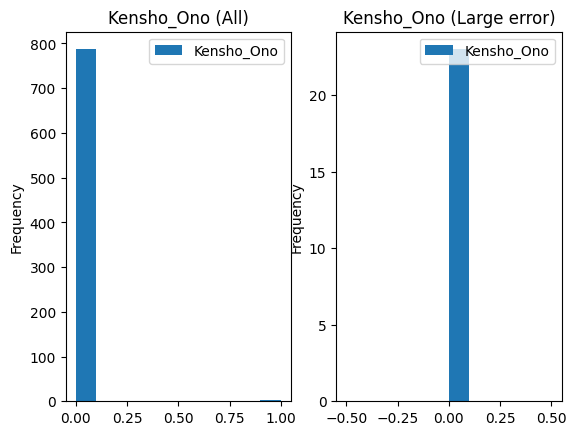

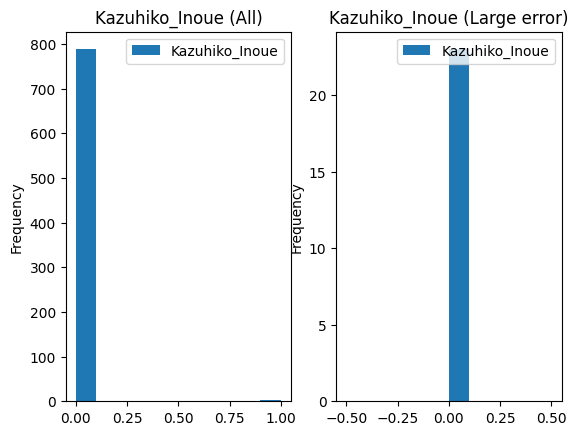

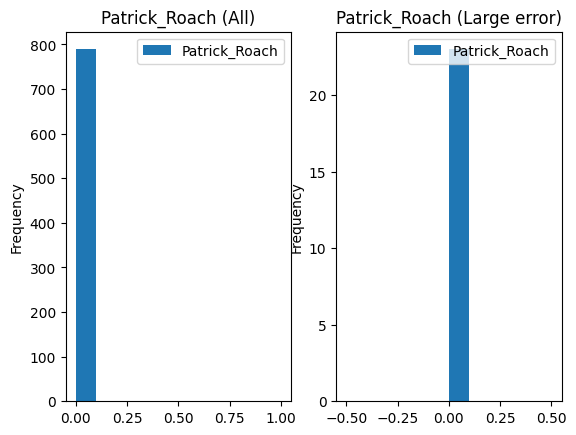

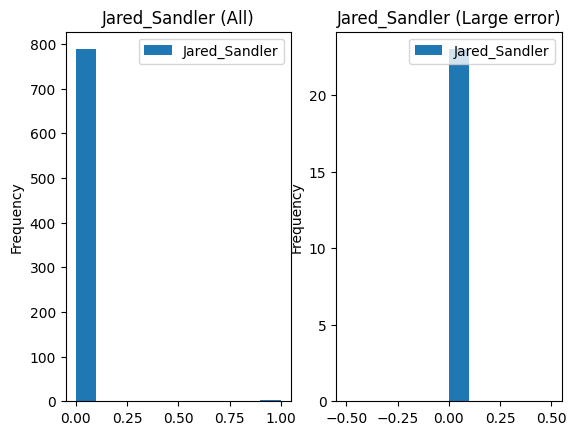

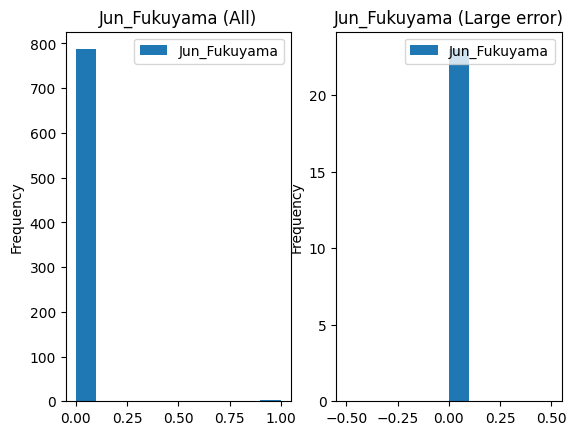

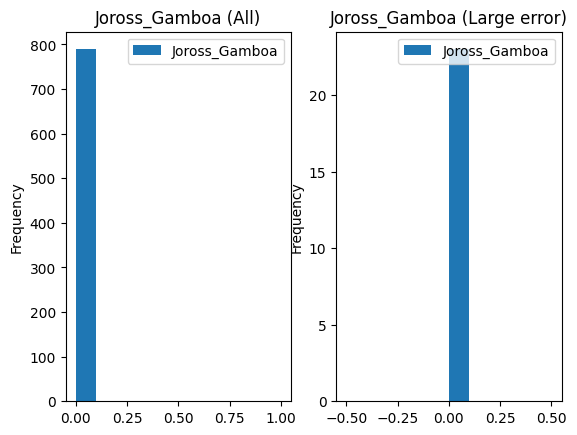

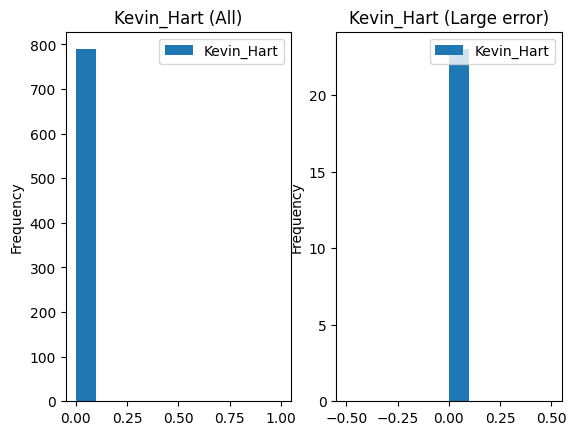

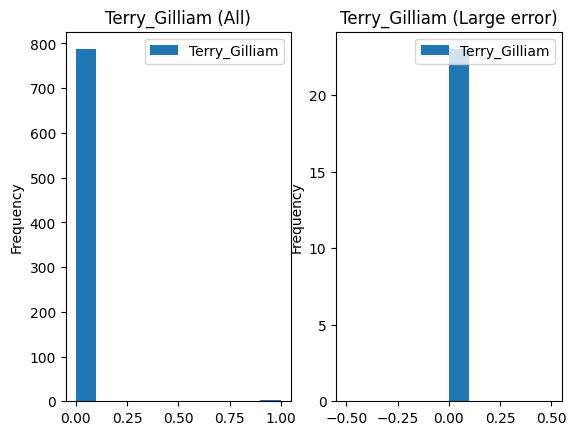

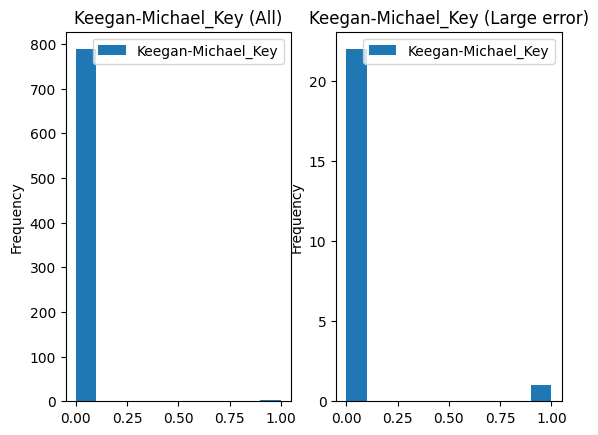

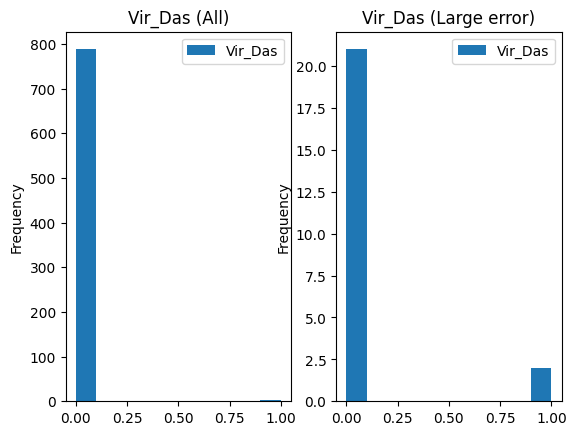

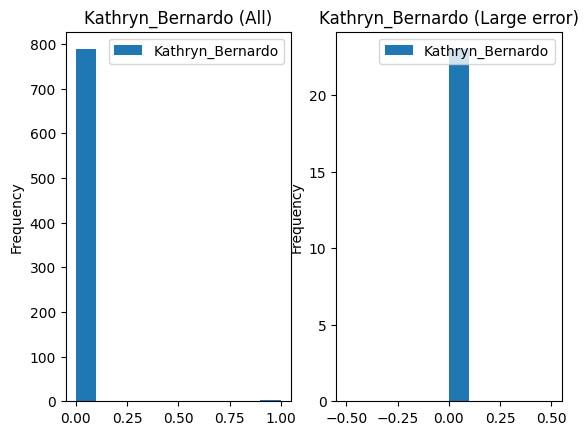

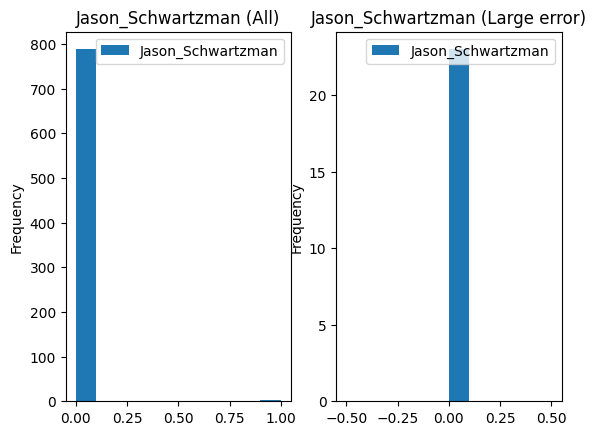

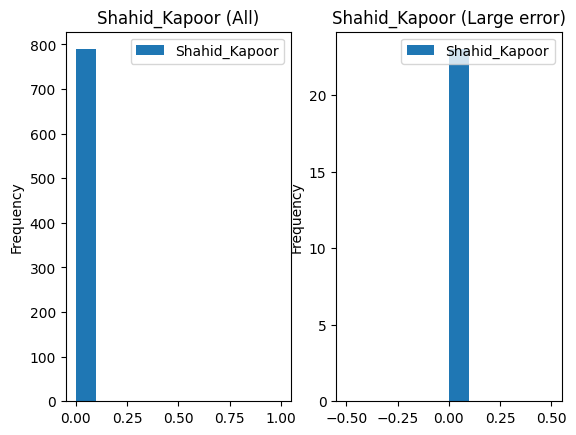

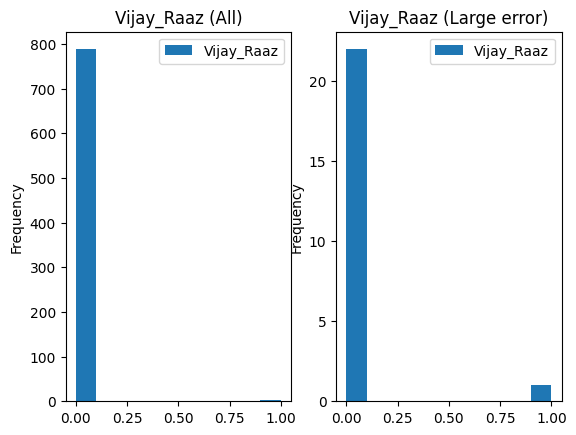

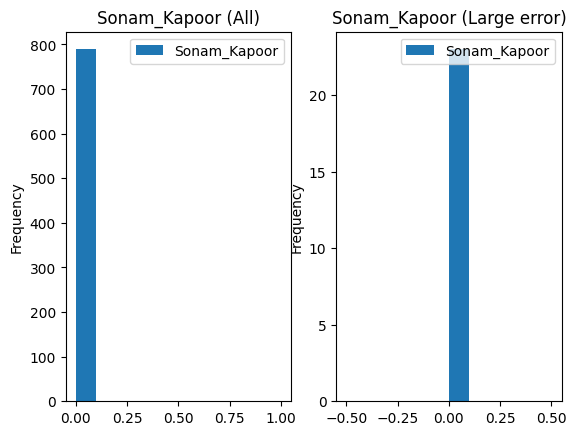

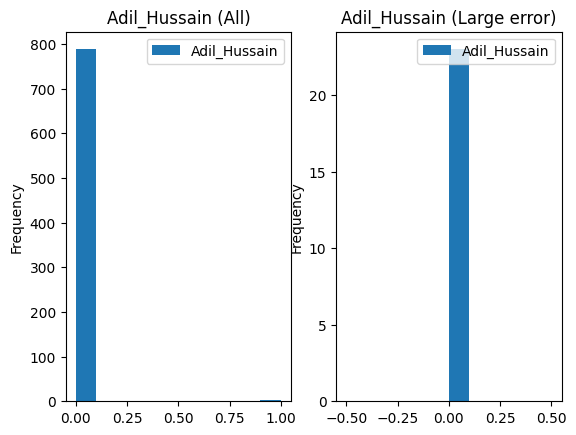

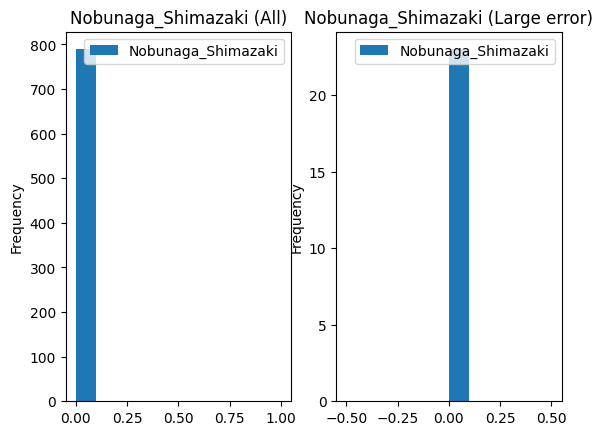

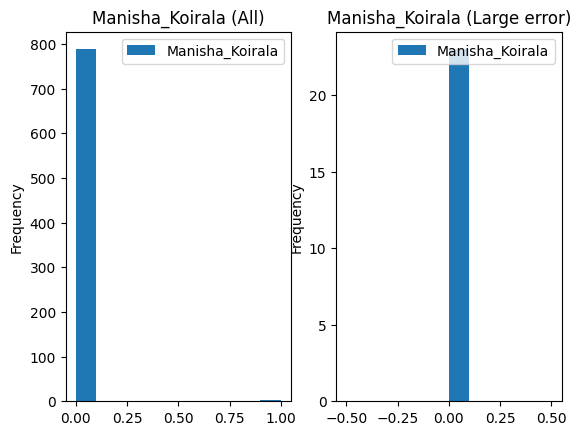

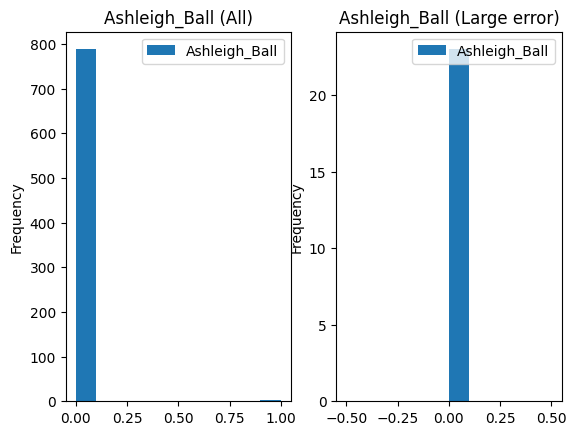

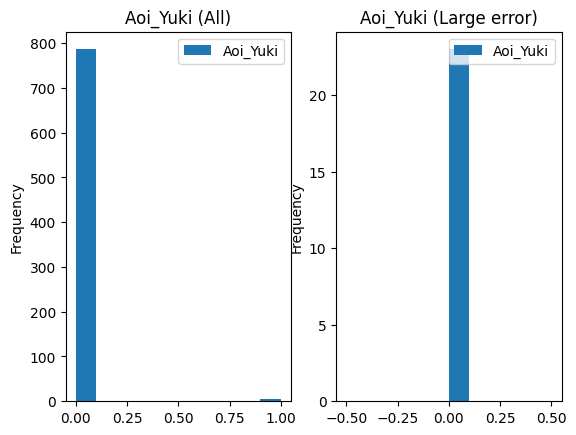

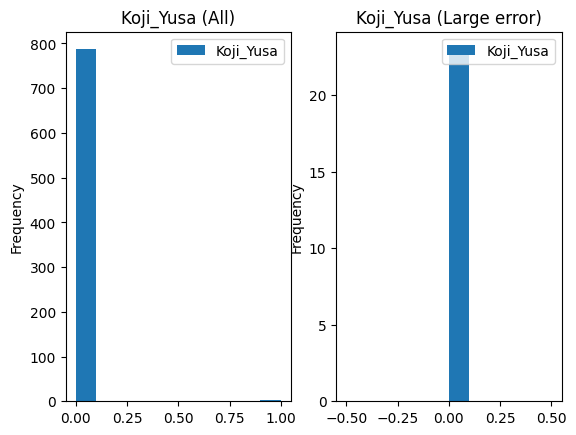

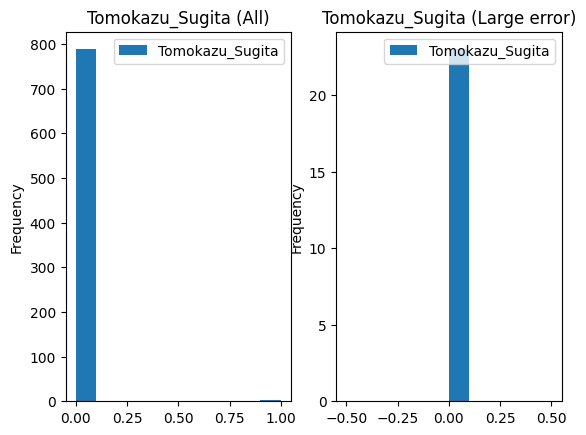

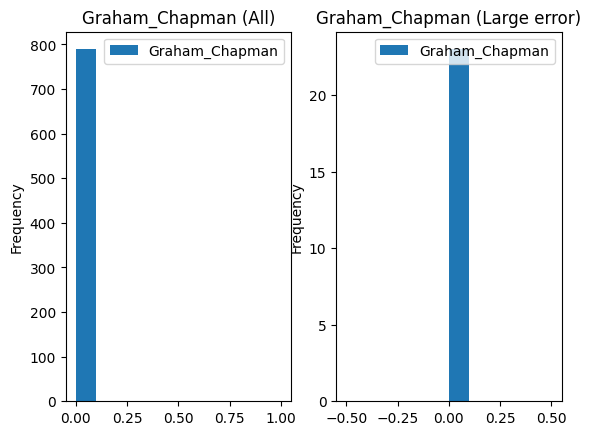

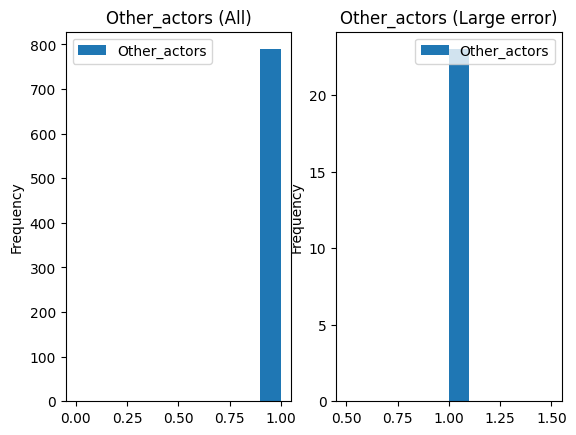

In [ ]:
import matplotlib.pyplot as plt
for column in X_test.columns:
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell
  df_with_predictions.plot(kind='hist', y=column, title=f'{column} (All)', ax=ax1)
  df_with_predictions[df_with_predictions.pred_diff > 2].plot(kind='hist', y=column, title=f'{column} (Large error)', ax=ax2)


*   Insbesondere Filme mit einer langen Laufzeit als auch die mit 40 Minuten Laufzeit, sagt das Modell eher schlecht voraus
*   Filme mit unter 5000 Votes werden auch eher schlecht vorausgesagt


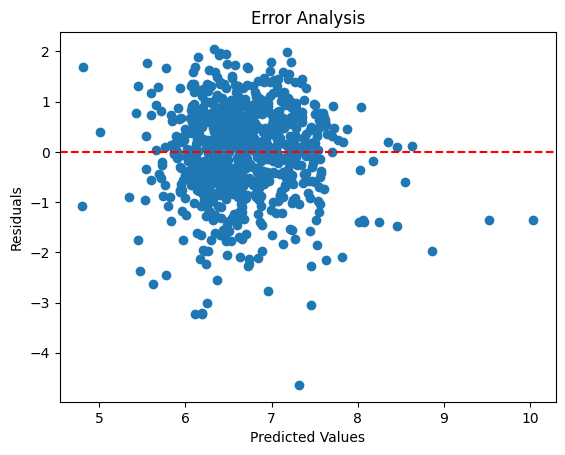

           Actual   Predicted   Residuals
count  790.000000  790.000000  790.000000
mean     6.638781    6.671097   -0.032316
std      1.062946    0.558105    0.912338
min      2.675000    4.802258   -4.640309
25%      5.950000    6.297215   -0.567370
50%      6.725000    6.626262    0.040712
75%      7.375000    7.010052    0.616077
max      9.175000   10.038233    2.048238


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

y_pred = optimized_ridge.predict(X_test)

# Fehleranalyse
residuals = y_test - y_pred
error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Plotten der Fehleranalyse
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Error Analysis')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontale Linie bei Residuals=0
plt.show()

# Statistiken der Fehleranalyse
error_stats = error_df.describe()
print(error_stats)
#Die Fehleranalyse wird grafisch dargestellt, indem die vorhergesagten Werte auf der x-Achse und die Residuen auf der y-Achse geplottet werden. Eine horizontale Linie bei Residuen=0 wird ebenfalls hinzugefügt, um den Fehler um die Nulllinie herum zu betrachten.

 Jeder Punkt im Diagramm repräsentiert eine Beobachtung und zeigt den Unterschied zwischen den tatsächlichen und den vorhergesagten Werten.
 Dieses Modell sagt die Werte immer etwas drüber hervor als sie eigentlich sind. Hier sind doch auch viele Ausreißer zu erkennen.